<u><center><h1 style="color:blue;"> Telecom Churn Case Study using advanced ML</h1></center><u>

In [1]:
#Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as anm
import seaborn as sns

from collections import Counter
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

import math
from IPython.display import Markdown, display ,HTML

sns.set(style="whitegrid")
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',300)
pd.set_option('display.max_colwidth',-1) # Data and columns are displayed correctly without purge
sns.set_context("paper")


# Machine Learning Libraries
import statsmodels.api as sm



In [2]:
#Loading the data set
tcom_churn=pd.read_csv('telecom_churn_data.csv')
tcom_churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  7000842753     109        0.0             0.0             0.0              
1  7001865778     109        0.0             0.0             0.0              
2  7001625959     109        0.0             0.0             0.0              
3  7001204172     109        0.0             0.0             0.0              
4  7000142493     109        0.0             0.0             0.0              

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0  6/30/2014            7/31/2014            8/31/2014             
1  6/30/2014            7/31/2014            8/31/2014             
2  6/30/2014            7/31/2014            8/31/2014             
3  6/30/2014            7/31/2014            8/31/2014             
4  6/30/2014            7/31/2014            8/31/2014             

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0  9/30/2014            197.385  214.816  213.803  21.100  NaN            
1  9/30/2014            34.047   355.074  268.321  86.285   24.11         
2  9/30/2014            167.690  189.058  210.226  290.714  11.54         
3  9/30/2014            221.338  251.102  508.054  389.500  99.91         
4  9/30/2014            261.636  309.876  238.174  163.426  50.31         

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0 NaN           0.00        NaN          NaN           NaN             
1  78.68        7.68         18.34        15.74         99.84          
2  55.24        37.26        74.81        143.33        220.59         
3  54.39        310.98       241.71       123.31        109.01         
4  149.44       83.89        58.78        76.96         91.88          

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  0.00         NaN           NaN            NaN             0.00            
1  304.76        53.76         0.0            0.00           0.00            
2  208.36        118.91        0.0            0.00           0.00            
3  71.68         113.54        0.0            54.86          44.38           
4  124.26        45.81         0.0            0.00           0.00            

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0 NaN            NaN            NaN             0.00          NaN              
1  0.00           0.0            0.00           0.00           0.00            
2  38.49          0.0            0.00           0.00           70.94           
3  0.00           0.0            28.09          39.04          0.00            
4  0.00           0.0            0.00           0.00           0.00            

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  23.88             74.56             7.68              18.34              
2  7.19              28.74             13.58             14.39              
3  73.68             34.81             10.61             15.49              
4  50.31             149.44            83.89             58.78              

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  11.51             75.94             291.86            53.76              
2  29.34             16.86             38.46             28.16              
3  107.43            83.21             22.46             65.46              
4  67.64             91.88             124.26            37.89              

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  0.00              0.00              0.00              0.00               
2  24.11             21.79             15.61             22.24              
3  1.91              0.65              4.91        

In [3]:
tcom_churn.shape

(99999, 226)

In [4]:
tcom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
tcom_churn.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  9.999900e+04   99999.0    98981.0         98981.0          
mean   7.001207e+09   109.0      0.0             0.0              
std    6.956694e+05   0.0        0.0             0.0              
min    7.000000e+09   109.0      0.0             0.0              
25%    7.000606e+09   109.0      0.0             0.0              
50%    7.001205e+09   109.0      0.0             0.0              
75%    7.001812e+09   109.0      0.0             0.0              
max    7.002411e+09   109.0      0.0             0.0              

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count  98981.0         99999.000000  99999.000000  99999.000000  99999.000000   
mean   0.0             282.987358    278.536648    279.154731    261.645069     
std    0.0             328.439770    338.156291    344.474791    341.998630     
min    0.0            -2258.709000  -2014.045000  -945.808000   -1899.505000    
25%    0.0             93.411500     86.980500     84.126000     62.685000      
50%    0.0             197.704000    191.640000    192.080000    176.849000     
75%    0.0             371.060000    365.344500    369.370500    353.466500     
max    0.0             27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean   132.395875    133.670805    133.018098    130.302327    197.935577     
std    297.207406    308.794148    308.951589    308.477668    316.851613     
min    0.000000      0.000000      0.000000      0.000000      0.000000       
25%    7.380000      6.660000      6.460000      5.330000      34.730000      
50%    34.310000     32.330000     32.360000     29.840000     96.310000      
75%    118.740000    115.595000    115.860000    112.130000    231.860000     
max    7376.710000   8157.780000   10752.560000  10427.460000  8362.360000    

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000   96140.000000    
mean   197.045133    196.574803    190.337222    9.950013       7.149898        
std    325.862803    327.170662    319.396092    72.825411      73.447948       
min    0.000000      0.000000      0.000000      0.000000       0.000000        
25%    32.190000     31.630000     27.130000     0.000000       0.000000        
50%    91.735000     92.140000     87.290000     0.000000       0.000000        
75%    226.815000    228.260000    220.505000    0.000000       0.000000        
max    9667.130000   14007.340000  10310.760000  13724.380000   15371.040000    

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count  94621.000000   92254.000000   96062.000000   96140.000000    
mean   7.292981       6.343841       13.911337      9.818732        
std    68.402466      57.137537      71.443196      58.455762       
min    0.000000       0.000000       0.000000       0.000000        
25%    0.000000       0.000000       0.000000       0.000000        
50%    0.000000       0.000000       0.000000       0.000000        
75%    0.000000       0.000000       0.000000       0.000000        
max    13095.360000   8464.030000    3775.110000    2812.040000     

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count  94621.000000   92254.000000   96062.000000      96140.000000       
mean   9.971890       8.555519       47.100763         46.473010          
std    64.713221      58.438186      150.856393        155.318705         
min    0.000000       0.000000       0.000000          0.000000           
25%    0.000000       0.000000       1.660000          1.630000           
50%    0.000000       0.000000       11.910000         11.610000          
75%    0.000000       0.000000       40.960000         39.910000          
max    53

In [6]:
tcom_churn.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [7]:
for col in tcom_churn.columns:
    print(col)

mobile_number
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_

<h3 style="background-color:powderblue;">Comment</h3>
    <p style="background-color:yellow;">
    <b>In this case study, there are three phases for the customer lifecycle.</b>
<ul>
    <li style="color:green;">The ‘good’ phase [Month 6 & 7]</li>
    <li style="color:green;">The ‘action’ phase [Month 8]</li>
    <li style="color:green;">The ‘churn’ phase [Month 9]</li>
<ul>
    <p style="color:green;">
    In this case study, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, and the fourth month is the ‘churn’ phase.</p>

<h3 style="color:red;"> Data Preprocessing:</h3>

In [9]:
#Extract the columns containing recharge amount
rech_amt_cols=tcom_churn.columns[tcom_churn.columns.str.contains('rech_amt[rech_data]')]
rech_amt_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [10]:
#Checking missing values
def null_value_calcs(df):
    null_value_percentage=pd.DataFrame(round((df.isnull().sum())*100/df.shape[0],2)).reset_index()
    null_value_percentage.columns=['Col Name','Null Values Percentage']
    null_value = pd.DataFrame(df.isnull().sum()).reset_index()
    null_value.columns = ['Col Name', 'Null Values']
    null_df = pd.merge(null_value, null_value_percentage, on='Col Name')
    null_df['Null Values Percentage'] = pd.to_numeric(null_df['Null Values Percentage'], errors='coerce')
    null_df = null_df.loc[null_df['Null Values Percentage'] > 0.00] #keeping only the missing values data
    null_df.sort_values("Null Values", ascending = False, inplace=True, ignore_index=True)
    return null_df


In [11]:
tcom_churn_null=null_value_calcs(tcom_churn)
tcom_churn_null


Col Name  Null Values  Null Values Percentage
0    count_rech_2g_6           74846        74.85                 
1    max_rech_data_6           74846        74.85                 
2    arpu_3g_6                 74846        74.85                 
3    av_rech_amt_data_6        74846        74.85                 
4    count_rech_3g_6           74846        74.85                 
5    night_pck_user_6          74846        74.85                 
6    arpu_2g_6                 74846        74.85                 
7    fb_user_6                 74846        74.85                 
8    total_rech_data_6         74846        74.85                 
9    date_of_last_rech_data_6  74846        74.85                 
10   count_rech_3g_7           74428        74.43                 
11   arpu_3g_7                 74428        74.43                 
12   av_rech_amt_data_7        74428        74.43                 
13   fb_user_7                 74428        74.43                 
14   total_rech_data_7         74428        74.43                 
15   count_rech_2g_7           74428        74.43                 
16   arpu_2g_7                 74428        74.43                 
17   night_pck_user_7          74428        74.43                 
18   max_rech_data_7           74428        74.43                 
19   date_of_last_rech_data_7  74428        74.43                 
20   date_of_last_rech_data_9  74077        74.08                 
21   count_rech_2g_9           74077        74.08                 
22   total_rech_data_9         74077        74.08                 
23   count_rech_3g_9           74077        74.08                 
24   max_rech_data_9           74077        74.08                 
25   av_rech_amt_data_9        74077        74.08                 
26   arpu_3g_9                 74077        74.08                 
27   fb_user_9                 74077        74.08                 
28   night_pck_user_9          74077        74.08                 
29   arpu_2g_9                 74077        74.08                 
30   av_rech_amt_data_8        73660        73.66                 
31   fb_user_8                 73660        73.66                 
32   night_pck_user_8          73660        73.66                 
33   count_rech_2g_8           73660        73.66                 
34   count_rech_3g_8           73660        73.66                 
35   max_rech_data_8           73660        73.66                 
36   date_of_last_rech_data_8  73660        73.66                 
37   total_rech_data_8         73660        73.66                 
38   arpu_3g_8                 73660        73.66                 
39   arpu_2g_8                 73660        73.66                 
40   roam_og_mou_9             7745         7.75                  
41   std_og_t2c_mou_9          7745         7.75                  
42   std_ic_t2f_mou_9          7745         7.75                  
43   std_ic_t2m_mou_9          7745         7.75                  
44   loc_ic_mou_9              7745         7.75                  
45   std_og_mou_9              7745         7.75                  
46   og_others_9               7745         7.75                  
47   std_ic_t2o_mou_9          7745         7.75                  
48   isd_og_mou_9              7745         7.75                  
49   offnet_mou_9              7745         7.75                  
50   spl_og_mou_9              7745         7.75                  
51   std_og_t2f_mou_9          7745         7.75                  
52   std_og_t2m_mou_9          7745         7.75                  
53   loc_ic_t2t_mou_9          7745         7.75                  
54   std_ic_mou_9              7745         7.75                  
55   loc_og_t2f_mou_9          7745         7.75                  
56   ic_others_9               7745         7.75                  
57   loc_og_t2t_mou_9          7745         7.75                  
58   loc_ic_t2m_mou_9          7745         7.75                  
5

<h3 style="color:red;">Data Cleaning:</h3>

In [12]:
#Checking the duplicate records
tcom_churn['mobile_number'].value_counts().sum()

99999

<h3 style="background-color:powderblue;">Comment</h3>
<p style="color:green;">Since there are no dublicate mobile numbers, dataset also has no duplicates.</p>

In [13]:
print("Total number of columns which are having null values :", tcom_churn_null.shape[0])

Total number of columns which are having null values : 166


In [14]:
print("Total number of columns which are having morethan 70% null values :", 
      len(tcom_churn_null[tcom_churn_null['Null Values Percentage']>70]))

Total number of columns which are having morethan 70% null values : 40


<h3 style="background-color:powderblue;">Observation:</h3>
<ul>
    <li style="color:green;">We have 40 cols are having morethan 70%, we can ideally remove the cols but we need to analyze the types of cols more-
    than 70% values</li>
    <li style="color:green;">Some of the cols such as night_pack_X or fb_user_X (where X signified the month value 6/7/8/9) have high null values.</li>
    <li style="color:green;">We can consider above mentioned two such customers didnt take those packages and social media utilities. we can impute -
    null values with '0'.</li>
<ul>   
<h3 style="background-color:yellow;"> We have to first treat the recharge amount related to high value customers</h3>
<ul>
    <li style="color:green;">total_rech_data_6 - <b>74.85 %</b> missing values</li>
    <li style="color:green;">total_rech_data_7 - <b>74.43 %</b> missing values</li>
    <li style="color:green;">av_rech_amt_data_6 - <b>74.85 %</b> missing values</li>
    <li style="color:green;">av_rech_amt_data_7 - <b>74.43 %</b> missing values</li>
    <li style="color:green;">date_of_last_rech_data_6 - <b>74.85 %</b> missing values</li>
    <li style="color:green;">date_of_last_rech_data_7 - <b>74.43 %,</b> missing values</li>
<ul>

<h2 style="color:red;">Null Value Imputation</h2>

In [15]:
# Checking if data recharge null row indexes matches with same customers data of null values in last recharge data 
#information for month of June.

if tcom_churn ['total_rech_data_6'].isnull().equals(tcom_churn['date_of_last_rech_data_6'].isnull()):
    print('Null values are equal to the 6th month indexes')

Null values are equal to the 6th month indexes


<h3 style="background-color:powderblue;">Comments:</h3>
<ul>
<li style="color:green;">No data recharge was done for the 6th Month, so missing values can be imputed with '0'.</p>
<li style="color:green;">Also as the total data recharge for the month is 0, we can impute 0 for 'av_rech_amt_data_6' column
as well.</li>
</ui>


In [16]:
# Imputing zero with total_rech_data_6 and av_rech_amt_data_6.
tcom_churn['total_rech_data_6'].fillna(0,inplace=True)
tcom_churn['av_rech_amt_data_6'].fillna(0,inplace=True)


In [17]:
#we can do as above for 7th and 8th month as well.
if tcom_churn['total_rech_data_7'].isnull().equals(tcom_churn['date_of_last_rech_data_7'].isnull()):
    print('the index null values are equal to the 7th month')
    


the index null values are equal to the 7th month


In [18]:
#Imputing null values with 0
tcom_churn['total_rech_data_7'].fillna(0, inplace=True)
tcom_churn['av_rech_amt_data_7'].fillna(0, inplace=True)

In [19]:
if tcom_churn['total_rech_data_8'].isnull().equals(tcom_churn['date_of_last_rech_data_8'].isnull()):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


In [20]:
#Imputing null values with 0
tcom_churn['total_rech_data_8'].fillna(0, inplace=True)
tcom_churn['av_rech_amt_data_8'].fillna(0, inplace=True)

In [21]:
#checking again the missing values
tcom_churn_null=null_value_calcs(tcom_churn)
tcom_churn_null


Col Name  Null Values  Null Values Percentage
0    max_rech_data_6           74846        74.85                 
1    night_pck_user_6          74846        74.85                 
2    arpu_3g_6                 74846        74.85                 
3    count_rech_2g_6           74846        74.85                 
4    arpu_2g_6                 74846        74.85                 
5    count_rech_3g_6           74846        74.85                 
6    fb_user_6                 74846        74.85                 
7    date_of_last_rech_data_6  74846        74.85                 
8    night_pck_user_7          74428        74.43                 
9    date_of_last_rech_data_7  74428        74.43                 
10   max_rech_data_7           74428        74.43                 
11   arpu_2g_7                 74428        74.43                 
12   fb_user_7                 74428        74.43                 
13   count_rech_2g_7           74428        74.43                 
14   arpu_3g_7                 74428        74.43                 
15   count_rech_3g_7           74428        74.43                 
16   date_of_last_rech_data_9  74077        74.08                 
17   total_rech_data_9         74077        74.08                 
18   count_rech_3g_9           74077        74.08                 
19   max_rech_data_9           74077        74.08                 
20   count_rech_2g_9           74077        74.08                 
21   fb_user_9                 74077        74.08                 
22   arpu_3g_9                 74077        74.08                 
23   arpu_2g_9                 74077        74.08                 
24   av_rech_amt_data_9        74077        74.08                 
25   night_pck_user_9          74077        74.08                 
26   arpu_2g_8                 73660        73.66                 
27   count_rech_3g_8           73660        73.66                 
28   max_rech_data_8           73660        73.66                 
29   fb_user_8                 73660        73.66                 
30   arpu_3g_8                 73660        73.66                 
31   night_pck_user_8          73660        73.66                 
32   count_rech_2g_8           73660        73.66                 
33   date_of_last_rech_data_8  73660        73.66                 
34   std_ic_t2f_mou_9          7745         7.75                  
35   std_og_t2c_mou_9          7745         7.75                  
36   std_ic_t2o_mou_9          7745         7.75                  
37   std_og_t2f_mou_9          7745         7.75                  
38   std_ic_t2m_mou_9          7745         7.75                  
39   loc_ic_t2f_mou_9          7745         7.75                  
40   loc_ic_t2t_mou_9          7745         7.75                  
41   std_og_mou_9              7745         7.75                  
42   std_ic_t2t_mou_9          7745         7.75                  
43   loc_ic_t2m_mou_9          7745         7.75                  
44   isd_og_mou_9              7745         7.75                  
45   spl_og_mou_9              7745         7.75                  
46   loc_ic_mou_9              7745         7.75                  
47   spl_ic_mou_9              7745         7.75                  
48   std_ic_mou_9              7745         7.75                  
49   loc_og_t2c_mou_9          7745         7.75                  
50   std_og_t2m_mou_9          7745         7.75                  
51   loc_og_mou_9              7745         7.75                  
52   onnet_mou_9               7745         7.75                  
53   offnet_mou_9              7745         7.75                  
54   roam_ic_mou_9             7745         7.75                  
55   roam_og_mou_9             7745         7.75                  
56   loc_og_t2t_mou_9          7745         7.75                  
57   loc_og_t2m_mou_9          7745         7.75                  
58   loc_og_t2f_mou_9          7745         7.75                  
5

<h3 style="background-color:powderblue;">Observation:</h3>
<ul>
    <li style="color:green;">cols such as arpu_3g_X, night_pck_use_Xm, fb_user_X should be the target now.</li>
    <li style="color:green;"> If the data is missing then it is considered that customer didnt opted for facilities.
    we can impute zero here.</li>
     <li style="color:green;">To verify the assumptions, we need to check if the missing indices are same for the following 
        variables.</li>
        <ol style="color:green;">count_rech_2g_X</ol>
        <ol style="color:green;">count_rech_3g_X</ol>
        <ol style="color:green;">arpu_2g_X</ol>
        <ol style="color:green;">arpu_3g_X</ol>
        <ol style="color:green;">night_pck_user_X</ol>
        <ol style="color:green;">fb_user_X </ol>
        <ol style="color:green;">date_of_last_rech_data_7</ol>

In [22]:
#Checking the matching indices for the 6th Month
arpu_2g_6_index = tcom_churn['arpu_2g_6'].isnull()
arpu_3g_6_index = tcom_churn['arpu_3g_6'].isnull()
night_pck_user_6_index = tcom_churn['night_pck_user_6'].isnull()
count_rech_2g_6_index = tcom_churn['count_rech_2g_6'].isnull()
count_rech_3g_6_index = tcom_churn['count_rech_3g_6'].isnull()
fb_user_6_index = tcom_churn['fb_user_6'].isnull()

if arpu_2g_6_index.equals(arpu_2g_6_index) & arpu_3g_6_index.equals(night_pck_user_6_index) & night_pck_user_6_index.equals(count_rech_2g_6_index) & count_rech_2g_6_index.equals(count_rech_3g_6_index) & count_rech_3g_6_index.equals(fb_user_6_index):
    print('The indexes NULL values are equal for the 6th Month')

The indexes NULL values are equal for the 6th Month


In [23]:
#Checking the matching indices for the 7th Month
arpu_2g_7_index = tcom_churn['arpu_2g_7'].isnull()
arpu_3g_7_index = tcom_churn['arpu_3g_7'].isnull()
night_pck_user_7_index = tcom_churn['night_pck_user_7'].isnull()
count_rech_2g_7_index = tcom_churn['count_rech_2g_7'].isnull()
count_rech_3g_7_index = tcom_churn['count_rech_3g_7'].isnull()
fb_user_7_index = tcom_churn['fb_user_7'].isnull()

In [24]:
if arpu_2g_7_index.equals(arpu_2g_7_index) & arpu_3g_7_index.equals(night_pck_user_7_index) & night_pck_user_7_index.equals(count_rech_2g_7_index) & count_rech_2g_7_index.equals(count_rech_3g_7_index) & count_rech_3g_7_index.equals(fb_user_7_index):
    print('The indexes NULL values are equal for the 7th Month')

The indexes NULL values are equal for the 7th Month


In [25]:
#Checking the matching indices for the 8th Month
arpu_2g_8_index = tcom_churn['arpu_2g_8'].isnull()
arpu_3g_8_index = tcom_churn['arpu_3g_8'].isnull()
night_pck_user_8_index = tcom_churn['night_pck_user_8'].isnull()
count_rech_2g_8_index = tcom_churn['count_rech_2g_8'].isnull()
count_rech_3g_8_index = tcom_churn['count_rech_3g_8'].isnull()
fb_user_8_index = tcom_churn['fb_user_8'].isnull()

In [26]:
if arpu_2g_8_index.equals(arpu_2g_8_index) & arpu_3g_8_index.equals(night_pck_user_8_index) & night_pck_user_8_index.equals(count_rech_2g_8_index) & count_rech_2g_8_index.equals(count_rech_3g_8_index) & count_rech_3g_8_index.equals(fb_user_8_index):
    print('The indexes NULL values are equal for the 8th Month')

The indexes NULL values are equal for the 8th Month


<h3 style="background-color:powderblue;">Observation</h3>
<ul>
<li style="color:green;">A customer who has missing value in Mobile Internet usage means, a customer is not utilising the
facilities. Which is also means customer would not be using add on services where internet is necessary.</li>
<li style="color:green;">With this assumption, we can impute zero for the following cols.</li>
</ul>

In [27]:
tcom_cols_impute=['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
                  'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                  'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
                  'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                  'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9']
for cols in tcom_cols_impute:
    tcom_churn[cols].fillna(0,inplace=True)


In [28]:
#checking again the missing values
tcom_churn_null=null_value_calcs(tcom_churn)
tcom_churn_null

Col Name  Null Values  Null Values Percentage
0    max_rech_data_6           74846        74.85                 
1    date_of_last_rech_data_6  74846        74.85                 
2    max_rech_data_7           74428        74.43                 
3    date_of_last_rech_data_7  74428        74.43                 
4    av_rech_amt_data_9        74077        74.08                 
5    max_rech_data_9           74077        74.08                 
6    total_rech_data_9         74077        74.08                 
7    date_of_last_rech_data_9  74077        74.08                 
8    max_rech_data_8           73660        73.66                 
9    date_of_last_rech_data_8  73660        73.66                 
10   loc_ic_t2f_mou_9          7745         7.75                  
11   loc_ic_t2m_mou_9          7745         7.75                  
12   loc_og_t2c_mou_9          7745         7.75                  
13   std_ic_t2t_mou_9          7745         7.75                  
14   loc_ic_mou_9              7745         7.75                  
15   loc_og_t2f_mou_9          7745         7.75                  
16   loc_ic_t2t_mou_9          7745         7.75                  
17   loc_og_mou_9              7745         7.75                  
18   std_og_t2m_mou_9          7745         7.75                  
19   og_others_9               7745         7.75                  
20   std_og_t2t_mou_9          7745         7.75                  
21   spl_og_mou_9              7745         7.75                  
22   isd_og_mou_9              7745         7.75                  
23   std_ic_t2m_mou_9          7745         7.75                  
24   std_og_mou_9              7745         7.75                  
25   std_og_t2f_mou_9          7745         7.75                  
26   loc_og_t2m_mou_9          7745         7.75                  
27   std_og_t2c_mou_9          7745         7.75                  
28   offnet_mou_9              7745         7.75                  
29   roam_og_mou_9             7745         7.75                  
30   spl_ic_mou_9              7745         7.75                  
31   std_ic_t2f_mou_9          7745         7.75                  
32   isd_ic_mou_9              7745         7.75                  
33   std_ic_mou_9              7745         7.75                  
34   roam_ic_mou_9             7745         7.75                  
35   std_ic_t2o_mou_9          7745         7.75                  
36   ic_others_9               7745         7.75                  
37   loc_og_t2t_mou_9          7745         7.75                  
38   onnet_mou_9               7745         7.75                  
39   isd_og_mou_8              5378         5.38                  
40   isd_ic_mou_8              5378         5.38                  
41   ic_others_8               5378         5.38                  
42   std_og_mou_8              5378         5.38                  
43   og_others_8               5378         5.38                  
44   std_og_t2c_mou_8          5378         5.38                  
45   spl_ic_mou_8              5378         5.38                  
46   loc_ic_t2t_mou_8          5378         5.38                  
47   loc_ic_t2m_mou_8          5378         5.38                  
48   loc_ic_t2f_mou_8          5378         5.38                  
49   std_ic_mou_8              5378         5.38                  
50   loc_ic_mou_8              5378         5.38                  
51   std_ic_t2o_mou_8          5378         5.38                  
52   std_ic_t2t_mou_8          5378         5.38                  
53   std_ic_t2m_mou_8          5378         5.38                  
54   std_ic_t2f_mou_8          5378         5.38                  
55   spl_og_mou_8              5378         5.38                  
56   loc_og_t2m_mou_8          5378         5.38                  
57   roam_og_mou_8             5378         5.38                  
58   roam_ic_mou_8             5378         5.38                  
5

In [29]:
#checking again for how many cols are having null values

print("Total number of columns which are having null values :", tcom_churn_null.shape[0])

Total number of columns which are having null values : 136


In [30]:
#checking again for how many cols are having null values morethan 70%.
print("Total number of columns which are having morethan 70% null values :", 
      len(tcom_churn_null[tcom_churn_null['Null Values Percentage']>70]))

Total number of columns which are having morethan 70% null values : 10


<h4 style="background-color:powderblue;">Comments</h4>
<ul>
<li style="color:green;">Missing values for the 29 cols have been treated as of now.</li>
<ul>

In [31]:
#Renaming the cols of 'vbc' to 6,7,8, and 9.
tcom_churn.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                          'jul_vbc_3g':'vbc_3g_7',
                          'aug_vbc_3g':'vbc_3g_8',
                          'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [32]:
#Checking the revenue from the data for the following.
tcom_churn[['arpu_6', 'arpu_7', 'arpu_8']].describe()

arpu_6        arpu_7        arpu_8
count  99999.000000  99999.000000  99999.000000
mean   282.987358    278.536648    279.154731  
std    328.439770    338.156291    344.474791  
min   -2258.709000  -2014.045000  -945.808000  
25%    93.411500     86.980500     84.126000   
50%    197.704000    191.640000    192.080000  
75%    371.060000    365.344500    369.370500  
max    27731.088000  35145.834000  33543.624000

<h4 style="background-color:powderblue;">Comments</h4>
<ul>
<li style="color:green;">As per the above data, the minimum revenue is showing as negetive which is incorrect.</li>
<li style="color:green;">We need find the where the data is misleading.</li>
<ul>

In [33]:
#Checking the observations to find out the where is the mismatch.
# Total number of such observations for month 6,7,8
print('6th Month negetive arpu observations:' , len(tcom_churn[tcom_churn['arpu_6']<0]))
print('7th Month negetive arpu observations:' , len(tcom_churn[tcom_churn['arpu_7']<0]))
print('8th Month negetive arpu observations:' , len(tcom_churn[tcom_churn['arpu_8']<0]))

6th Month negetive arpu observations: 416
7th Month negetive arpu observations: 498
8th Month negetive arpu observations: 508


In [34]:
#Dropping the negetive observations
tcom_churn = tcom_churn[(tcom_churn['arpu_6'] >= 0) & 
                  (tcom_churn['arpu_7'] >= 0) & 
                  (tcom_churn['arpu_8'] >= 0)]
tcom_churn.shape

(98587, 226)

In [35]:
tcom_churn[['arpu_6','arpu_7','arpu_8']].describe()

arpu_6        arpu_7        arpu_8
count  98587.000000  98587.000000  98587.000000
mean   284.728782    281.084361    281.282791  
std    328.702612    338.672390    344.949429  
min    0.000000      0.000000      0.000000    
25%    94.556000     88.683500     85.905500   
50%    199.200000    194.041000    194.232000  
75%    372.856500    368.132000    371.490000  
max    27731.088000  35145.834000  33543.624000

<h4 style="background-color:powderblue;">Comment</h4>
<ul>
<li style="color:green;">We have deleted the 1412 rows which is 1.4% of entire data. This doesnt affect the analysis</li>
<ul>


<h3 style="color:red;">High Value Customer</h3>
<h4 style="background-color:powderblue;">Comment</h4>
<ul>
<li style="color:green;">Using two values 'total_rechdata' and 'av_rech_amtdata' we can get new features for the months 6, 7, 8 & 9).</li>
<li style="color:green;">The new arrived feature can be said as total data rech amt equals to total total recharge data* avg recharge amt data</li>
<li style="color:green;">This will lead us to get the total data rech amt: 'total_data_rech_amt' for all the 6th,7th,8th and 9th month.</li>
<ul>

In [36]:
#Finding out the high value customers
tcom_churn['total_data_rech_amt_6'] = tcom_churn['total_rech_data_6'] * tcom_churn['av_rech_amt_data_6']
tcom_churn['total_data_rech_amt_7'] = tcom_churn['total_rech_data_7'] * tcom_churn['av_rech_amt_data_7']
tcom_churn['total_data_rech_amt_8'] = tcom_churn['total_rech_data_8'] * tcom_churn['av_rech_amt_data_8']
tcom_churn['total_data_rech_amt_9'] = tcom_churn['total_rech_data_9'] * tcom_churn['av_rech_amt_data_9']

In [37]:
#Computing avg rech amt for 6th and 7th month.
avg_rech_amt_6th_7th = tcom_churn[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

amt_70th_percentile = np.percentile(avg_rech_amt_6th_7th, 70)

print("6th and 7th month 70th percentile avg rech amt - ", amt_70th_percentile)

6th and 7th month 70th percentile avg rech amt -  240.75


In [38]:
#Filtering high value customers

high_value_customers= tcom_churn[avg_rech_amt_6th_7th >= amt_70th_percentile]

# resetting the index
high_value_customers = high_value_customers.reset_index(drop=True)
high_value_customers.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  7000842753     109        0.0             0.0             0.0              
1  7000701601     109        0.0             0.0             0.0              
2  7001524846     109        0.0             0.0             0.0              
3  7002124215     109        0.0             0.0             0.0              
4  7000887461     109        0.0             0.0             0.0              

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0  6/30/2014            7/31/2014            8/31/2014             
1  6/30/2014            7/31/2014            8/31/2014             
2  6/30/2014            7/31/2014            8/31/2014             
3  6/30/2014            7/31/2014            8/31/2014             
4  6/30/2014            7/31/2014            8/31/2014             

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0  9/30/2014            197.385   214.816   213.803   21.100  NaN            
1  9/30/2014            1069.180  1349.850  3171.480  500.000  57.84         
2  9/30/2014            378.721   492.223   137.362   166.787  413.69        
3  9/30/2014            514.453   597.753   637.760   578.596  102.41        
4  9/30/2014            74.350    193.897   366.966   811.480  48.96         

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0 NaN           0.00        NaN          NaN           NaN             
1  54.68        52.29       NaN           453.43        567.16         
2  351.03       35.08        33.46        94.66         80.63          
3  132.11       85.14        161.63       757.93        896.68         
4  50.66        33.58        15.74        85.41         89.36          

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  0.00         NaN           NaN            NaN             0.00            
1  325.91       NaN            16.23          33.49          31.64           
2  136.48        108.71        0.00           0.00           0.00            
3  983.39        869.89        0.00           0.00           0.00            
4  205.89        111.88        0.00           0.00           0.00            

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0 NaN            NaN            NaN             0.00          NaN              
1 NaN             23.74          12.59          38.06         NaN              
2  0.0            0.00           0.00           0.00           0.0             
3  0.0            0.00           0.00           0.00           0.0             
4  0.0            0.00           0.00           0.00           0.0             

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  51.39             31.38             40.28            NaN                 
2  297.13            217.59            12.49             26.13              
3  4.48              6.16              23.34             29.98              
4  48.96             50.66             33.58             15.74              

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  308.63            447.38            162.28           NaN                 
2  80.96             70.58             50.54             34.58              
3  91.81             87.93             104.81            107.54             
4  82.94             83.01             148.56            83.73              

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  62.13             55.14             53.23            NaN                 
2  0.00              0.00              0.00              0.00               
3  0.75              0.00        

In [39]:
high_value_customers.shape

(29591, 230)

In [40]:
high_value_customers.size

6805930

In [41]:
#Number of rows
len(high_value_customers.index)

29591

In [42]:
#Number of cols
len(high_value_customers.columns)

230

<h3 style="color:green;">Customer Churn Calc</h3>
<h4 style="background-color:powderblue;">Comments</h4>
<ul>
<li style="color:green;">We need to find the churn customers based on 9th month data</li>
    <li style="color:green;"><b>Churn customers:</b> Those who have not used calls and internet. We need to tag the below features
    to identify.</li>
    <ol type="1">total_ic_mou_9</ol>
    <ol type="1">total_og_mou_9</ol>
    <ol type="1">vol_2g_mb_9</ol>
    <ol type="1">vol_3g_mb_9</ol>
<li style="color:green;"><b>Those who do not use any service such as calls and internet will have the row sum as 0.</li>
<li style="color:green;"><b>Customer churn =1</li>
<li style="color:green;"><b>Customer not churn =0</li>
    
<ul>

In [43]:
high_value_customers['churn'] = high_value_customers.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)
high_value_customers

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0      7000842753     109        0.0             0.0              
1      7000701601     109        0.0             0.0              
2      7001524846     109        0.0             0.0              
3      7002124215     109        0.0             0.0              
4      7000887461     109        0.0             0.0              
...           ...     ...        ...             ...              
29586  7000630859     109        0.0             0.0              
29587  7000661676     109        0.0             0.0              
29588  7001729035     109        0.0             0.0              
29589  7002111859     109        0.0             0.0              
29590  7000498689     109        0.0             0.0              

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0      0.0             6/30/2014            7/31/2014             
1      0.0             6/30/2014            7/31/2014             
2      0.0             6/30/2014            7/31/2014             
3      0.0             6/30/2014            7/31/2014             
4      0.0             6/30/2014            7/31/2014             
...    ...                   ...                  ...             
29586  0.0             6/30/2014            7/31/2014             
29587  0.0             6/30/2014            7/31/2014             
29588  0.0             6/30/2014            7/31/2014             
29589  0.0             6/30/2014            7/31/2014             
29590  0.0             6/30/2014            7/31/2014             

      last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
0      8/31/2014            9/30/2014            197.385   214.816   213.803    
1      8/31/2014            9/30/2014            1069.180  1349.850  3171.480   
2      8/31/2014            9/30/2014            378.721   492.223   137.362    
3      8/31/2014            9/30/2014            514.453   597.753   637.760    
4      8/31/2014            9/30/2014            74.350    193.897   366.966    
...          ...                  ...               ...        ...       ...    
29586  8/31/2014            9/30/2014            384.316   255.405   393.474    
29587  8/31/2014            9/30/2014            328.594   202.966   118.707    
29588  8/31/2014            9/30/2014            644.973   455.228   564.334    
29589  8/31/2014            9/30/2014            312.558   512.932   402.080    
29590  8/31/2014            9/30/2014            322.991   303.386   606.817    

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0      21.100  NaN          NaN           0.00        NaN            
1      500.000  57.84        54.68        52.29       NaN            
2      166.787  413.69       351.03       35.08        33.46         
3      578.596  102.41       132.11       85.14        161.63        
4      811.480  48.96        50.66        33.58        15.74         
...        ...    ...          ...          ...          ...         
29586  94.080   78.68        29.04        103.24       34.38         
29587  324.143  423.99       181.83       5.71         5.03          
29588  267.451  806.73       549.36       775.41       692.63        
29589  533.502  199.89       174.46       2.46         7.16          
29590  731.010  0.00         0.00         0.00         0.00          

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0     NaN           NaN            0.00         NaN           NaN              
1      453.43        567.16        325.91       NaN            16.23           
2      94.66         80.63         136.48        108.71        0.00            
3      757.93        896.68        983.39        869.89        0.00            
4      85.41         89.36         205.89        111.88        0.00            
...      ...           ...            ...           ...         ...            
29586  56.13         28

In [44]:
# Let's find out if our analysis matches with churn calc : 
high_value_customers[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9','churn']].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  churn
0  0.00            0.00            0.00         0.00         1    
1  0.00            0.00            0.00         0.00         1    
2  34.91           142.18          0.00         0.00         0    
3  252.61          1031.53         0.00         0.00         0    
4  127.48          127.63          13.93        314.74       0

<h4 style="background-color:powderblue;">Observations</h4>
<ul>
<li style="color:green;">As per above data, first two rows shows no usage of calls and data. So it is showing churn
which is correct</li>
<li style="color:green;">3rd and 4th rows have used calls as it is showing not churn(0).</li>
<li style="color:green;">5th row shows active usage of calls and data, so it is marked as not churn.</li>
</ul>
So we have successfully identified the Churn Customers.

In [45]:
total_cols_9th = [col for col in high_value_customers.columns if '_9' in col]
total_cols_9th

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [46]:
# Dropping the above cols as they wont be utilised in the model prediction.
print("No of cols to be dropped : ", len(total_cols_9th))

No of cols to be dropped :  56


In [47]:
high_value_customers.drop(total_cols_9th,axis = 1, inplace = True)
print("No of Cols remaining:",len(high_value_customers.columns))

No of Cols remaining: 175


<h3 style="color:red;">Null Imputation for High Value Customer </h3>

In [48]:
tcom_churn_null= null_value_calcs(high_value_customers)
tcom_churn_null

Col Name  Null Values  Null Values Percentage
0    max_rech_data_8           13740        46.43                 
1    date_of_last_rech_data_8  13740        46.43                 
2    max_rech_data_6           12977        43.85                 
3    date_of_last_rech_data_6  12977        43.85                 
4    max_rech_data_7           12670        42.82                 
5    date_of_last_rech_data_7  12670        42.82                 
6    loc_ic_t2f_mou_8          1088         3.68                  
7    std_ic_t2m_mou_8          1088         3.68                  
8    loc_og_t2c_mou_8          1088         3.68                  
9    std_ic_t2t_mou_8          1088         3.68                  
10   loc_og_mou_8              1088         3.68                  
11   loc_ic_mou_8              1088         3.68                  
12   std_og_t2t_mou_8          1088         3.68                  
13   std_og_t2f_mou_8          1088         3.68                  
14   std_og_t2m_mou_8          1088         3.68                  
15   loc_ic_t2m_mou_8          1088         3.68                  
16   isd_og_mou_8              1088         3.68                  
17   loc_ic_t2t_mou_8          1088         3.68                  
18   std_og_t2c_mou_8          1088         3.68                  
19   og_others_8               1088         3.68                  
20   std_og_mou_8              1088         3.68                  
21   loc_og_t2f_mou_8          1088         3.68                  
22   std_ic_t2f_mou_8          1088         3.68                  
23   spl_og_mou_8              1088         3.68                  
24   ic_others_8               1088         3.68                  
25   roam_ic_mou_8             1088         3.68                  
26   loc_og_t2m_mou_8          1088         3.68                  
27   offnet_mou_8              1088         3.68                  
28   spl_ic_mou_8              1088         3.68                  
29   roam_og_mou_8             1088         3.68                  
30   isd_ic_mou_8              1088         3.68                  
31   std_ic_mou_8              1088         3.68                  
32   loc_og_t2t_mou_8          1088         3.68                  
33   onnet_mou_8               1088         3.68                  
34   std_ic_t2o_mou_8          1088         3.68                  
35   date_of_last_rech_8       529          1.79                  
36   ic_others_6               520          1.76                  
37   og_others_6               520          1.76                  
38   loc_ic_t2m_mou_6          520          1.76                  
39   loc_ic_t2t_mou_6          520          1.76                  
40   std_ic_t2o_mou_6          520          1.76                  
41   loc_ic_t2f_mou_6          520          1.76                  
42   loc_ic_mou_6              520          1.76                  
43   std_ic_t2t_mou_6          520          1.76                  
44   spl_ic_mou_6              520          1.76                  
45   std_ic_t2m_mou_6          520          1.76                  
46   std_ic_mou_6              520          1.76                  
47   std_ic_t2f_mou_6          520          1.76                  
48   isd_ic_mou_6              520          1.76                  
49   spl_og_mou_6              520          1.76                  
50   offnet_mou_6              520          1.76                  
51   roam_og_mou_6             520          1.76                  
52   loc_og_t2c_mou_6          520          1.76                  
53   loc_og_mou_6              520          1.76                  
54   loc_og_t2m_mou_6          520          1.76                  
55   std_og_t2t_mou_6          520          1.76                  
56   loc_og_t2t_mou_6          520          1.76                  
57   std_og_t2m_mou_6          520          1.76                  
58   std_og_t2f_mou_6          520          1.76                  
5

In [49]:
#more than 40% null values
print("Null values more than 40% :", 
      len(tcom_churn_null[tcom_churn_null['Null Values Percentage']>40]),'cols')

Null values more than 40% : 6 cols


<h4 style="background-color:powderblue;">Comments</h4>
<ul>
<li style="color:green;">We have now 6 null value cols. It is not possible to impute for these as these are data cols.
So, we drop them</li>
</ul>

In [50]:
high_value_customers.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'],
                          axis = 1, inplace = True)
print("No of Cols remaining:",len(high_value_customers.columns))

No of Cols remaining: 172


In [51]:
high_value_customers[['max_rech_data_6', 'max_rech_data_7' , 'max_rech_data_8']].describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8
count  16614.000000     16921.000000     15851.000000   
mean   139.744192       140.500561       136.448300     
std    118.743427       120.291309       119.687372     
min    1.000000         1.000000         1.000000       
25%    25.000000        25.000000        25.000000      
50%    152.000000       152.000000       152.000000     
75%    198.000000       198.000000       198.000000     
max    1555.000000      1555.000000      1555.000000

In [52]:
# Mising values in rows
print ("Total Null values for max_rech_data_6 col : ",high_value_customers.max_rech_data_6.isnull().sum())
print ("Total Null values for max_rech_data_7 col: ",high_value_customers.max_rech_data_7.isnull().sum())
print ("Total Null values for max_rech_data_8 col: ",high_value_customers.max_rech_data_8.isnull().sum())

Total Null values for max_rech_data_6 col :  12977
Total Null values for max_rech_data_7 col:  12670
Total Null values for max_rech_data_8 col:  13740


In [53]:
for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    high_value_customers[col].fillna(0, inplace=True)

In [54]:
#find out the remaining null values
tcom_churn_null = null_value_calcs(high_value_customers)
tcom_churn_null

Col Name  Null Values  Null Values Percentage
0   loc_og_t2m_mou_8      1088         3.68                  
1   std_ic_t2m_mou_8      1088         3.68                  
2   std_ic_t2t_mou_8      1088         3.68                  
3   std_og_mou_8          1088         3.68                  
4   loc_ic_mou_8          1088         3.68                  
5   loc_og_t2f_mou_8      1088         3.68                  
6   loc_ic_t2f_mou_8      1088         3.68                  
7   loc_og_t2c_mou_8      1088         3.68                  
8   loc_ic_t2m_mou_8      1088         3.68                  
9   loc_og_mou_8          1088         3.68                  
10  loc_ic_t2t_mou_8      1088         3.68                  
11  std_og_t2t_mou_8      1088         3.68                  
12  og_others_8           1088         3.68                  
13  std_og_t2m_mou_8      1088         3.68                  
14  spl_og_mou_8          1088         3.68                  
15  std_og_t2f_mou_8      1088         3.68                  
16  isd_og_mou_8          1088         3.68                  
17  loc_og_t2t_mou_8      1088         3.68                  
18  std_og_t2c_mou_8      1088         3.68                  
19  std_ic_mou_8          1088         3.68                  
20  offnet_mou_8          1088         3.68                  
21  roam_og_mou_8         1088         3.68                  
22  std_ic_t2f_mou_8      1088         3.68                  
23  ic_others_8           1088         3.68                  
24  isd_ic_mou_8          1088         3.68                  
25  roam_ic_mou_8         1088         3.68                  
26  spl_ic_mou_8          1088         3.68                  
27  std_ic_t2o_mou_8      1088         3.68                  
28  onnet_mou_8           1088         3.68                  
29  date_of_last_rech_8   529          1.79                  
30  loc_ic_t2f_mou_6      520          1.76                  
31  std_ic_t2m_mou_6      520          1.76                  
32  loc_ic_t2m_mou_6      520          1.76                  
33  spl_ic_mou_6          520          1.76                  
34  std_ic_mou_6          520          1.76                  
35  loc_ic_t2t_mou_6      520          1.76                  
36  loc_ic_mou_6          520          1.76                  
37  isd_ic_mou_6          520          1.76                  
38  og_others_6           520          1.76                  
39  std_ic_t2o_mou_6      520          1.76                  
40  ic_others_6           520          1.76                  
41  spl_og_mou_6          520          1.76                  
42  std_ic_t2t_mou_6      520          1.76                  
43  std_ic_t2f_mou_6      520          1.76                  
44  isd_og_mou_6          520          1.76                  
45  roam_ic_mou_6         520          1.76                  
46  std_og_t2m_mou_6      520          1.76                  
47  std_og_mou_6          520          1.76                  
48  loc_og_t2f_mou_6      520          1.76                  
49  loc_og_t2t_mou_6      520          1.76                  
50  loc_og_t2c_mou_6      520          1.76                  
51  roam_og_mou_6         520          1.76                  
52  loc_og_mou_6          520          1.76                  
53  std_og_t2t_mou_6      520          1.76                  
54  loc_og_t2m_mou_6      520          1.76                  
55  std_og_t2c_mou_6      520          1.76                  
56  std_og_t2f_mou_6      520          1.76                  
57  onnet_mou_6           520          1.76                  
58  offnet_mou_6          520          1.76                  
59  offnet_mou_7          507          1.71                  
60  ic_others_7           507          1.71                  
61  loc_og_t2t_mou_7      507          1.71                  
62  isd_ic_mou_7          507          1.71                  
63  std_ic_t2f_mou_7      507          1.71     

<h4 style="background-color:powderblue;">Comments</h4>
<ul>
<li style="color:green;"> We cannot impute the three data cols which are date_of_last_rech_6, date_of_last_rech_7 
and date_of_last_rech_8.</li>
<li style="color:green;">We drop another last three data cols( last_date_of_month_X) as the values seems to be same for all the rows.</li>
</ul>

In [55]:
high_value_customers.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                        'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], axis = 1, inplace = True)
high_value_customers.shape

(29591, 166)

In [56]:
# Let's see the null columns as a list first
null_value_cols = high_value_customers.columns[high_value_customers.isna().any()].tolist()
for col in null_value_cols:
    print(col)

loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_

In [57]:
# Let's impute these with 0 value

for col in null_value_cols:
    high_value_customers[col].fillna(0, inplace=True)  

In [58]:
#find out the remaining null values
tcom_churn_null = null_value_calcs(high_value_customers)
tcom_churn_null

Empty DataFrame
Columns: [Col Name, Null Values, Null Values Percentage]
Index: []

In [59]:
high_value_customers.shape

(29591, 166)

<h4 style="background-color:powderblue;">Comments</h4>
<ul>
<li style="color:green;"> We have successfully imputed the null values</li>
<li style="color:green;">Analyse the cols which are having value 1 and 0 variance. Drop them as these are not useful.</li>
</ul>

<h3 style="color:red;">Dropping Unnecessary Columns</h3>

In [60]:
#0 Variance cols 
zero_var_cols = high_value_customers.var() == 0
print("No of cols with ZERO variance : ", zero_var_cols.sum())

zero_var_cols = zero_var_cols[zero_var_cols == 1].index
print(zero_var_cols)

No of cols with ZERO variance :  9
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


In [61]:
high_value_customers.drop(zero_var_cols,axis=1, inplace = True)
high_value_customers.shape

(29591, 157)

In [62]:
high_value_customers.columns

Index(['mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8', 'churn'],
      dtype='object', length=157)

In [63]:
high_value_customers.drop('circle_id',axis=1, inplace = True)
high_value_customers.shape

(29591, 156)

<h4 style="background-color:powderblue;">Comments</h4>
<ul>
<li style="color:green;"> Churners tagging cols are total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9.</li>
<li style="color:green;">We drop individual incoming and outgoing features as they wont be utilised for analysis.</li>
<li style="color:green;">As this will help us identifying multicollinearity, and even mobile number col wont be useful for pred.</li>
</ul>

In [64]:
# dropping individual cols

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                   'mobile_number']

high_value_customers.drop(individual_cols, axis = 1, inplace = True)

high_value_customers.shape

(29591, 104)

<h3 style="color:red;">Categorical Variable Conversion</h3>

In [65]:
#Find out the unique values in the data frame.
def frequency_info(df):
    df_result = pd.DataFrame(columns=["columns","values","unique_values"])
    
    for column in df.columns:
        df_temp=pd.DataFrame()  # Create a new DataFrame for each column
        df_temp["columns"] = [column]
        df_temp["values"] = [df[column].unique()]
        df_temp["unique_values"] = df[column].nunique()
        df_result = df_result.append(df_temp, ignore_index=True)
    
    df_result.sort_values("unique_values", ascending=True, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result


In [66]:
# Let's check the unique values to identify which can be categorical columns
frequency_info(high_value_customers)

values  \
columns                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
churn                  [1, 0]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
night_pck_user_6       [0.0, 1.0]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
night_pck_user_8       [0.0, 1.0]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
night_pck_user_7       [0.0, 1.0]                                                                                                                                                                                                                                                                             

In [67]:
#Convert the columns which have 2 values to an ordered categorical column and convert it to int type
cat_col_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
high_value_customers[cat_col_list] = high_value_customers[cat_col_list].astype(int)
high_value_customers[cat_col_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29591 entries, 0 to 29590
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  29591 non-null  int32
 1   night_pck_user_7  29591 non-null  int32
 2   night_pck_user_8  29591 non-null  int32
 3   fb_user_6         29591 non-null  int32
 4   fb_user_7         29591 non-null  int32
 5   fb_user_8         29591 non-null  int32
dtypes: int32(6)
memory usage: 693.7 KB


<h3 style="color:red;">Exploratory Data Analysis(EDA)</h3>

In [68]:
#Seggregate categorical and numerical cols.
#convert the ordered cat cols into int type.
cat_cols_list1 = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
            'fb_user_6', 'fb_user_7', 'fb_user_8', 
            'monthly_2g_6', 'monthly_2g_7','monthly_2g_8',
            'sachet_2g_6','sachet_2g_7','sachet_2g_8',
            'sachet_3g_6','sachet_3g_7','sachet_3g_8',
            'monthly_3g_6','monthly_3g_7','monthly_3g_8'] 
num_cols = high_value_customers.dtypes[(high_value_customers.dtypes == "float64") | 
                                       (high_value_customers.dtypes == "int64") | 
                                       (high_value_customers.dtypes == "int32")].index.to_list()
for col in cat_cols_list1:
    num_cols.remove(col)
num_cols.remove('churn')


In [69]:
from tabulate import tabulate

# Assuming cat_cols_list1 and num_cols are defined

# Create DataFrames for categorical and numerical features
cat_df = pd.DataFrame({'Categorical Features': cat_cols_list1})
num_df = pd.DataFrame({'Numerical Features': num_cols})

# Print the result in a formatted table
print(tabulate(pd.concat([cat_df, num_df], axis=1), headers='keys', tablefmt='psql'))


+----+------------------------+-----------------------+
|    | Categorical Features   | Numerical Features    |
|----+------------------------+-----------------------|
|  0 | night_pck_user_6       | arpu_6                |
|  1 | night_pck_user_7       | arpu_7                |
|  2 | night_pck_user_8       | arpu_8                |
|  3 | fb_user_6              | onnet_mou_6           |
|  4 | fb_user_7              | onnet_mou_7           |
|  5 | fb_user_8              | onnet_mou_8           |
|  6 | monthly_2g_6           | offnet_mou_6          |
|  7 | monthly_2g_7           | offnet_mou_7          |
|  8 | monthly_2g_8           | offnet_mou_8          |
|  9 | sachet_2g_6            | roam_ic_mou_6         |
| 10 | sachet_2g_7            | roam_ic_mou_7         |
| 11 | sachet_2g_8            | roam_ic_mou_8         |
| 12 | sachet_3g_6            | roam_og_mou_6         |
| 13 | sachet_3g_7            | roam_og_mou_7         |
| 14 | sachet_3g_8            | roam_og_mou_8   

<h3 style="color:red;">Imbalance Data Analysis</h3>

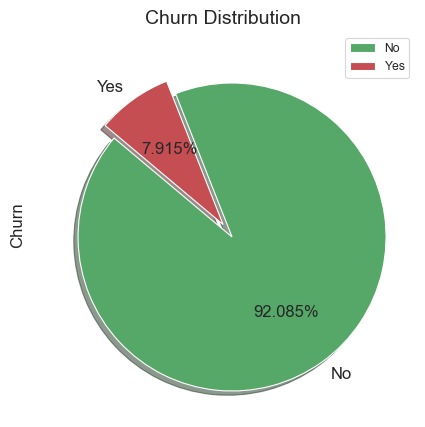

In [70]:
# Checking the customer churn distribution

# Generating pie chart
ax = (high_value_customers['churn'].value_counts() * 100.0 / len(high_value_customers)).plot.pie(
    autopct='%.3f%%',
    labels=['No', 'Yes'],
    colors=['g', 'r'],
    figsize=(10, 5),
    explode=(0.1, 0),  # Separates the slices
    shadow=True,  # Adding a shadow
    startangle=140,
    fontsize=12,
)

ax.legend(['No', 'Yes'], loc='upper right')

# Set title and labels
ax.set_ylabel('Churn', fontsize=12)
ax.set_title('Churn Distribution', fontsize=14)

plt.show()



<h4 style="background-color:powderblue;">Observations</h4>
<ul>
<li style="color:green;"> It seems data is highly imbalanced.</li>
<li style="color:green;">We can treat this data imbalance using SMOTE, Random under sampling or over sampling.</li>
</ul>

<h3 style="color:red;">Categorical Variable Analysis</h3>

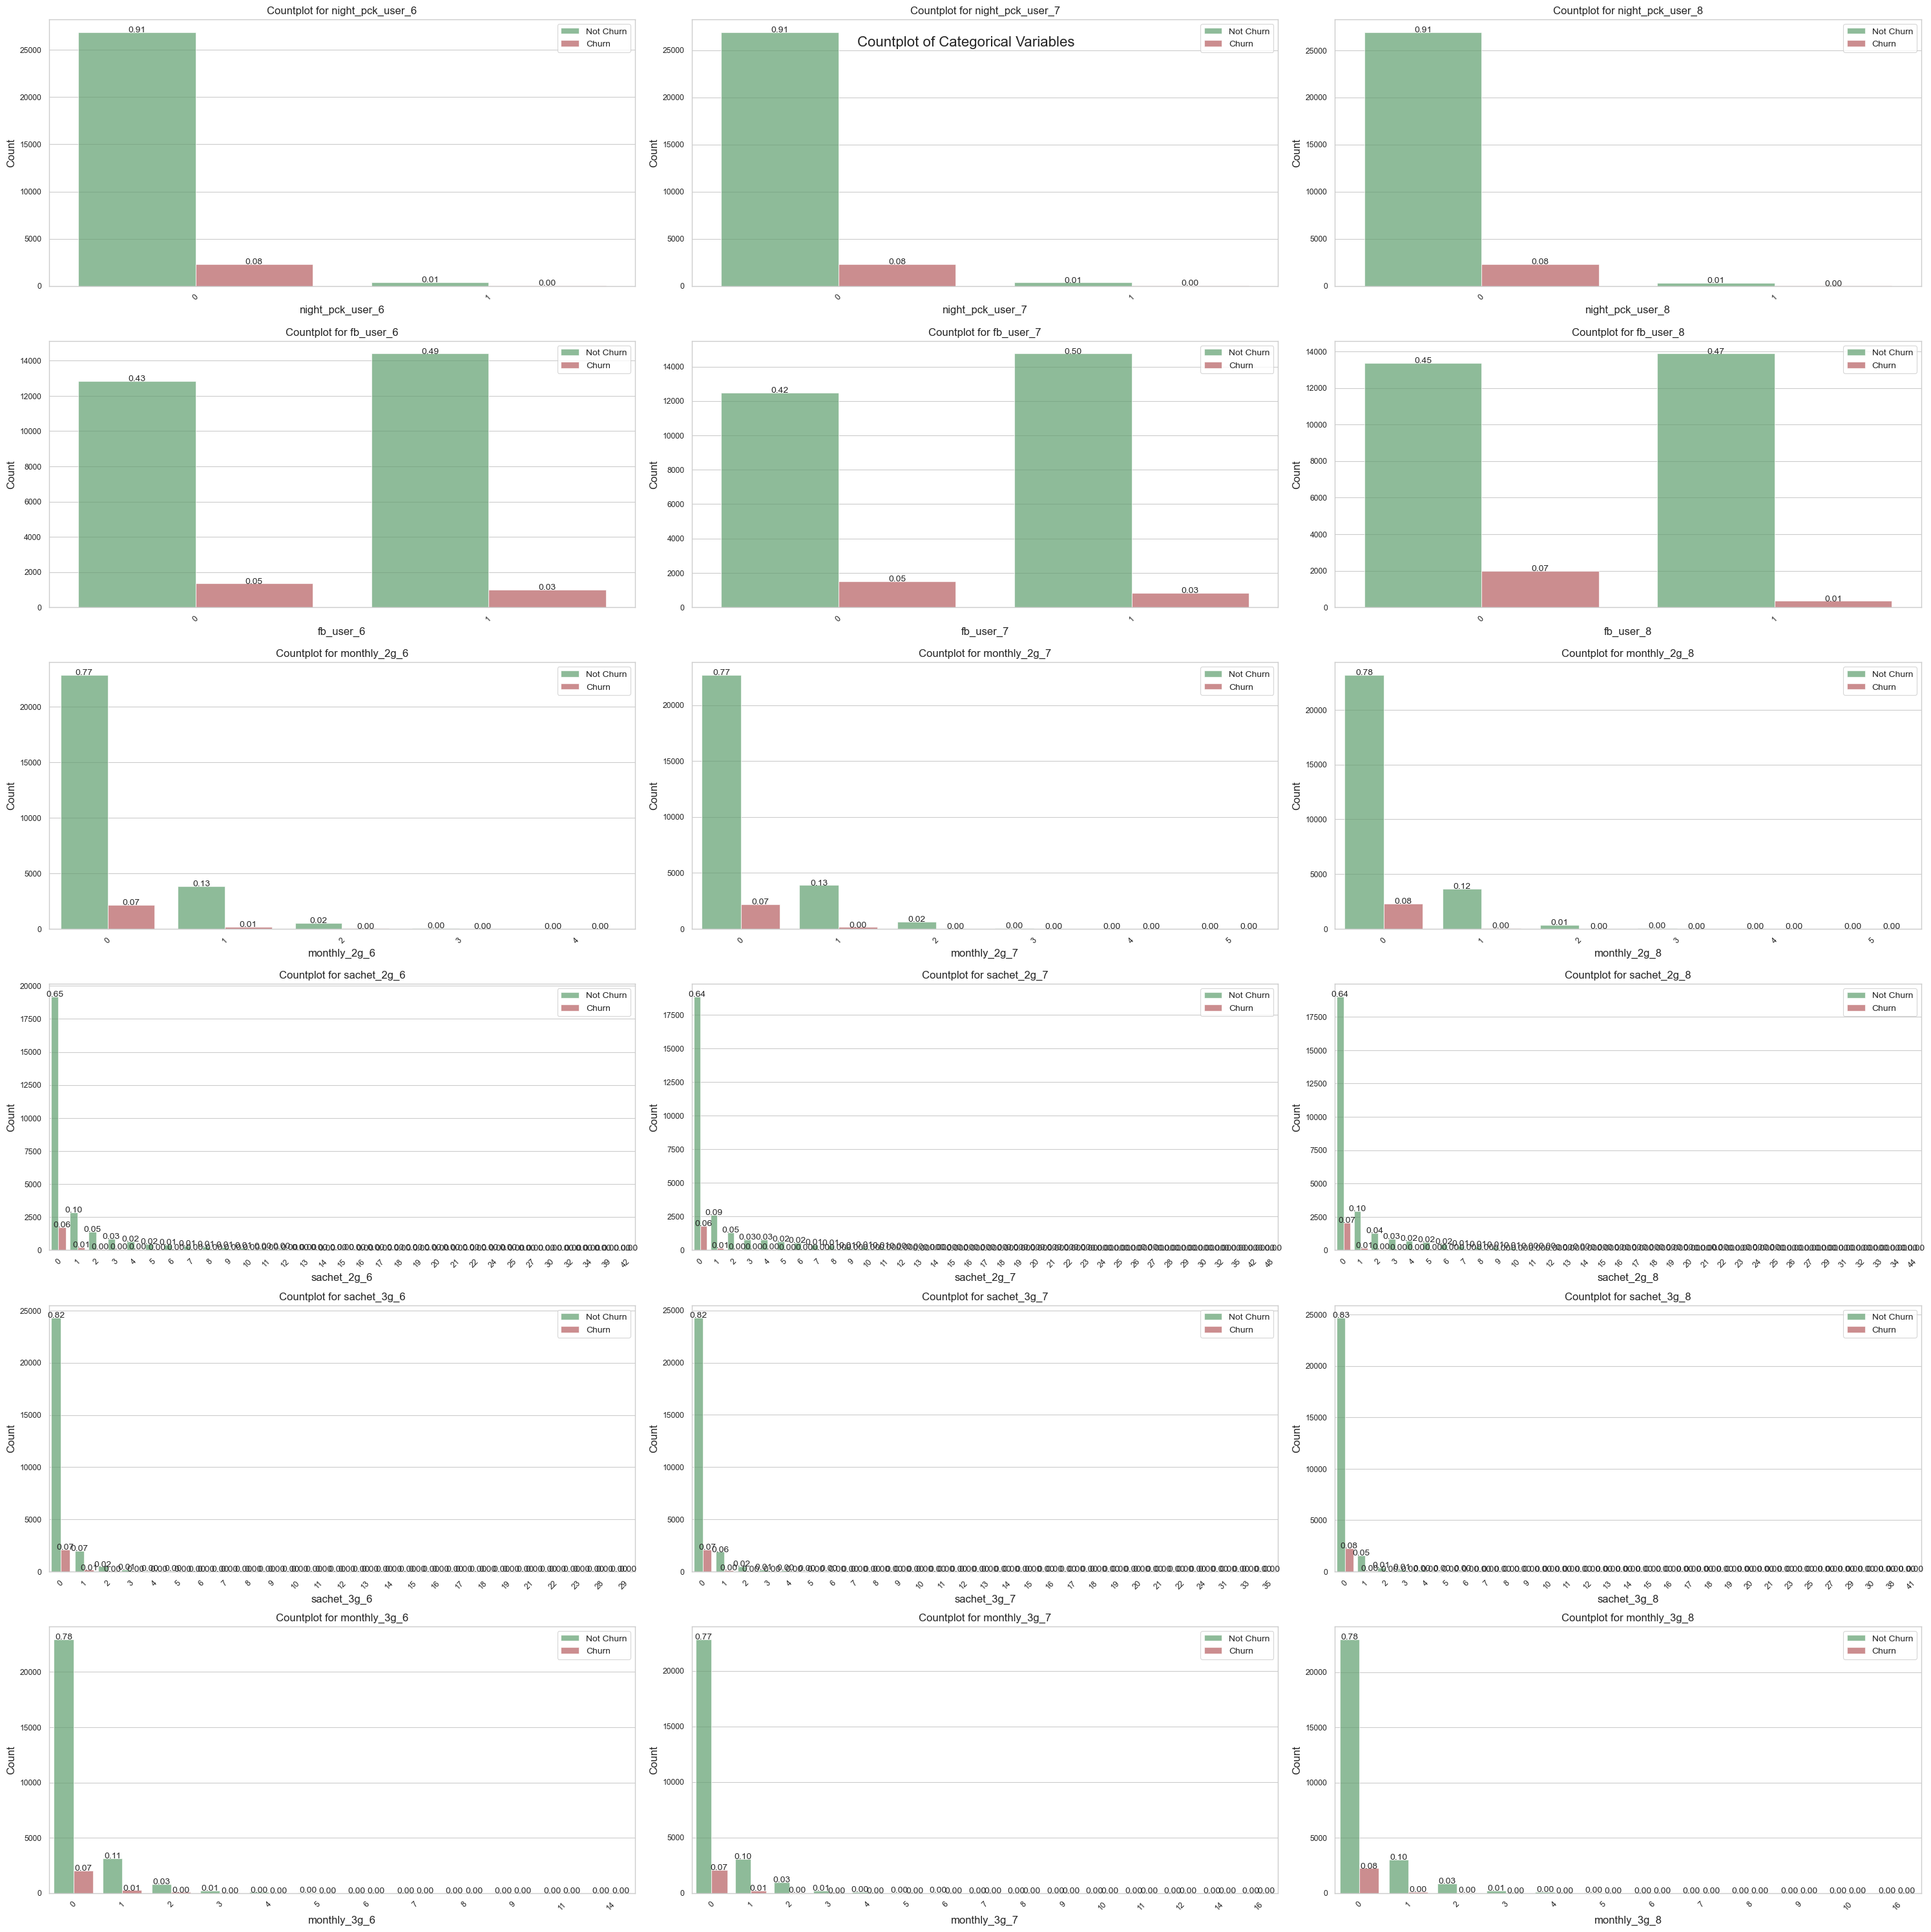

In [71]:
#Plotting the count plot
fig, axes = plt.subplots(round(len(cat_cols_list1) / 3), 3, figsize=(30, 30))

total = float(len(high_value_customers))
for i, ax in enumerate(fig.axes):
    if i < len(cat_cols_list1):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=cat_cols_list1[i], alpha=0.7, data=high_value_customers, hue=high_value_customers['churn'], 
                      palette=['g', 'r'], ax=ax)
        ax.legend(['Not Churn', 'Churn'], loc="upper right", fontsize=10)
        ax.set_xlabel(cat_cols_list1[i], fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha="center", fontsize=10)

        # Add subplot titles
        ax.set_title(f"Countplot for {cat_cols_list1[i]}", fontsize=12)

# Adjust layout
fig.tight_layout()

# Add main title
fig.suptitle('Countplot of Categorical Variables', fontsize=16)

# Remove empty subplots if necessary
if len(cat_cols_list1) % 3 != 0:
    for i in range(len(cat_cols_list1) % 3, 3):
        fig.delaxes(axes[-1, i])

plt.show()


<h4 style="background-color:powderblue;">Comments</h4>
<ul>
<li style="color:green;"> 99% of the users are not using nigh pack for all three months from  night_pck_user variables.</li>
<li style="color:green;"> Almost 52 % of users are not using FB for all the 3 months from fb user variables.</li>
<li style="color:green;"> 82% of the users have no monthly_2g and monthly_3g packs for all the 3 months.Those who have 
opted for one month plan are not churned out. But this count descreasing as per data. </li>
<li style="color:green;"> Almost 70% of the Users have not opted for sachet_2g and sachet_3g packs across the months. This is
also seems to be decreasing and users churned out comparing to users those use sachet plans.</li>
</ul>

<h3 style="color:red;">Numerical Variable Analysis</h3>


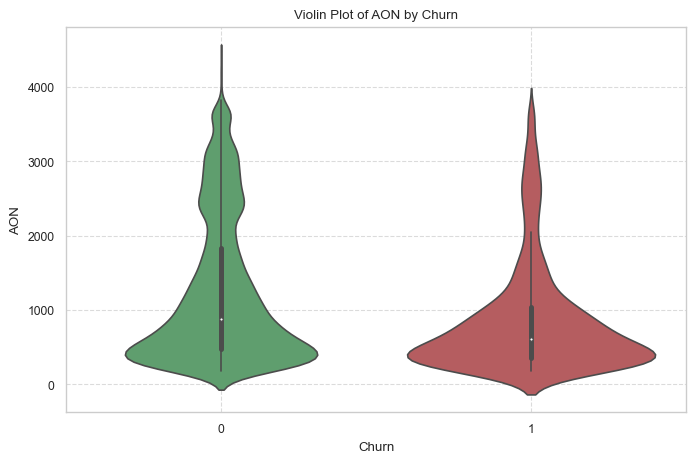

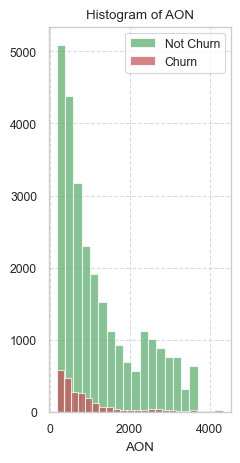

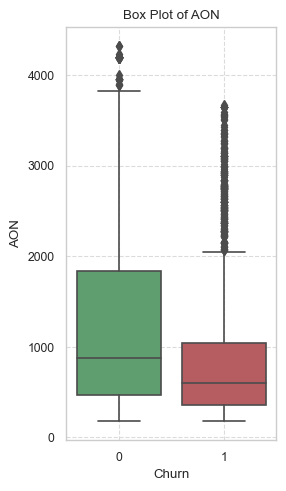

In [72]:

# Plot 1 - Violinplot.
plt.figure(figsize=(8, 5))
sns.violinplot(x='churn', y='aon', data=high_value_customers, palette=['g', 'r'])
plt.title('Violin Plot of AON by Churn')
plt.xlabel('Churn')
plt.ylabel('AON')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Plot 2 - Histograms
plt.figure(figsize=(8, 5))
plt.subplot(1, 3, 2)
plt.hist(high_value_customers.loc[high_value_customers['churn'] == 0, 'aon'], color='g', alpha=0.7, bins=20)
plt.hist(high_value_customers.loc[high_value_customers['churn'] == 1, 'aon'], color='r', alpha=0.7, bins=20)
plt.title('Histogram of AON')
plt.xlabel('AON')
plt.legend(['Not Churn', 'Churn'])
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 3 - Box Plot
plt.figure(figsize=(8, 5))
plt.subplot(1, 3, 3)
sns.boxplot(y='aon', data=high_value_customers, x='churn', palette=['g', 'r'])
plt.title('Box Plot of AON')
plt.xlabel('Churn')
plt.ylabel('AON')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


<h4 style="background-color:powderblue;">Comments</h4>
<ul>
<li style="color:green;"> This infomation tells us that user has been long time with the network.Churnout chances are less,
so we need to focus on such customers to retain.</li>
<li style="color:green;">Box plot shows that 25th to 75th percentile of churn customers have lower value that non-churn
customers</li>
</ul>

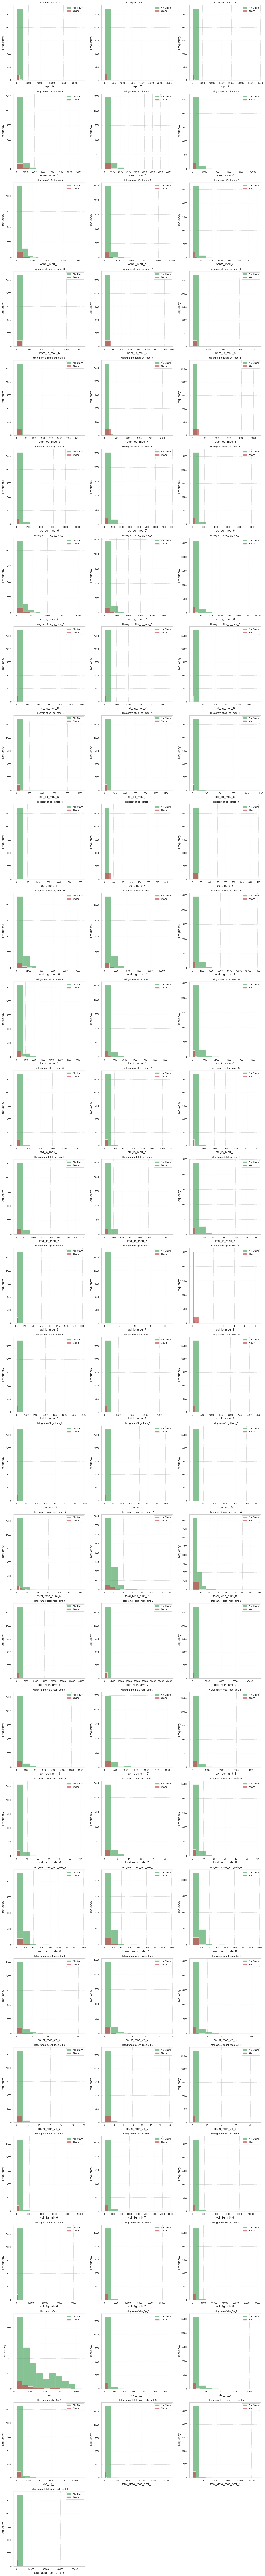

In [73]:
# Assuming num_cols is a list of column names
# For example, num_cols = ['column1', 'column2', 'column3']

# Select the data for histograms
data = high_value_customers[num_cols]

# Set up the layout for subplots
num_plots = len(num_cols)
num_rows = num_plots // 3 + (num_plots % 3 > 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Create histograms
for i, col in enumerate(num_cols):
    ax = axes[i]
    data[col][high_value_customers['churn'] == 0].hist(ax=ax, color='g', alpha=0.7, label='Not Churn')
    data[col][high_value_customers['churn'] == 1].hist(ax=ax, color='r', alpha=0.7, label='Churn')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend(loc='best')
    ax.grid(True, linestyle='--', alpha=0.7)

# Hide extra subplots
for i in range(num_plots, num_rows*3):
    fig.delaxes(axes[i])

# Adjust layout
fig.tight_layout()

plt.show()


<h4 style="background-color:powderblue;">Comments</h4>
<ul>
<li style="color:green;"> arpu: Those who have churned out seems to have avg revenue per user as 0 for all the three months.</li>
<li style="color:green;">ONNET: all calls and minute voice calls in the network is very less for churned one.</li>
<li style="color:green;">OFFNET: all calls and minute voice calls out side of the operator seems higher than onnet.</li>
<li style="color:green;">Roaming incoming and outgoing calls have been higher indicating that the customers could have churned
due to the location change.</li>
<li style="color:green;">Special incoming calls is high in the 8th month for the churned customers.</li>
<li style="color:green;">3g usage has been increasing among churned customers, hence increasing better 3g connectivity might 
help to reduce the churn.</li>
</ul>

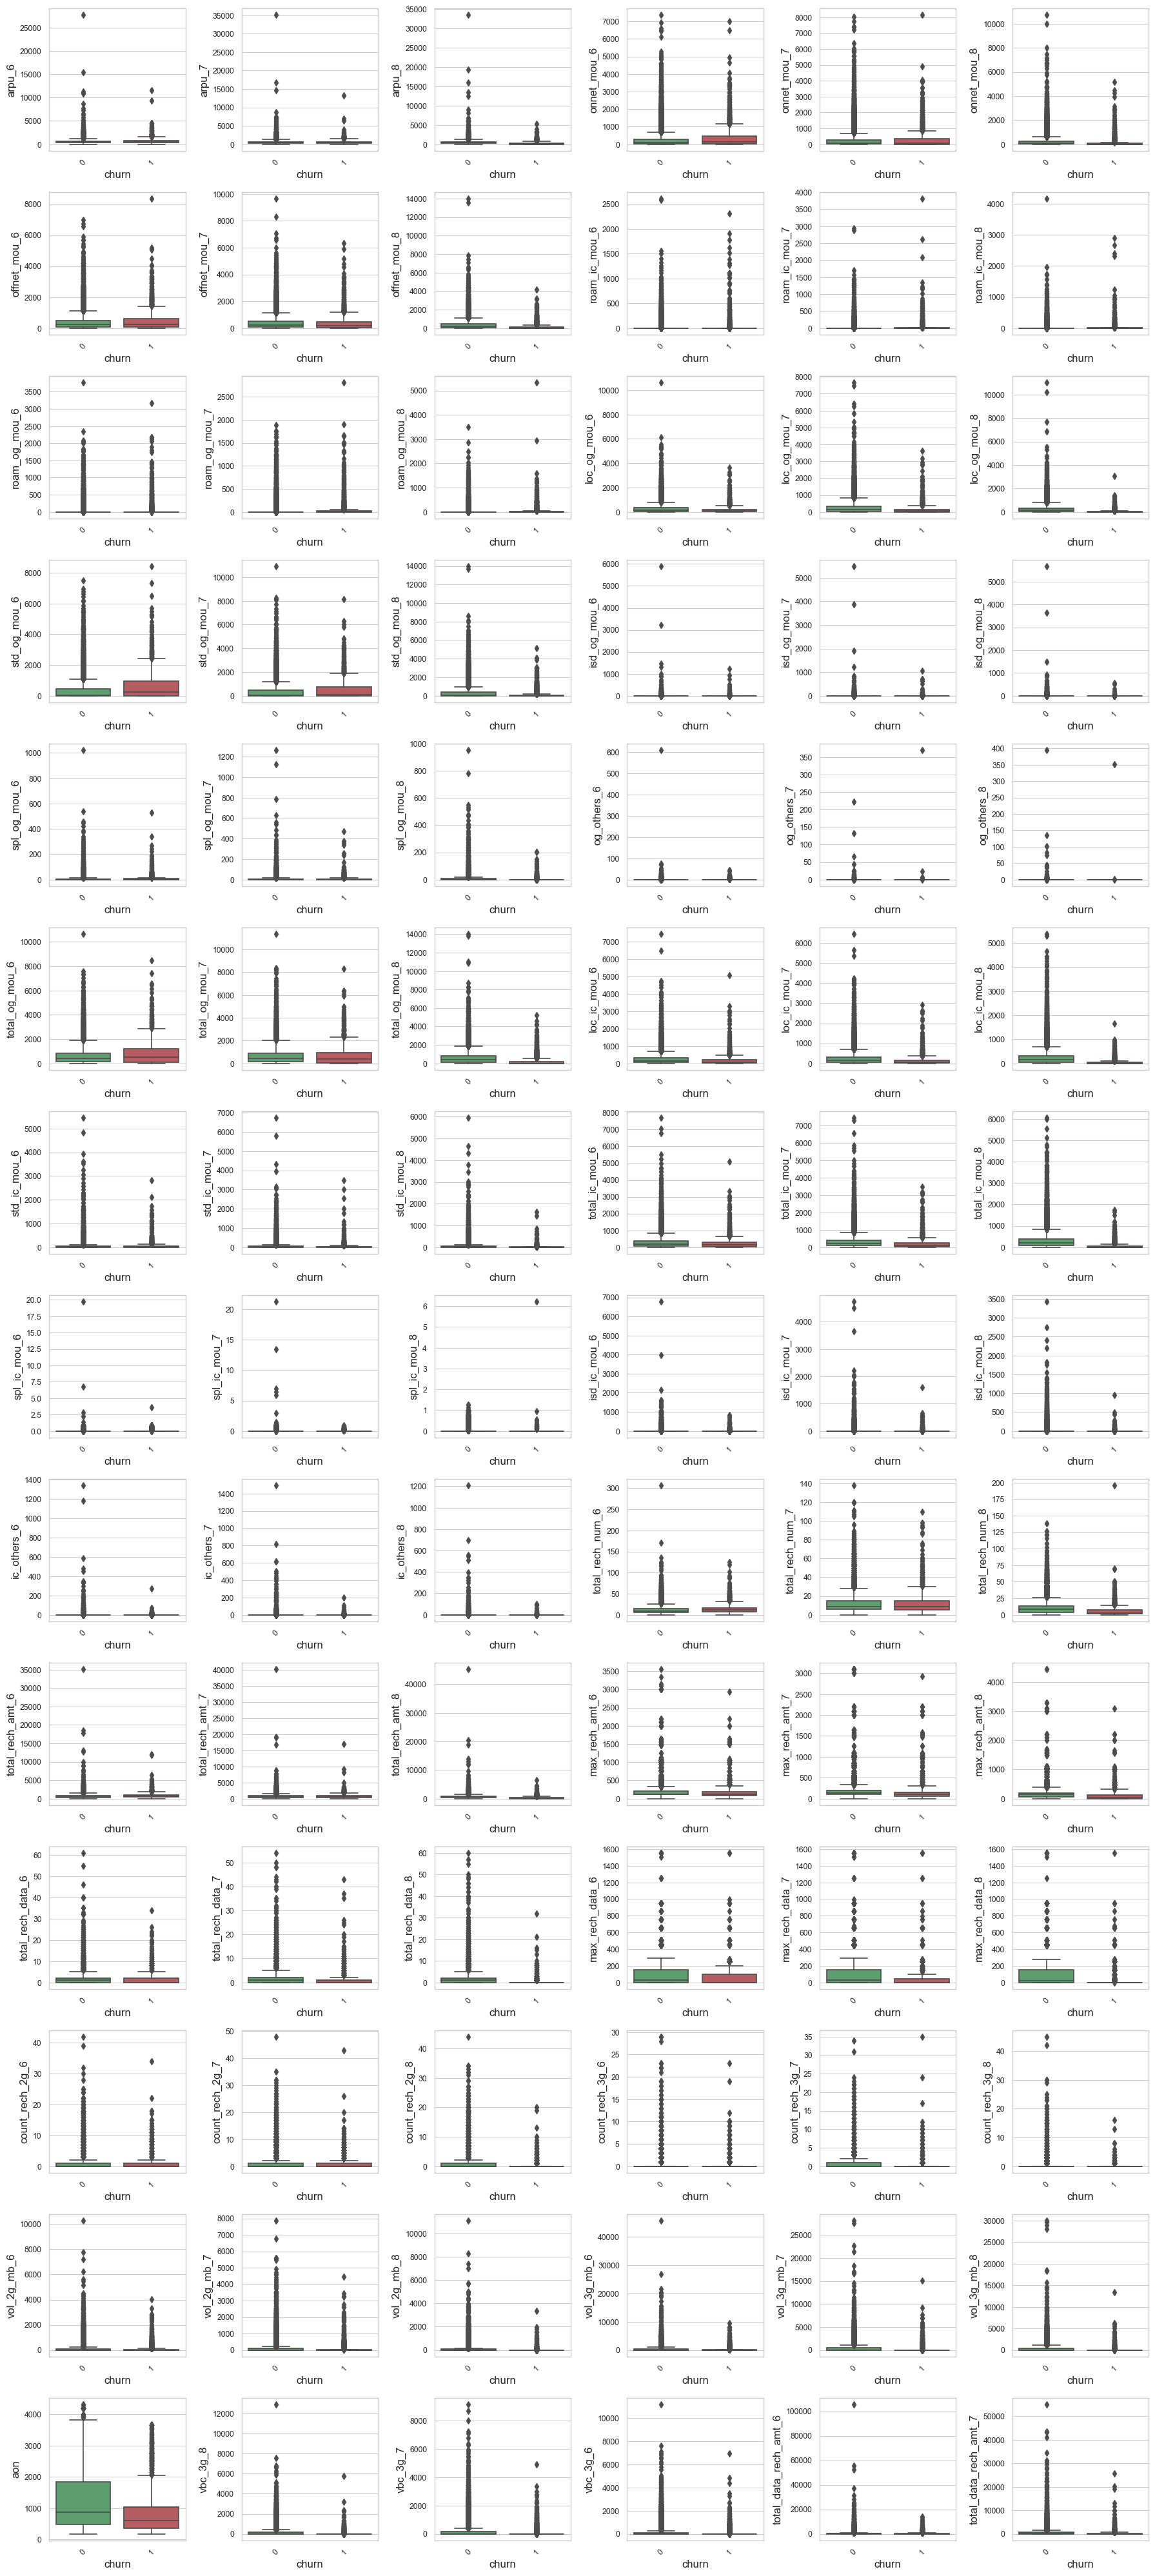

In [74]:
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(18, 40))

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=num_cols[i], data=high_value_customers, x='churn', ax=ax,palette = ['g','r'])
        ax.set_ylabel(num_cols[i],fontsize=12)
        ax.set_xlabel('churn',fontsize=12)

fig.tight_layout()

<h4 style="background-color:powderblue;">Comments</h4>
<ul>
<li style="color:green;"> Most of the data has outliers and not normally distributed.</li>
<li style="color:green;">The variance seems high, we can apply boxcox transformation.</li>
<li style="color:green;">roam_ic_mou variables have higher value for churned customers than the non-churned.</li>
<li style="color:green;">There is a steady decrease in the outgoing calls made by the churned customers for total_og variables.</li>
<li style="color:green;">There has been a decrease in the special incoming calls in the 8th month for spl_ic variables</li>
<li style="color:green;">There has been a decrease in the count_rech_2g and count_rech_3g variables</li>
</ul>

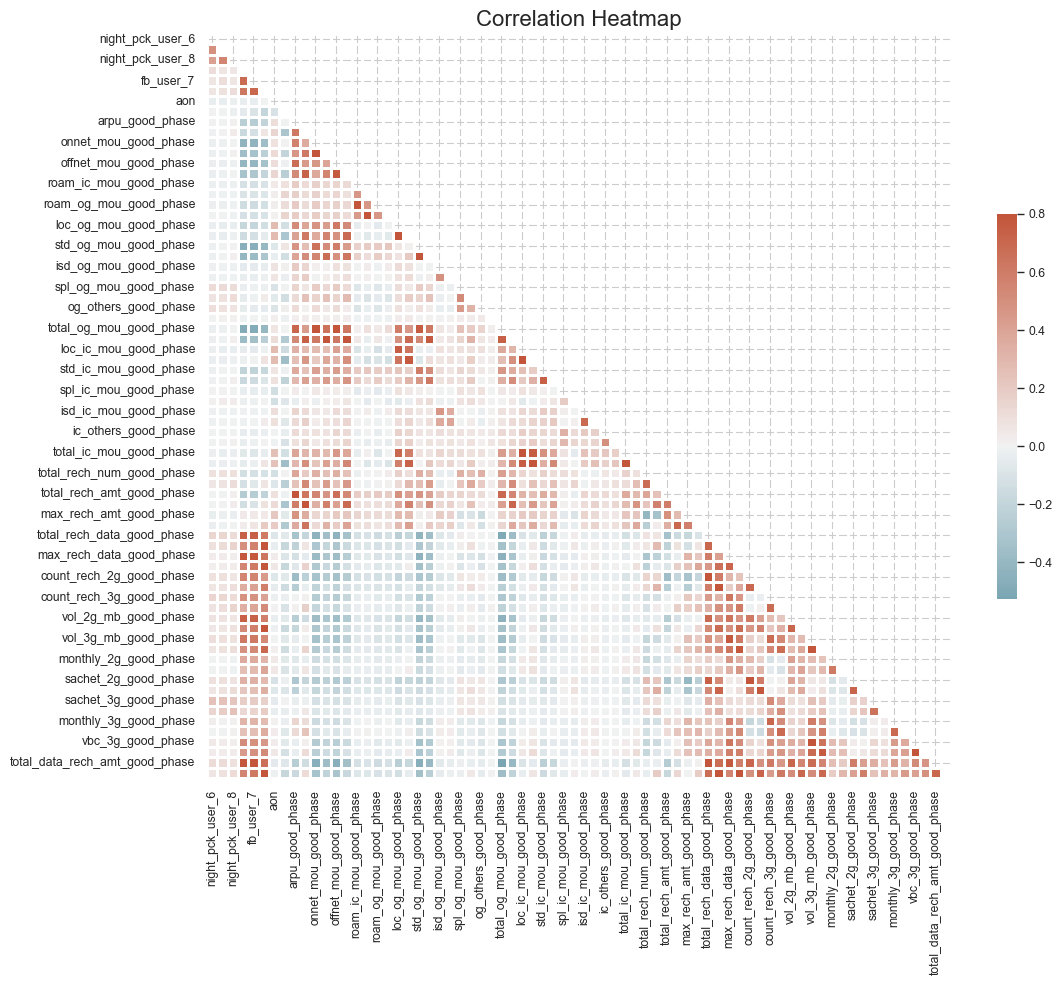

In [181]:
# Checking the correlation matrix
corr_mat = high_value_customers.corr()
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Define custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5})

# Add title
plt.title('Correlation Heatmap', fontsize=16)

plt.show()


In [76]:
# Checking the top correlated features
corr_mat1 = high_value_customers.corr().abs()

# Extract the upper triangle of the correlation matrix (excluding diagonal)
upper_triangle = corr_mat1.where(np.triu(np.ones(corr_mat1.shape), k=1).astype(bool))

# Find highly correlated features
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

# Print results
print("List of highly correlated features:")
for feature in highly_correlated_features:
    print("-", feature)

print("\nTotal features with high correlation:", len(highly_correlated_features))


List of highly correlated features:
- onnet_mou_8
- loc_og_mou_7
- loc_og_mou_8
- isd_og_mou_7
- isd_og_mou_8
- total_og_mou_6
- total_og_mou_7
- total_og_mou_8
- loc_ic_mou_7
- loc_ic_mou_8
- total_ic_mou_6
- total_ic_mou_7
- total_ic_mou_8
- total_rech_amt_6
- total_rech_amt_7
- total_rech_amt_8
- count_rech_2g_6
- count_rech_2g_7
- count_rech_2g_8
- sachet_2g_6
- sachet_2g_7
- sachet_2g_8
- sachet_3g_6
- sachet_3g_7
- sachet_3g_8

Total features with high correlation: 25


<h3 style="color:red;">Data Preparation</h3>

<h4 style="color:blue;">Outliers Treatment</h4>

In [77]:
from scipy.stats import skew

# Find skewed numerical features
num_skew_features = high_value_customers[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

# Select highly skewed features
high_skew_features = num_skew_features[num_skew_features > 0.2]
skew_index = high_skew_features.index

# Print the number of skewed features
print("There are {} numerical features with Skew > 0.2 ".format(high_skew_features.shape[0]))

# Create a DataFrame to display skewness
skewness = pd.DataFrame({'Skew': high_skew_features})
num_skew_features


There are 85 numerical features with Skew > 0.2 


og_others_7              111.136693
og_others_6              109.666418
og_others_8              99.486834 
isd_og_mou_8             88.957842 
isd_og_mou_6             87.011130 
isd_og_mou_7             83.406637 
spl_ic_mou_7             72.455557 
ic_others_6              58.476965 
ic_others_8              46.938700 
ic_others_7              44.139529 
spl_ic_mou_6             41.540185 
isd_ic_mou_6             34.696418 
isd_ic_mou_7             24.405269 
total_data_rech_amt_6    22.639450 
spl_og_mou_7             19.449973 
total_data_rech_amt_8    19.062494 
roam_ic_mou_8            18.590514 
total_rech_amt_8         18.073139 
arpu_7                   17.681620 
isd_ic_mou_8             17.417915 
roam_ic_mou_7            17.264460 
total_rech_amt_7         16.200891 
arpu_8                   15.417555 
spl_og_mou_6             15.414604 
roam_og_mou_8            14.479325 
spl_og_mou_8             14.429340 
std_ic_mou_7             13.514776 
total_rech_amt_6         13.

In [78]:
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

# Applying Boxcox transformation for numerical variables with high skewness
for feature in skew_index:
    
    # Calculate the optimal lambda parameter for Boxcox
    lambda_param = boxcox_normmax(high_value_customers[feature] + 1)
    
    # Apply Boxcox transformation
    high_value_customers[feature] = boxcox1p(high_value_customers[feature], lambda_param)


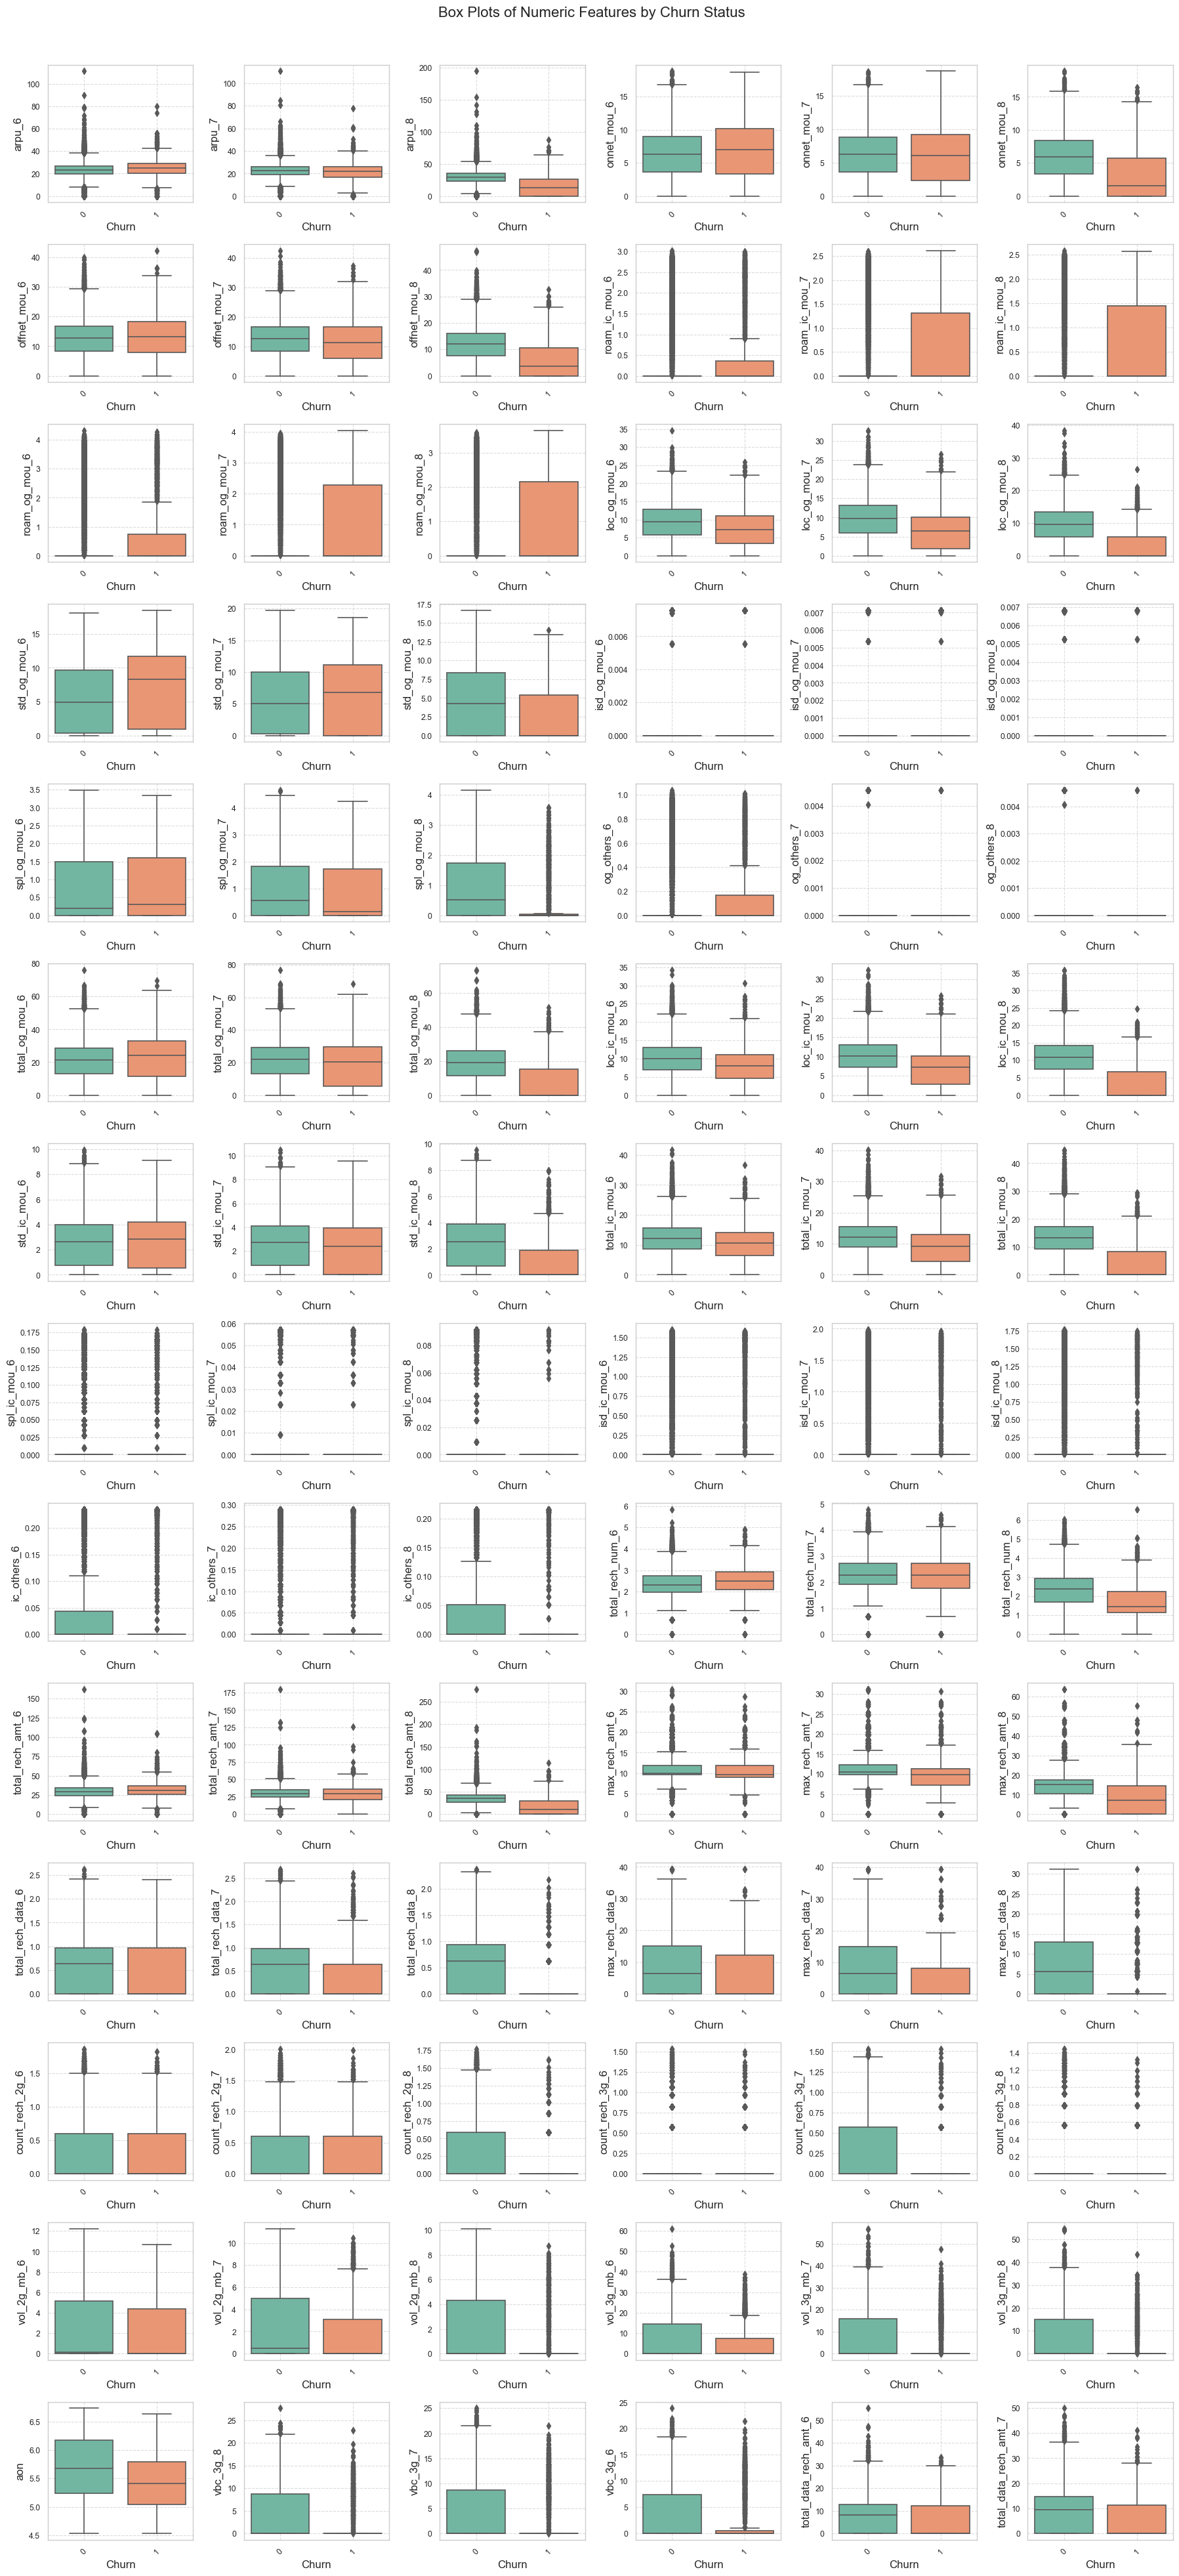

In [79]:
# Create box plots for all numeric features
fig, axes = plt.subplots(round(len(num_cols) / 6), 6, figsize=(18, 40))

# Set a title for the entire figure
fig.suptitle('Box Plots of Numeric Features by Churn Status', fontsize=16)

for i, ax in enumerate(fig.axes):
    if i < len(num_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=num_cols[i], data=high_value_customers, x='churn', ax=ax, palette=['#66c2a5', '#fc8d62'])  # Example colors
        ax.set_ylabel(num_cols[i], fontsize=12)
        ax.set_xlabel('Churn', fontsize=12)
        
        # Add grid lines
        ax.grid(True, linestyle='--', alpha=0.7)

# Remove any extra subplots
for i in range(len(num_cols), len(fig.axes)):
    fig.delaxes(fig.axes[i])

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.97])  # Add some space at the top for the title

# Show the plot
plt.show()


<h4 style="color:blue;">Feature Engineering</h4>

<h4 style="background-color:powderblue;">Comments</h4>
<ul>
<li style="color:green;">6th and 7th month are in good phase. We will use avg of both the values to determine good phase.</li>
<li style="color:green;">This will also reduce the number of features then it will be good for Model Building.</li>
</ul>

In [80]:
for col in high_value_customers.columns:
    print(col)

arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_mou_6
std_ic_mou_7
std_ic_mou_8
total_ic_mou_6
total_ic_mou_7
total_ic_mou_8
spl_ic_mou_6
spl_ic_mou_7
spl_ic_mou_8
isd_ic_mou_6
isd_ic_mou_7
isd_ic_mou_8
ic_others_6
ic_others_7
ic_others_8
total_rech_num_6
total_rech_num_7
total_rech_num_8
total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
max_rech_amt_6
max_rech_amt_7
max_rech_amt_8
total_rech_data_6
total_rech_data_7
total_rech_data_8
max_rech_data_6
max_rech_data_7
max_rech_data_8
count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8
v

In [81]:
def derive_good_action_phase(df, col):
    """
    Derives new columns based on the input column and drops the original ones.
    
    Parameters:
        df (DataFrame): Input DataFrame.
        col (str): Name of the column.
        
    Returns:
        df (DataFrame): Updated DataFrame with new columns.
    """
    # Generate column names
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    # Calculate new columns
    df[good_phase_col] = (df[col_6] + df[col_7]) / 2
    df[action_phase_col] = df[col_8]
    
    # Drop original columns
    df.drop([col_6, col_7, col_8], axis=1, inplace=True)
    
    return df


In [82]:
    
# List of columns for which to create good phase and action phase features
columns_to_process = [
    "arpu", "onnet_mou", "offnet_mou", "roam_ic_mou", "roam_og_mou", "loc_og_mou", "std_og_mou",
    "isd_og_mou", "spl_og_mou", "og_others", "total_og_mou", "loc_ic_mou", "std_ic_mou",
    "spl_ic_mou", "isd_ic_mou", "ic_others", "total_ic_mou", "total_rech_num", "total_rech_amt",
    "max_rech_amt", "total_rech_data", "max_rech_data", "count_rech_2g", "count_rech_3g",
    "vol_2g_mb", "vol_3g_mb", "monthly_2g", "sachet_2g", "sachet_3g",
    "monthly_3g", "vbc_3g", "total_data_rech_amt"
]

# Loop through columns and apply the derive_good_action_phase function
for col in columns_to_process:
    high_value_customers = derive_good_action_phase(high_value_customers, col)
    print(f"Processed column: {col}")


Processed column: arpu
Processed column: onnet_mou
Processed column: offnet_mou
Processed column: roam_ic_mou
Processed column: roam_og_mou
Processed column: loc_og_mou
Processed column: std_og_mou
Processed column: isd_og_mou
Processed column: spl_og_mou
Processed column: og_others
Processed column: total_og_mou
Processed column: loc_ic_mou
Processed column: std_ic_mou
Processed column: spl_ic_mou
Processed column: isd_ic_mou
Processed column: ic_others
Processed column: total_ic_mou
Processed column: total_rech_num
Processed column: total_rech_amt
Processed column: max_rech_amt
Processed column: total_rech_data
Processed column: max_rech_data
Processed column: count_rech_2g
Processed column: count_rech_3g
Processed column: vol_2g_mb
Processed column: vol_3g_mb
Processed column: monthly_2g
Processed column: sachet_2g
Processed column: sachet_3g
Processed column: monthly_3g
Processed column: vbc_3g
Processed column: total_data_rech_amt


In [83]:
#Checking the dataframe after conversion
high_value_customers.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  fb_user_7  \
0  0                 0                 0                 1          1           
1  0                 0                 0                 0          0           
2  0                 0                 0                 0          1           
3  0                 0                 0                 0          0           
4  0                 0                 0                 0          1           

   fb_user_8       aon  churn  arpu_good_phase  arpu_action_phase  \
0  1          5.742221  1      16.081833        20.713069           
1  0          5.612021  1      32.670623        70.113933           
2  1          4.945874  0      21.795479        16.778963           
3  0          5.536787  0      24.097626        34.307604           
4  1          5.413330  0      12.945043        26.644541           

   onnet_mou_good_phase  onnet_mou_action_phase  offnet_mou_good_phase  \
0  0.000000              0.000000                0.000000                
1  5.555118              5.302856                16.895627               
2  9.568582              4.644254                8.971096                
3  6.937999              6.164248                19.875305               
4  5.338160              4.574672                8.963148                

   offnet_mou_action_phase  roam_ic_mou_good_phase  roam_ic_mou_action_phase  \
0  0.000000                 0.000000                0.000000                   
1  14.349754                1.951452                1.958364                   
2  10.516335                0.000000                0.000000                   
3  20.768193                0.000000                0.000000                   
4  12.210779                0.000000                0.000000                   

   roam_og_mou_good_phase  roam_og_mou_action_phase  loc_og_mou_good_phase  \
0  0.000000                0.000000                  0.000000                
1  2.245214                2.439742                  14.349622               
2  0.000000                0.000000                  12.773657               
3  0.000000                0.000000                  8.394549                
4  0.000000                0.000000                  9.429599                

   loc_og_mou_action_phase  std_og_mou_good_phase  std_og_mou_action_phase  \
0  0.000000                 0.000000               0.000000                  
1  12.252005                5.829424               5.579032                  
2  7.419760                 7.176628               5.952949                  
3  9.688926                 11.403356              10.130424                 
4  10.913341                1.818925               4.553437                  

   isd_og_mou_good_phase  isd_og_mou_action_phase  spl_og_mou_good_phase  \
0  0.000000               0.000000                 0.000000                
1  0.003566               0.006833                 0.706747                
2  0.000000               0.000000                 0.000000                
3  0.000000               0.000000                 0.000000                
4  0.002682               0.000000                 0.047143                

   spl_og_mou_action_phase  og_others_good_phase  og_others_action_phase  \
0  0.000000                 0.0                   0.0                      
1  1.722190                 0.0                   0.0                      
2  2.005312                 0.0                   0.0                      
3  0.000000                 0.0                   0.0                      
4  2.338095                 0.0                   0.0                      

   total_og_mou_good_phase  total_og_mou_action_phase  loc_ic_mou_good_phase  \
0  0.000000                 0.000000                   0.000000                
1  24.123337                18.781592                  14.011507               
2  22.699951                14.099009                  6.561508                
3  

In [84]:
high_value_customers.shape

(29591, 72)

In [85]:
high_value_customers.describe()

night_pck_user_6  night_pck_user_7  night_pck_user_8     fb_user_6  \
count  29591.000000      29591.000000      29591.000000      29591.000000   
mean   0.013619          0.012639          0.011490          0.520226       
std    0.115905          0.111712          0.106576          0.499599       
min    0.000000          0.000000          0.000000          0.000000       
25%    0.000000          0.000000          0.000000          0.000000       
50%    0.000000          0.000000          0.000000          1.000000       
75%    0.000000          0.000000          0.000000          1.000000       
max    1.000000          1.000000          1.000000          1.000000       

          fb_user_7     fb_user_8           aon         churn  \
count  29591.000000  29591.000000  29591.000000  29591.000000   
mean   0.527018      0.480585      5.660176      0.079146       
std    0.499278      0.499631      0.573830      0.269971       
min    0.000000      0.000000      4.531506      0.000000       
25%    0.000000      0.000000      5.221237      0.000000       
50%    1.000000      0.000000      5.651573      0.000000       
75%    1.000000      1.000000      6.147260      0.000000       
max    1.000000      1.000000      6.732390      1.000000       

       arpu_good_phase  arpu_action_phase  onnet_mou_good_phase  \
count  29591.000000     29591.000000       29591.000000           
mean   22.798782        28.124093          6.283979               
std    5.733260         11.857145          3.602021               
min    0.000000         0.000000           0.000000               
25%    19.477480        21.631427          3.619989               
50%    22.613637        28.665444          6.293384               
75%    25.880801        34.941486          8.844963               
max    111.206751       195.165650         18.534474              

       onnet_mou_action_phase  offnet_mou_good_phase  offnet_mou_action_phase  \
count  29591.000000            29591.000000           29591.000000              
mean   5.658506                12.501225              11.462108                 
std    3.645878                6.077730               6.541916                  
min    0.000000                0.000000               0.000000                  
25%    2.944986                8.460217               6.997253                  
50%    5.714642                12.700653              11.728594                 
75%    8.228551                16.543122              15.909540                 
max    18.901974               41.070990              47.285381                 

       roam_ic_mou_good_phase  roam_ic_mou_action_phase  \
count  29591.000000            29591.000000               
mean   0.349209                0.303004                   
std    0.646340                0.691233                   
min    0.000000                0.000000                   
25%    0.000000                0.000000                   
50%    0.000000                0.000000                   
75%    0.573108                0.000000                   
max    2.806912                2.578792                   

       roam_og_mou_good_phase  roam_og_mou_action_phase  \
count  29591.000000            29591.000000               
mean   0.493466                0.404392                   
std    0.910203                0.926736                   
min    0.000000                0.000000                   
25%    0.000000                0.000000                   
50%    0.000000                0.000000                   
75%    0.845680                0.000000                   
max    4.102137                3.641030                   

       loc_og_mou_good_phase  loc_og_mou_action_phase  std_og_mou_good_phase  \
count  29591.000000           29591.000000             29591.000000            
mean   9.189647               9.022942                 5.594489                
std    4.954192               5.683728                 4.613842                
min    0.

<h4 style="color:blue;">Train & Test Split</h4>

In [86]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Define target variable and features
X = high_value_customers.drop('churn', axis=1)
y = high_value_customers['churn']

# Splitting the data into training(70%) and testing(30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Check the shape of the created datasets
print("Dimension of Training Features (X_train):", X_train.shape)
print("Dimension of Training Target (y_train):", y_train.shape)
print("Dimension of Testing Features (X_test):", X_test.shape)
print("Dimension of Testing Target (y_test):", y_test.shape)


Dimension of Training Features (X_train): (20713, 71)
Dimension of Training Target (y_train): (20713,)
Dimension of Testing Features (X_test): (8878, 71)
Dimension of Testing Target (y_test): (8878,)


In [87]:
# Storing the non-binary column names in a list for StandardScaler
feature_columns = []

# Get a list of all column names
all_cols = high_value_customers.columns.tolist()

# Iterate through the columns
for col in all_cols:
    if high_value_customers[col].nunique() > 2:
        feature_columns.append(col)

# Display the list of feature columns
feature_columns


['aon',
 'arpu_good_phase',
 'arpu_action_phase',
 'onnet_mou_good_phase',
 'onnet_mou_action_phase',
 'offnet_mou_good_phase',
 'offnet_mou_action_phase',
 'roam_ic_mou_good_phase',
 'roam_ic_mou_action_phase',
 'roam_og_mou_good_phase',
 'roam_og_mou_action_phase',
 'loc_og_mou_good_phase',
 'loc_og_mou_action_phase',
 'std_og_mou_good_phase',
 'std_og_mou_action_phase',
 'isd_og_mou_good_phase',
 'isd_og_mou_action_phase',
 'spl_og_mou_good_phase',
 'spl_og_mou_action_phase',
 'og_others_good_phase',
 'og_others_action_phase',
 'total_og_mou_good_phase',
 'total_og_mou_action_phase',
 'loc_ic_mou_good_phase',
 'loc_ic_mou_action_phase',
 'std_ic_mou_good_phase',
 'std_ic_mou_action_phase',
 'spl_ic_mou_good_phase',
 'spl_ic_mou_action_phase',
 'isd_ic_mou_good_phase',
 'isd_ic_mou_action_phase',
 'ic_others_good_phase',
 'ic_others_action_phase',
 'total_ic_mou_good_phase',
 'total_ic_mou_action_phase',
 'total_rech_num_good_phase',
 'total_rech_num_action_phase',
 'total_rech_amt_g

In [88]:
from sklearn.preprocessing import StandardScaler

#Using StandardScaler for Scaling the X_train and X_test
scaler = StandardScaler()

scaled_data = scaler.fit_transform(X_train[feature_columns])

X_train[feature_columns] = scaler.fit_transform(X_train[feature_columns])
X_test[feature_columns] = scaler.transform(X_test[feature_columns])

# Checking the scaled dataframe
X_train.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
28117  0                 0                 0                 1           
1574   0                 0                 0                 1           
22863  0                 0                 0                 1           
8840   0                 0                 0                 1           
6279   0                 0                 0                 1           

       fb_user_7  fb_user_8       aon  arpu_good_phase  arpu_action_phase  \
28117  1          1         -0.528861 -0.467471        -0.319068            
1574   1          1          0.233154 -0.818194        -0.430065            
22863  1          1          0.548641 -0.452190        -0.813731            
8840   1          1         -1.843725  0.146634        -0.187263            
6279   1          1          1.354596 -0.565391        -0.819506            

       onnet_mou_good_phase  onnet_mou_action_phase  offnet_mou_good_phase  \
28117 -1.051506             -1.047610               -0.597360                
1574  -1.347858             -1.281932               -0.214108                
22863 -0.237607             -0.641922               -0.686547                
8840   1.042633              0.866636               -0.291516                
6279  -1.199350             -1.551369               -1.015964                

       offnet_mou_action_phase  roam_ic_mou_good_phase  \
28117 -0.154047                -0.54328                  
1574  -0.501223                -0.54328                  
22863 -0.581803                -0.54328                  
8840   0.025460                -0.54328                  
6279  -1.490175                -0.54328                  

       roam_ic_mou_action_phase  roam_og_mou_good_phase  \
28117 -0.44171                  -0.545471                 
1574  -0.44171                  -0.545471                 
22863 -0.44171                  -0.545471                 
8840  -0.44171                  -0.545471                 
6279  -0.44171                  -0.545471                 

       roam_og_mou_action_phase  loc_og_mou_good_phase  \
28117 -0.440755                 -0.158734                
1574  -0.440755                 -0.050150                
22863 -0.440755                 -0.019972                
8840  -0.440755                  1.241791                
6279  -0.440755                 -0.855093                

       loc_og_mou_action_phase  std_og_mou_good_phase  \
28117  0.156611                -1.208238                
1574  -0.711955                -1.099441                
22863 -0.484903                -1.208238                
8840   1.060244                -0.721129                
6279  -1.585997                -0.930993                

       std_og_mou_action_phase  isd_og_mou_good_phase  \
28117 -1.102076                -0.337428                
1574  -0.056580                -0.337428                
22863 -1.102076                -0.337428                
8840  -0.250553                -0.337428                
6279  -0.820039                -0.337428                

       isd_og_mou_action_phase  spl_og_mou_good_phase  \
28117 -0.259076                -1.026313                
1574  -0.259076                 2.115867                
22863 -0.259076                 1.237381                
8840  -0.259076                 0.412287                
6279  -0.259076                 1.349448                

       spl_og_mou_action_phase  og_others_good_phase  og_others_action_phase  \
28117 -0.864140                -0.503468             -0.076965                 
1574   1.540091                 1.481465             -0.076965                 
22863  1.920525                -0.503468             -0.076965                 
8840  -0.864140                -0.503468             -0.076965                 
6279  -0.146499                -0.503468             -0.076965                 

       total_og_mou_good_phase  total_og_mou_action_phase  \
28117 

In [89]:
X_test.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
3945   0                 0                 0                 0           
18981  0                 0                 0                 0           
24100  0                 0                 0                 0           
25300  0                 0                 0                 1           
15026  0                 0                 0                 1           

       fb_user_7  fb_user_8       aon  arpu_good_phase  arpu_action_phase  \
3945   0          0         -0.126491  0.031503         0.198380            
18981  0          0         -0.766292  0.401345         1.028519            
24100  0          0          0.807275 -1.233034         0.217727            
25300  1          1          0.671698  1.238497         1.044121            
15026  1          1         -1.165471 -1.501047        -0.270186            

       onnet_mou_good_phase  onnet_mou_action_phase  offnet_mou_good_phase  \
3945   1.404110              1.512551               -0.850806                
18981  0.505724              1.320249                1.138970                
24100  0.152057              0.460959                0.132609                
25300  0.037504              0.316263                0.658094                
15026 -1.662726             -1.551369               -1.442818                

       offnet_mou_action_phase  roam_ic_mou_good_phase  \
3945  -0.266763                -0.543280                 
18981  1.734024                 0.780640                 
24100  0.310991                 1.408633                 
25300  0.794836                 2.537277                 
15026 -1.555746                -0.543280                 

       roam_ic_mou_action_phase  roam_og_mou_good_phase  \
3945  -0.441710                 -0.545471                 
18981 -0.441710                  1.001603                 
24100  0.802457                  1.958513                 
25300  2.386037                  2.070175                 
15026 -0.441710                 -0.545471                 

       roam_og_mou_action_phase  loc_og_mou_good_phase  \
3945  -0.440755                 -0.976885                
18981 -0.440755                 -0.213913                
24100  1.623131                 -0.330329                
25300  1.449200                  1.125470                
15026 -0.440755                 -1.150212                

       loc_og_mou_action_phase  std_og_mou_good_phase  \
3945  -1.008852                 1.219854                
18981  0.567866                 1.170303                
24100  0.023565                 0.668732                
25300  1.274169                -1.061022                
15026 -1.585997                -1.208238                

       std_og_mou_action_phase  isd_og_mou_good_phase  \
3945   1.393512                -0.337428                
18981  1.700215                -0.337428                
24100  0.845012                -0.337428                
25300 -0.616228                -0.337428                
15026 -1.102076                -0.337428                

       isd_og_mou_action_phase  spl_og_mou_good_phase  \
3945  -0.259076                 0.409806                
18981 -0.259076                 0.373077                
24100 -0.259076                -1.026313                
25300 -0.259076                 1.516538                
15026 -0.259076                -0.207703                

       spl_og_mou_action_phase  og_others_good_phase  og_others_action_phase  \
3945  -0.313011                -0.503468             -0.076965                 
18981  0.982632                -0.503468             -0.076965                 
24100 -0.864140                -0.503468             -0.076965                 
25300 -0.864140                -0.503468             -0.076965                 
15026  0.163114                -0.503468             -0.076965                 

       total_og_mou_good_phase  total_og_mou_action_phase  \
3945  

<h4 style="color:red;">Data Imbalance Treatment</h4>

The imbalance data treatment is very much required to have better precision and recall. The following algos
are used for the same treatment.
<h4 style="background-color:powderblue;">Comments</h4>

<ol>
  <li style="color:violet;">Random Under Sampling:
  </li>
  <li style="color:violet;">Over Sampling:
    <ol>
      <li style="color:green;">Random Over Sampling</li>
      <li style="color:green;">Synthetic Minority Oversampling (SMOTE)</li>
    </ol>
  <li style="color:violet;">Combined Under & Over Sampling:
    <ol>
      <li style="color:green;">SMOTEENN : SMOTE + Edited NearestNeighbors</li>
      <li style="color:green;">SMOTETomek: SMOTE + Tomek Links</li>
    </ol>	
  </li>
</ol>


In [90]:

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Oversampling minority class using SMOTEENN
sampling = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = sampling.fit_resample(X_train, y_train)

# Converting to DataFrames if necessary
X_train_resampled = pd.DataFrame(data=X_train_resampled)
y_train_resampled = pd.DataFrame(data=y_train_resampled)

# Print dimensions after resampling
print("Dimensions of X_train after resampling:", X_train_resampled.shape)
print("Dimensions of y_train after resampling:", y_train_resampled.shape)


Dimensions of X_train after resampling: (34146, 71)
Dimensions of y_train after resampling: (34146, 1)


In [91]:
# Random Over Sampling
from imblearn.over_sampling import RandomOverSampler

# Apply RandomOverSampler to balance the class distribution
X_r_over_sampled, y_r_over_sampled = RandomOverSampler(random_state=100).fit_resample(X_train, y_train)

# Convert the oversampled arrays to DataFrames
X_r_over_sampled = pd.DataFrame(data=X_r_over_sampled)
y_r_over_sampled = pd.DataFrame(data=y_r_over_sampled)

# Print dimensions after Random Over Sampling
print("Dimension of X_train after Random Over Sampling:", X_r_over_sampled.shape)
print("Dimension of Y_train after Random Over Sampling:", y_r_over_sampled.shape)


Dimension of X_train after Random Over Sampling: (38134, 71)
Dimension of Y_train after Random Over Sampling: (38134, 1)


In [92]:
# Random Under Sampling
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler to balance the class distribution
X_r_under_sampled, y_r_under_sampled = RandomUnderSampler(random_state=100).fit_resample(X_train, y_train)

# Convert the undersampled arrays to DataFrames
X_r_under_sampled = pd.DataFrame(data=X_r_under_sampled)
y_r_under_sampled = pd.DataFrame(data=y_r_under_sampled)

# Print shapes after Random Under Sampling
print("Dimension of X_train after Random Under Sampling:", X_r_under_sampled.shape)
print("Dimension of Y_train after Random Under Sampling:", y_r_under_sampled.shape)


Dimension of X_train after Random Under Sampling: (3292, 71)
Dimension of Y_train after Random Under Sampling: (3292, 1)


In [93]:
# Synthetic Minority Over-sampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the class distribution
X_smote_samples, y_smote_samples = SMOTE(n_jobs=-1, random_state=100).fit_resample(X_train, y_train)

# Convert the SMOTE generated samples to DataFrames
X_smote_samples = pd.DataFrame(data=X_smote_samples)
y_smote_samples = pd.DataFrame(data=y_smote_samples)

# Print shapes after SMOTE
print("Dimension of X_train after SMOTE:", X_smote_samples.shape)
print("Dimension of Y_train after SMOTE:", y_smote_samples.shape)


Dimension of X_train after SMOTE: (38134, 71)
Dimension of Y_train after SMOTE: (38134, 1)


<h3 style="color:red;">Model Building</h3>
<h4 style="background-color:powderblue;">Comments</h4>
<ul>
<li style="color:green;">Now the target is for the model building is to identify High Value Customers who will churn. </li>
<li style="color:green;">To achieve the above statement, we need to reduce false negetive and build the model to maximise the 
recall.</li>
<li style="color:green;">Telecom company wants to hold their customers and earn the profit.</li>
<li style="color:green;">We will not much focus on false positive but we will trade the precision to maximise the Recall.</li>
</ul>
<p style="background-color:yellow;">We will be building the following Machine Learning models:</p>
    
   <ol type="1">
    <li style="color:SlateBlue;">Logistic Regression</li>
    <li style="color:SlateBlue;">Support Vector Machine</li>
    <li style="color:SlateBlue;">Random Forest</li>
    <li style="color:SlateBlue;">AdaBoost<li>
    <li style="color:SlateBlue;">XGBoost</li>
    <li style="color:SlateBlue;">LightGBM</li>
   </ol>
<ul>
    <li style="color:green;">We found that multicollinearity using heatmap. We will use RFE for selecting best features. But RFE
    doesnt make sure that multicollinearity is not present in data which might lead to interpretation incorrect. But the model
    prediction will be correct.</li>
    <li style="color:green;">We use PCA for Logit, or PCA for dimensionality reduction.</li>
    <li style="color:green;">For the rest of the models we use original dataset with imbalance treatment using SMOTEENN and 
    Hyper-Parameter Tuning using GridSearchCV method to derive the final models in each type as multicollinearity will 
    not affect that much.</li>
    <li style="color:green;">We will use some of the components for each model to restrain the overtraining.</li>
</ul>

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score,classification_report
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

#Data Imbalance Treatment Libraries
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

In [95]:
# function for running RFE on Logistic Regression Model
def run_rfe_on_logistic(X_train, y_train, no_of_features):
    logreg = LogisticRegression()
    rfe = RFE(logreg, no_of_features)             # running RFE with the given number of variables as output
    rfe = rfe.fit(X_train, y_train)
    
    
    cols = X_train.columns[rfe.support_]
    return cols

In [96]:
import statsmodels.api as sm

# Build the logistic model with StatsModels 
def build_logistic_model(X_train_logistic,Y_train_logistic):
    X_train_sm = sm.add_constant(X_train_logistic)
    logistic_model = sm.GLM(Y_train_logistic,X_train_sm, family = sm.families.Binomial())
    logistic_model = logistic_model.fit()
    return logistic_model, X_train_sm

In [97]:
# Function for plotting precision, recall , accuracy curve 
def pred_train_using_logistic_model(logistic_model, X_train_sm, y_train):
    y_train_pred = logistic_model.predict(X_train_sm)
    y_train_pred = y_train_pred.values.reshape(-1)
    y_train_actual = y_train.values.reshape(-1)
    y_train_pred_final = pd.DataFrame({'Churn_Actual':y_train_actual, 'Churn_pred_prob':y_train_pred})
    
    # create metrics DF for different cut off
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_train_pred_final[i]= y_train_pred_final['Churn_pred_prob'].map(lambda x: 1 if x > i else 0)
        
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    metrics_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec','rec'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_train_pred_final['Churn_Actual'], y_train_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        prec = cm1[1,1] / (cm1[1,1] + cm1[0,1])
        rec = cm1[1,1] / (cm1[1,0] + cm1[1,1])
        metrics_df.loc[i] =[ i ,accuracy,sensi,speci, prec, rec]
        
    plt.figure(figsize=(15,7))
    
    # plotting the graphs 
    plt.subplot(1,2,1)
    sns.lineplot(data=metrics_df)
    #cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci','prec','rec'])
    plt.xticks(np.arange(0,1,step=0.05),size=8)
    plt.yticks(size=12)
    plt.legend(loc='lower right')
    plt.title('Metrics plot')
    plt.xlabel('Probability of churn')
    plt.ylabel('Metrics values')
 
    # AUC-ROC Curve 
    fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Churn_Actual'], 
                                             y_train_pred_final['Churn_pred_prob'],
                                             drop_intermediate = False )
    auc_score = metrics.roc_auc_score(y_train_pred_final['Churn_Actual'],
                                      y_train_pred_final['Churn_pred_prob'] )
    plt.subplot(1,2,2)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return y_train_pred_final

In [98]:
# Function to generate model evaluation metrics and graphs
def classification_algo_metrics(y_actual, y_pred):
    print("Classification report:\n", classification_report(y_actual,y_pred))
    
    accuracy = round(accuracy_score(y_actual, y_pred),4)
    precision = round(precision_score(y_actual, y_pred),4)
    recall = round(recall_score(y_actual, y_pred),4)
    f1 = round(f1_score(y_actual, y_pred),4)
    conf_matrix = confusion_matrix(y_actual, y_pred) # confusion matrix
    model_roc_auc = round(roc_auc_score(y_actual, y_pred),4) # roc_auc_score
    
    print("Accuracy Score   : ", accuracy)
    print("Precision Score  : ", precision)
    print("Recall Score     : ", recall) 
    print("F1 Score         : ", f1)  
    print("Area under curve : ", model_roc_auc,"\n")
     
    # Confusion Matrix
    cm = metrics.confusion_matrix( y_actual, y_pred, [0,1] )
    sns.heatmap(cm, annot=True, fmt='.0f', cmap="PuBu",
    xticklabels = ["Not Churned", "Churned"] ,
    yticklabels = ["Not Churned", "Churned"] )
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()  
    return (accuracy, precision, recall, f1, model_roc_auc)

In [99]:
def pred_test_using_logistic_model(logistic_model, X_test, y_test, cutoff):
    
    X_test_sm = sm.add_constant(X_test) # adding contant value to the test features matrix
    y_test_pred = logistic_model.predict(X_test_sm) # Predicting on the test data set
    y_test_pred = y_test_pred.values.reshape(-1)
    y_test_pred = pd.DataFrame(y_test_pred) # Converting y_pred to a dataframe
    y_test_df = pd.DataFrame(y_test) # Converting y_test to dataframe
    
    # Removing index for both dataframes to append them side by side 
    y_test_pred.reset_index(drop=True, inplace=True)
    y_test_df.reset_index(drop=True, inplace=True)
    
    # Appending y_test_df and y_pred_1
    y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
    # Renaming the column 
    y_pred_final= y_pred_final.rename(columns={ 0 : 'Churned_Prob'})
    # Making prediction of churn or not based on cutoff selected
    y_pred_final['final_predicted'] = y_pred_final.Churned_Prob.map(lambda x: 1 if x > cutoff else 0)
    return y_pred_final

In [100]:
# creating an Empty DataFrame to store results
results = pd.DataFrame()

<h3 style="color:red;">Logistic Regression without PCA</h3>

<h4 style="background-color:powderblue;">Comments</h4>
<ol type="1">
<li style="color:green;">First we run RFE. </li>
<li style="color:green;">Bulding Logistic regression without PCA and without handling imbalance. </li>
<li style="color:green;">Finding out the probability cutoff, and deciding the customers churned or not.</li>
<li style="color:green;">Evaluation of metrics on train dataset, and predict using the test data with decided cutoff. </li>
<li style="color:green;">We also evaluate the metrics on test data.</li>
</ol>

In [101]:
from sklearn.feature_selection import RFE

def run_rfe_on_logistic(X_train, y_train, no_of_features):
    """
    Perform Recursive Feature Elimination (RFE) on a Logistic Regression model.

    Parameters:
        X_train (DataFrame): The feature matrix for training.
        y_train (Series): The target labels for training.
        no_of_features (int): The number of features to select.

    Returns:
        selected_features (Index): Index of selected features.
    """
    # Initialize Logistic Regression model
    logreg = LogisticRegression()

    # Initialize RFE with the given number of features
    rfe = RFE(estimator=logreg, n_features_to_select=no_of_features)

    # Fit RFE on training data
    rfe = rfe.fit(X_train, y_train)

    # Get the columns with selected features
    selected_features = X_train.columns[rfe.support_]

    return selected_features

# Step 1: Run RFE
no_of_features = 25
imbalanced_rfe_features = run_rfe_on_logistic(X_train, y_train, no_of_features)

# Step 2: Apply RFE features
X_train_rfe_imbalanced = X_train[imbalanced_rfe_features]

# Check the shape
print("Shape of X_train after RFE with imbalanced data:", X_train_rfe_imbalanced.shape)


Shape of X_train after RFE with imbalanced data: (20713, 25)


In [102]:
# Step 2: Build the logistic model using RFE selected columns with StatsModels 
logistic_model_imbalanced, X_train_sm_imbalanced = build_logistic_model(X_train_rfe_imbalanced, y_train)
logistic_model_imbalanced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20713
Model:                            GLM   Df Residuals:                    20687
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3487.8
Date:                Tue, 03 Oct 2023   Deviance:                       6975.5
Time:                        14:49:45   Pearson chi2:                 3.31e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1960
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.8330      0.059    -65.049      0.000      -3.949      -3.718
night_pck_user_8                     0.6338      0.405      1.564      0.118      -0.161       1.428
onnet_mou_good_phase                 0.2998      0.073      4.082      0.000       0.156       0.444
onnet_mou_action_phase              -0.6073      0.083     -7.299      0.000      -0.770      -0.444
offnet_mou_good_phase                0.4386      0.076      5.758      0.000       0.289       0.588
offnet_mou_action_phase             -0.7772      0.092     -8.477      0.000      -0.957      -0.598
roam_og_mou_action_phase             0.4616      0.037     12.437      0.000       0.389       0.534
loc_og_mou_good_phase               -0.3114      0.093     -3.338      0.001      -0.494      -0.129
loc_og_mou_action_phase              0.2440      0.117      2.084      0.037       0.014       0.473
std_og_mou_good_phase               -0.3790      0.119     -3.182      0.001      -0.612      -0.146
std_og_mou_action_phase              0.5320      0.137      3.891      0.000       0.264       0.800
total_og_mou_good_phase             -0.1958      0.136     -1.439      0.150      -0.462       0.071
total_og_mou_action_phase            0.3519      0.180      1.959      0.050      -0.000       0.704
loc_ic_mou_action_phase             -1.0073      0.146     -6.882      0.000      -1.294      -0.720
std_ic_mou_action_phase             -0.3613      0.074     -4.908      0.000      -0.506      -0.217
spl_ic_mou_action_phase             -0.3825      0.065     -5.894      0.000      -0.510      -0.255
total_ic_mou_good_phase              0.5039      0.064      7.818      0.000       0.378       0.630
total_ic_mou_action_phase           -0.2930      0.170     -1.723      0.085      -0.626       0.040
total_rech_amt_good_phase            0.1917      0.053      3.607      0.000       0.088       0.296
total_rech_amt_action_phase         -0.2470      0.061     -4.052      0.000      -0.366      -0.128
total_rech_data_action_phase         0.3709      0.185      2.004      0.045       0.008       0.734
max_rech_data_action_phase           0.2396      0.110      2.177      0.029       0.024       0.455
count_rech_3g_good_phase             0.2291      0.042      5.453      0.000       0.147       0.311
vol_2g_mb_action_phase              -0.5215      0.070     -7.443      0.000      -0.659      -0.384
vol_3g_mb_action_phase              -0.5029      0.095     -5.302      0.000      -0.689      -0.317
total_data_rech_amt_action_phase    -0.7274      0.267     -2.722      0.006      -1.251      -0.204
====================================================================================================
"""

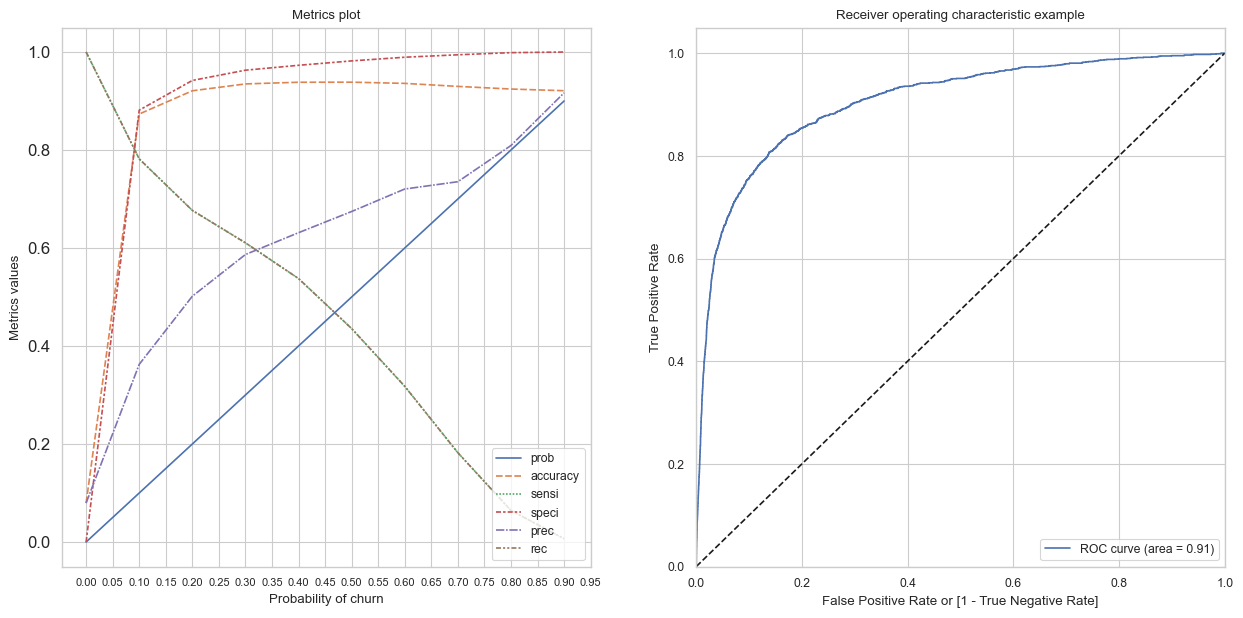

In [103]:
# Step 3: Predict using the training data
from sklearn import metrics

y_train_pred_final = pred_train_using_logistic_model(logistic_model_imbalanced, X_train_sm_imbalanced, y_train)

In [104]:
# Step 4: Decide the cutoff based on the metrics plot
cutoff = 0.05 
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Churn_pred_prob'].map( lambda x: 1 if x > cutoff else 0)
# deleting the unnecessary columns of all other cutoff
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 


In [105]:
def classification_algo_metrics(y_actual, y_pred):
    print("Classification report:\n", classification_report(y_actual,y_pred))
    
    accuracy = round(accuracy_score(y_actual, y_pred), 4)
    precision = round(precision_score(y_actual, y_pred), 4)
    recall = round(recall_score(y_actual, y_pred), 4)
    f1 = round(f1_score(y_actual, y_pred), 4)
    auc_score = round(roc_auc_score(y_actual, y_pred), 4)
    
    print("Accuracy Score   : ", accuracy)
    print("Precision Score  : ", precision)
    print("Recall Score     : ", recall) 
    print("F1 Score         : ", f1)  
    print("Area under curve : ", auc_score, "\n")
     
    # Confusion Matrix
    cm = confusion_matrix(y_actual, y_pred) # confusion matrix
    sns.heatmap(cm, annot=True, fmt='.0f', cmap="PuBu",
    xticklabels = ["Not Churned", "Churned"] ,
    yticklabels = ["Not Churned", "Churned"] )
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()  
    return accuracy, precision, recall, f1, auc_score



Evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.78      0.87     19067
           1       0.25      0.86      0.39      1646

    accuracy                           0.78     20713
   macro avg       0.62      0.82      0.63     20713
weighted avg       0.93      0.78      0.83     20713

Accuracy Score   :  0.7825
Precision Score  :  0.2493
Recall Score     :  0.8639
F1 Score         :  0.3869
Area under curve :  0.8197 



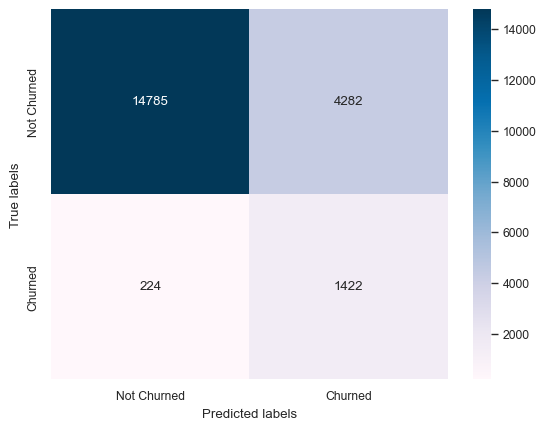

(0.7825, 0.2493, 0.8639, 0.3869, 0.8197)

In [106]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Step 5: Evaluate the metrics on the training data set
print("Evaluation on training data set: \n")
classification_algo_metrics(y_train, y_train_pred_final['final_predicted_1'])

In [107]:
# Step 6: Predict on the test dataset
# Selecting only the columns used in the final model of the Train Dataset
y_test_pred_final = pred_test_using_logistic_model(logistic_model_imbalanced, 
                                                      X_test[imbalanced_rfe_features], 
                                                      y_test, cutoff=0.05) 

# Displaying the first few rows of the predictions
y_test_pred_final.head()


churn  Churned_Prob  final_predicted
0  0      0.012509      0              
1  0      0.017375      0              
2  0      0.082619      1              
3  0      0.000922      0              
4  0      0.045779      0

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.78      0.87      8182
           1       0.25      0.86      0.39       696

    accuracy                           0.79      8878
   macro avg       0.62      0.82      0.63      8878
weighted avg       0.93      0.79      0.83      8878

Accuracy Score   :  0.7869
Precision Score  :  0.2504
Recall Score     :  0.8621
F1 Score         :  0.3881
Area under curve :  0.8213 



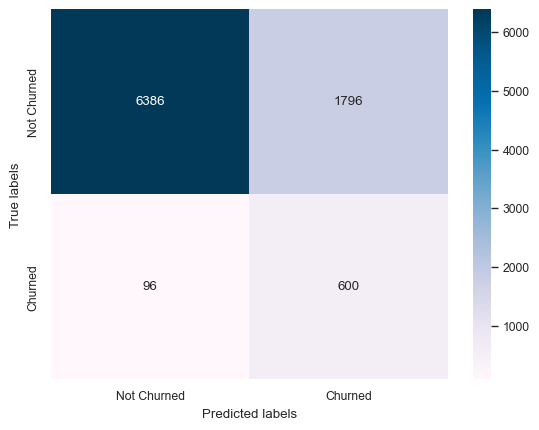

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without PCA  0.7869    0.2504      

   Recall  F1 score  Area under ROC curve  
0  0.8621  0.3881    0.8213

In [108]:
# Step 7: Evaluate the metrics on the test data set
print("Evaluation on test data set: \n")
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred_final['final_predicted'])

# Creating a temporary DataFrame to store the results
tempResults = pd.DataFrame({'Model':['Logistic Regression on imbalanced data without PCA'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision], 
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

# Concatenating the results with the previous results DataFrame
results = pd.concat([results, tempResults])

# Rearranging the columns
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results


<h4 style="color:red;">Logistic Regression without PCA and trating Imbalance Data using SMOTE:</h4>

In [109]:
# Step 1: Run RFE
smote_rfe_features = run_rfe_on_logistic(X_smote_samples, y_smote_samples, no_of_features=25)
X_train_rfe_smote = X_smote_samples[smote_rfe_features]
print("Dimension of X_train after RFE with SMOTE data:", X_train_rfe_smote.shape)


Dimension of X_train after RFE with SMOTE data: (38134, 25)


In [110]:
# Step 2: Build the logistic model using RFE selected columns with StatsModels 
logistic_model_smote, X_train_sm_smote = build_logistic_model(X_train_rfe_smote, y_smote_samples)
logistic_model_smote.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38134
Model:                            GLM   Df Residuals:                    38108
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13679.
Date:                Tue, 03 Oct 2023   Deviance:                       27358.
Time:                        14:50:17   Pearson chi2:                 4.63e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4877
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.1945      0.058     -3.373      0.001      -0.307      -0.081
night_pck_user_6                    -1.6799      0.275     -6.119      0.000      -2.218      -1.142
night_pck_user_7                    -1.1753      0.320     -3.667      0.000      -1.803      -0.547
night_pck_user_8                    -0.7500      0.347     -2.165      0.030      -1.429      -0.071
fb_user_6                           -1.0645      0.065    -16.319      0.000      -1.192      -0.937
fb_user_7                           -0.8286      0.065    -12.792      0.000      -0.956      -0.702
fb_user_8                           -0.8039      0.090     -8.949      0.000      -0.980      -0.628
arpu_action_phase                    0.1784      0.050      3.539      0.000       0.080       0.277
offnet_mou_action_phase             -0.2937      0.028    -10.566      0.000      -0.348      -0.239
roam_og_mou_action_phase             0.4358      0.015     29.270      0.000       0.407       0.465
loc_ic_mou_good_phase                0.3632      0.030     12.216      0.000       0.305       0.422
loc_ic_mou_action_phase             -1.3614      0.037    -36.683      0.000      -1.434      -1.289
spl_ic_mou_action_phase             -0.4246      0.026    -16.053      0.000      -0.476      -0.373
total_rech_amt_good_phase            0.5862      0.029     20.549      0.000       0.530       0.642
total_rech_amt_action_phase         -0.9404      0.056    -16.720      0.000      -1.051      -0.830
max_rech_amt_good_phase             -0.4920      0.028    -17.670      0.000      -0.547      -0.437
max_rech_amt_action_phase            0.3723      0.031     12.077      0.000       0.312       0.433
total_rech_data_action_phase         1.0502      0.087     12.076      0.000       0.880       1.221
max_rech_data_good_phase             0.9637      0.054     17.860      0.000       0.858       1.069
count_rech_3g_good_phase             0.6170      0.031     19.679      0.000       0.556       0.678
vol_2g_mb_good_phase                 0.5483      0.036     15.339      0.000       0.478       0.618
vol_2g_mb_action_phase              -0.3982      0.039    -10.300      0.000      -0.474      -0.322
sachet_2g_good_phase                 0.7244      0.049     14.710      0.000       0.628       0.821
sachet_2g_action_phase              -0.4645      0.052     -8.912      0.000      -0.567      -0.362
total_data_rech_amt_good_phase      -0.8903      0.078    -11.421      0.000      -1.043      -0.737
total_data_rech_amt_action_phase    -1.0888      0.088    -12.375      0.000      -1.261      -0.916
====================================================================================================
"""

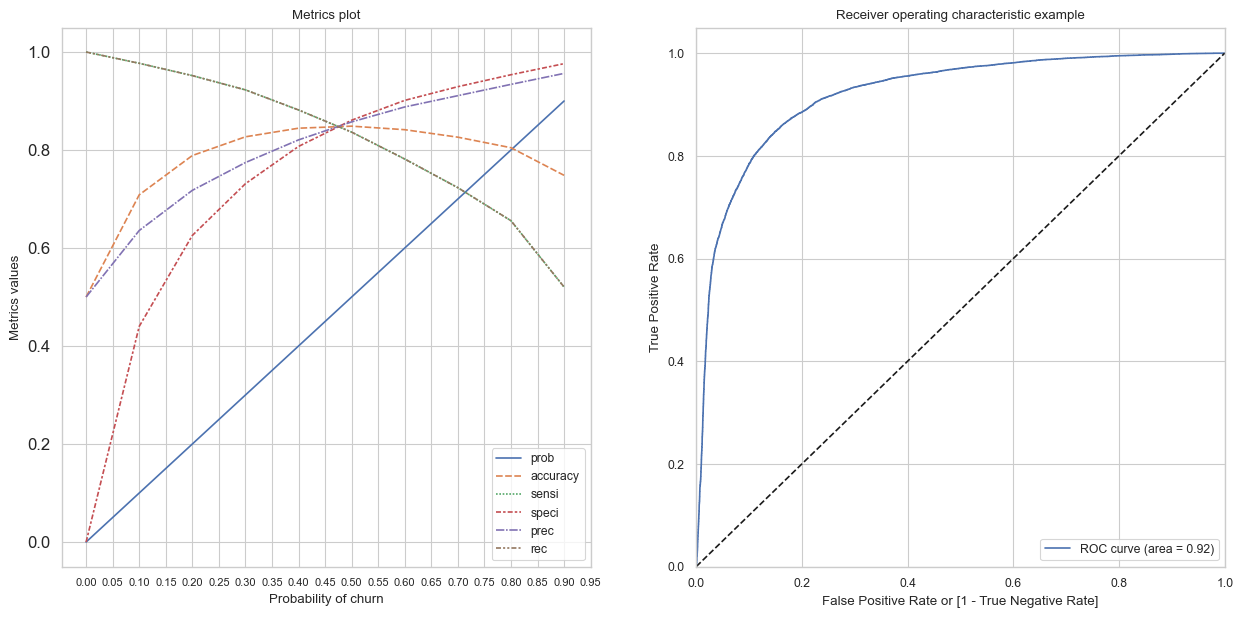

In [111]:
# Step 3: Predict using the training data
y_train_pred_final = pred_train_using_logistic_model(logistic_model_smote, X_train_sm_smote, y_smote_samples)

In [112]:
# Step 4: Decide the cutoff based on the metrics plot
cutoff = 0.46
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Churn_pred_prob'].map( lambda x: 1 if x > cutoff else 0)

# Removing unnecessary columns for other cutoffs
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 


Model evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85     19067
           1       0.84      0.86      0.85     19067

    accuracy                           0.85     38134
   macro avg       0.85      0.85      0.85     38134
weighted avg       0.85      0.85      0.85     38134

Accuracy Score   :  0.8485
Precision Score  :  0.8439
Recall Score     :  0.8552
F1 Score         :  0.8495
Area under curve :  0.8485 



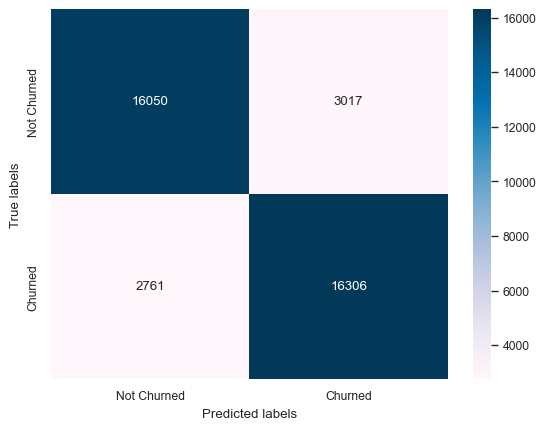

(0.8485, 0.8439, 0.8552, 0.8495, 0.8485)

In [113]:
# Step 5: Evaluate the metrics on the training data set
print("Model evaluation on training data set: \n")
classification_algo_metrics(y_smote_samples, y_train_pred_final['final_predicted_1'])

In [114]:
# Step 6: Predict on the test dataset
y_test_pred_final = pred_test_using_logistic_model(logistic_model_smote, X_test[smote_rfe_features], y_test, cutoff=0.46) 

# Selecting only the columns used in final model of Train Dataset
y_test_pred_final.head()

churn  Churned_Prob  final_predicted
0  0      0.162346      0              
1  0      0.241931      0              
2  0      0.653492      1              
3  0      0.021398      0              
4  0      0.166885      0

Model Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      8182
           1       0.31      0.82      0.45       696

    accuracy                           0.84      8878
   macro avg       0.65      0.83      0.68      8878
weighted avg       0.93      0.84      0.87      8878

Accuracy Score   :  0.8429
Precision Score  :  0.3108
Recall Score     :  0.8247
F1 Score         :  0.4514
Area under curve :  0.8346 



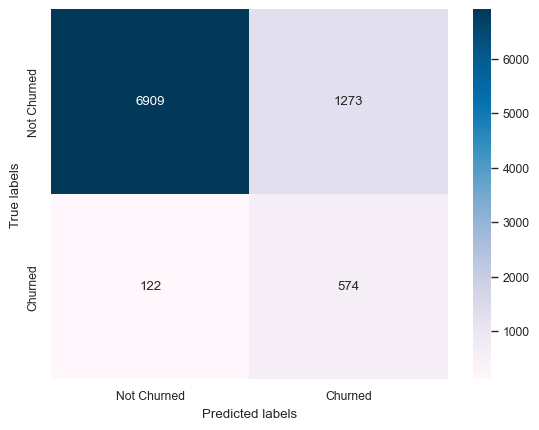

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without PCA  0.7869    0.2504      
0  Logistic Regression without PCA and with SMOTE      0.8429    0.3108      

   Recall  F1 score  Area under ROC curve  
0  0.8621  0.3881    0.8213                
0  0.8247  0.4514    0.8346

In [115]:
# Step 7: Evaluate the metrics on the test data set
print("Model Evaluation on test data set: \n")
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred_final['final_predicted'])

tempResults = pd.DataFrame({'Model':['Logistic Regression without PCA and with SMOTE'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<h4 style="color:red;">Performance of PCA</h4>

In [116]:
def perform_PCA(X):
    
    # Initialize PCA with randomized solver
    pca = PCA(svd_solver='randomized', random_state=100)

    # Perform PCA on the input data
    pca.fit(X)
    
    # Generate a scree plot showing cumulative explained variance against the number of components
    fig = plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()


In [117]:
def perform_incremental_PCA(X_train, y_train, components):
    
    # Use incremental PCA for efficiency - saves a lot of time on larger datasets
    final_PCA= IncrementalPCA(n_components = components)
    
    # Transform the training and test data
    X_train_pca = final_PCA.fit_transform(X_train)
    X_test_pca = final_PCA.transform(X_test)
    
    #Convert data frames for easier handling

    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)

    print("Dimension of X train PCA : ", X_train_pca.shape)
    print("Dimension of Y train PCA : ", y_train.shape)
    print("Dimension of X test PCA : ", X_test_pca.shape)
    print("Dimension of Y test PCA : ", y_test.shape)
    
    #create a correlation matrix for the principal components
    corr_mat = np.corrcoef(X_train_pca.transpose())

    #plotting the correlation matrix
    plt.figure(figsize = (10,8))
    sns.heatmap(corr_mat, annot = False,cmap="RdYlGn",linewidth =1)
    plt.show()
    
    # Check for correlations between principal components
    corr_mat_nodiag = corr_mat - np.diagflat(corr_mat.diagonal())
    print("max corr:",corr_mat_nodiag.max(), ", min corr: ", corr_mat_nodiag.min(),)
    
    return X_train_pca, X_test_pca

<h4 style="color:red;">Logistic Regression with PCA and handling imbalance using random over sampling:</h4>

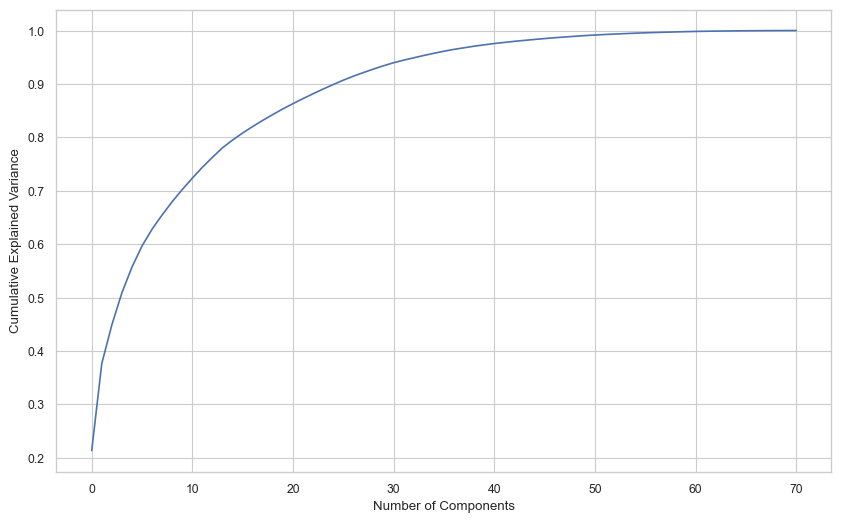

In [118]:
# Step 1.1: Performance of PCA on the whole training dataset to identify number of features
perform_PCA(X_r_over_sampled)

<h4 style="background-color:powderblue;">Comments:</h4>
<ul>
<li style="color:green;">It seems 25 or lessthan 25 components are enough to handle 90% of the variance in the dataset. </li>
<li style="color:green;">We are going to select 25 components here.</li>
</ul>

Dimension of X train PCA :  (38134, 25)
Dimension of Y train PCA :  (38134, 1)
Dimension of X test PCA :  (8878, 25)
Dimension of Y test PCA :  (8878,)


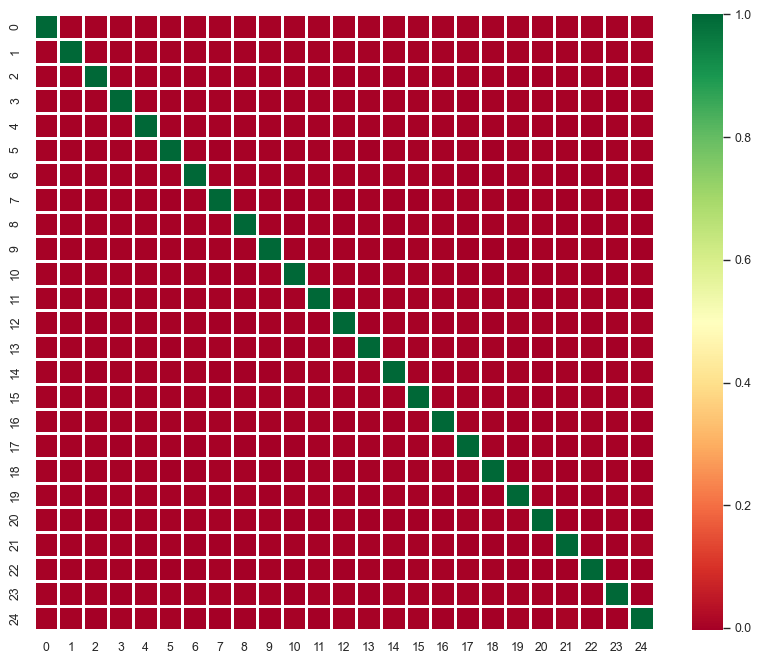

max corr: 0.004480855192909267 , min corr:  -0.004189747466960806


In [119]:
#creating 25 principle components
X_train_pca_ro, X_test_pca_ro = perform_incremental_PCA(X_r_over_sampled, y_r_over_sampled, 25)

<h4 style="background-color:powderblue;">Comments:</h4>
<ul>
<li style="color:green;">It seems we are good to proceed as we are having no correlation between any of the two components.</li>
</ul>

In [120]:
# Step 2: Build the logistic model using PCA Components with StatsModels 
logistic_model_pca_r_over_balanced, X_train_sm_pca_r_over_balanced = build_logistic_model(X_train_pca_ro, y_r_over_sampled.values.ravel())
logistic_model_pca_r_over_balanced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38134
Model:                            GLM   Df Residuals:                    38108
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14971.
Date:                Tue, 03 Oct 2023   Deviance:                       29943.
Time:                        14:50:24   Pearson chi2:                 4.63e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4518
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0441      0.016      2.840      0.005       0.014       0.075
0             -0.3362      0.004    -78.341      0.000      -0.345      -0.328
1             -0.4622      0.005    -84.083      0.000      -0.473      -0.451
2              0.1707      0.007     26.143      0.000       0.158       0.183
3              0.1031      0.007     14.060      0.000       0.089       0.118
4              0.4777      0.009     50.424      0.000       0.459       0.496
5             -0.0237      0.009     -2.730      0.006      -0.041      -0.007
6              0.2202      0.010     21.949      0.000       0.200       0.240
7             -0.0558      0.011     -5.039      0.000      -0.078      -0.034
8             -0.1331      0.012    -11.353      0.000      -0.156      -0.110
9             -0.1569      0.012    -13.328      0.000      -0.180      -0.134
10            -0.0321      0.012     -2.610      0.009      -0.056      -0.008
11            -0.3636      0.013    -27.755      0.000      -0.389      -0.338
12            -0.0237      0.013     -1.779      0.075      -0.050       0.002
13            -0.1003      0.014     -7.234      0.000      -0.127      -0.073
14             0.0007      0.015      0.048      0.962      -0.029       0.030
15             0.0008      0.015      0.053      0.958      -0.029       0.030
16            -0.0669      0.016     -4.096      0.000      -0.099      -0.035
17             0.0301      0.017      1.766      0.077      -0.003       0.063
18             0.1186      0.018      6.755      0.000       0.084       0.153
19             0.0380      0.018      2.063      0.039       0.002       0.074
20            -0.0749      0.018     -4.066      0.000      -0.111      -0.039
21            -0.1139      0.019     -5.947      0.000      -0.151      -0.076
22            -0.0927      0.019     -4.869      0.000      -0.130      -0.055
23            -0.3198      0.023    -13.747      0.000      -0.365      -0.274
24             0.0291      0.021      1.371      0.170      -0.012       0.071
==============================================================================
"""

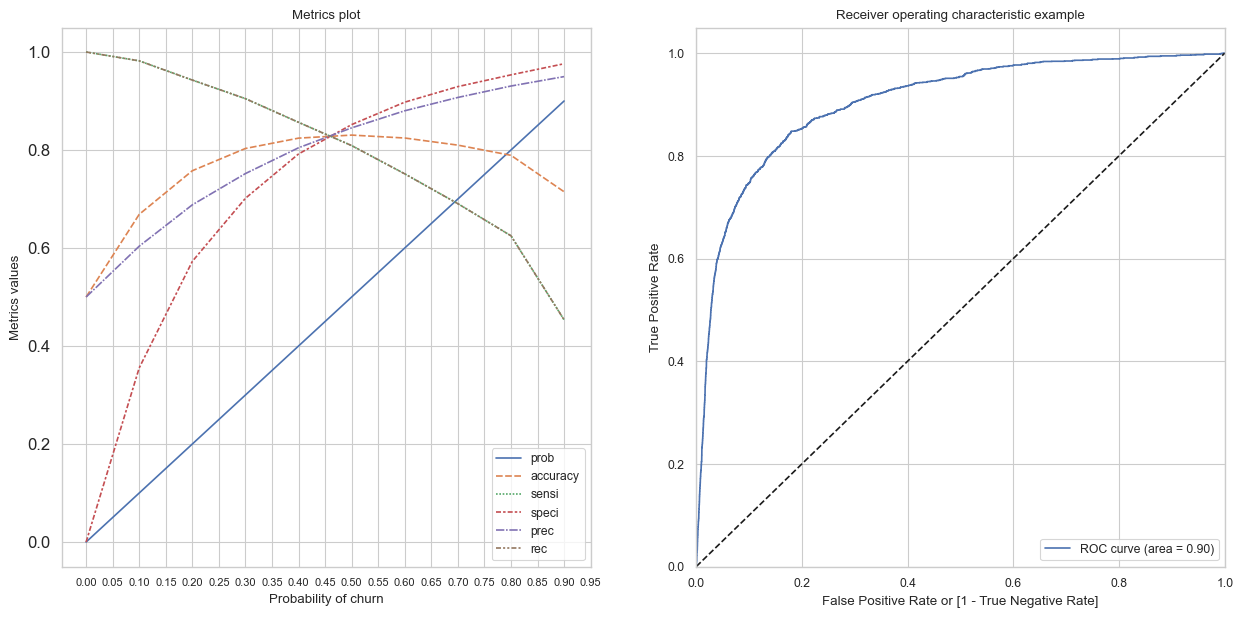

In [121]:
#Predict using the training data
y_train_pred_final = pred_train_using_logistic_model(logistic_model_pca_r_over_balanced, 
                                                        X_train_sm_pca_r_over_balanced, y_r_over_sampled)

In [122]:
# Step 4: Decide the cutoff based on the metrics plot
cutoff = 0.45 

# Apply the cutoff to get final predictions
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Churn_pred_prob'].map(lambda x: 1 if x > cutoff else 0)

# Drop unnecessary columns for other cutoffs
y_train_pred_final.drop([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], axis=1, inplace=True)


Model evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     19067
           1       0.83      0.84      0.83     19067

    accuracy                           0.83     38134
   macro avg       0.83      0.83      0.83     38134
weighted avg       0.83      0.83      0.83     38134

Accuracy Score   :  0.833
Precision Score  :  0.8274
Recall Score     :  0.8416
F1 Score         :  0.8345
Area under curve :  0.833 



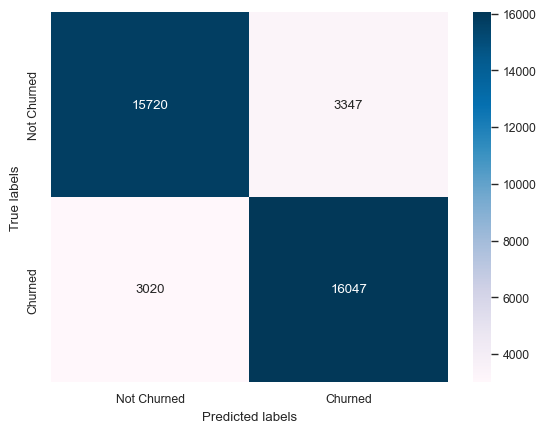

(0.833, 0.8274, 0.8416, 0.8345, 0.833)

In [123]:
# Step 5: Evaluate the metrics on the training data set
print("Model evaluation on training data set: \n")
classification_algo_metrics(y_r_over_sampled, y_train_pred_final['final_predicted_1'])

In [124]:
#Predict on the test dataset
# Selecting only the columns used in final model of Train Dataset
y_test_pred_final = pred_test_using_logistic_model(logistic_model_pca_r_over_balanced, 
                                                   X_test_pca_ro, 
                                                   y_test, 
                                                   cutoff=0.45)

# Display the first few rows of the predicted values
y_test_pred_final.head()

churn  Churned_Prob  final_predicted
0  0      0.091873      0              
1  0      0.096463      0              
2  0      0.274017      0              
3  0      0.024216      0              
4  0      0.277401      0

Evaluation on test data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8182
           1       0.30      0.84      0.44       696

    accuracy                           0.83      8878
   macro avg       0.64      0.83      0.67      8878
weighted avg       0.93      0.83      0.86      8878

Accuracy Score   :  0.8316
Precision Score  :  0.2967
Recall Score     :  0.8376
F1 Score         :  0.4382
Area under curve :  0.8344 



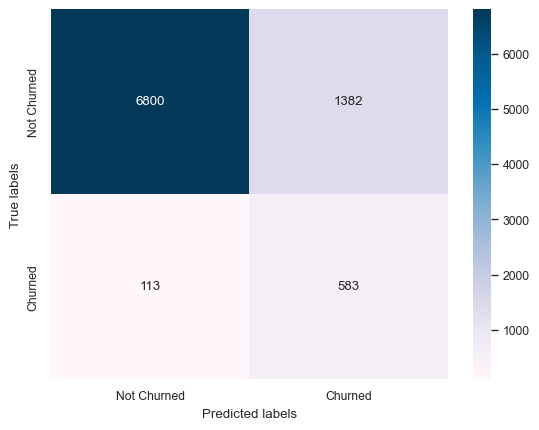

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without PCA   0.7869    0.2504      
0  Logistic Regression without PCA and with SMOTE       0.8429    0.3108      
0  Logistic Regression with PCA & Random over sampling  0.8316    0.2967      

   Recall  F1 score  Area under ROC curve  
0  0.8621  0.3881    0.8213                
0  0.8247  0.4514    0.8346                
0  0.8376  0.4382    0.8344

In [125]:
#Evaluate the metrics on the test data set

# Print a descriptive message
print("Evaluation on test data set: \n")

# Calculate metrics
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_pred_final['final_predicted'])

# Create a temporary DataFrame to hold the results
tempResults = pd.DataFrame({'Model':['Logistic Regression with PCA & Random over sampling'], 
                            'Accuracy': [accuracy],
                            'Precision': [precision], 
                            'Recall': [recall], 
                            'F1 score': [f1], 
                            'Area under ROC curve': [model_roc_auc] })

# Concatenate the results with the existing DataFrame
results = pd.concat([results, tempResults])

# Reorder columns for consistency
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results


<h3 style="color:red;">Support Vector Machine (SVM)</h3>

In [ ]:
# Measure execution time
%%time

# Define the parameter grid for hyperparameter tuning
params = {
    'C': [0.1, 0.3, 0.5],
    'gamma': [0.3, 0.5, 0.7]
}

# Initialize GridSearchCV
g_search_svm = GridSearchCV(
    estimator=SVC(),
    scoring='recall',
    cv=3,
    param_grid=params
)

# Fit GridSearchCV to the data
g_search_svm.fit(X_train_resampled, y_train_resampled)

# Print results
print("SVM Best Recall Score:", g_search_svm.best_score_)
print("SVM Best Hyperparameters:", g_search_svm.best_params_)


In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1], 'gamma': [0.5], 'kernel': ['linear']}

# Create an instance of SVM model
svm = SVC(probability=True, random_state=100)

# Initialize GridSearchCV with SVM model and parameter grid
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

# Create the final SVM model with best parameters
final_model_svm = SVC(C=best_C, gamma=best_gamma, kernel='linear', probability=True, random_state=100)

# Train the final model on the resampled data
final_model_svm.fit(X_train_resampled, y_train_resampled)


Model evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.81      0.89     19067
           1       0.29      0.87      0.43      1646

    accuracy                           0.82     20713
   macro avg       0.64      0.84      0.66     20713
weighted avg       0.93      0.82      0.86     20713

Accuracy Score   :  0.8186
Precision Score  :  0.2873
Recall Score     :  0.8663
F1 Score         :  0.4315
Area under curve :  0.8404 



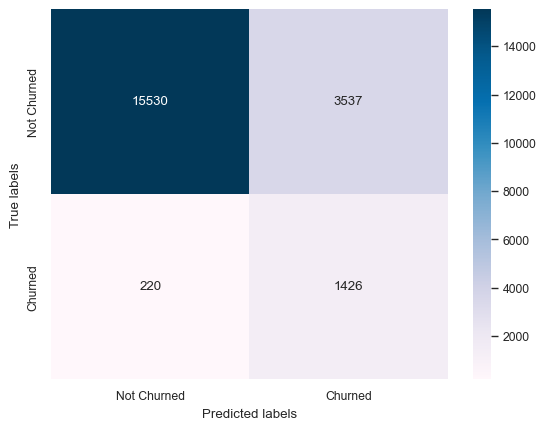

(0.8186, 0.2873, 0.8663, 0.4315, 0.8404)

In [128]:
y_train_svm = final_model_svm.predict(X_train)
print("Model evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_svm)

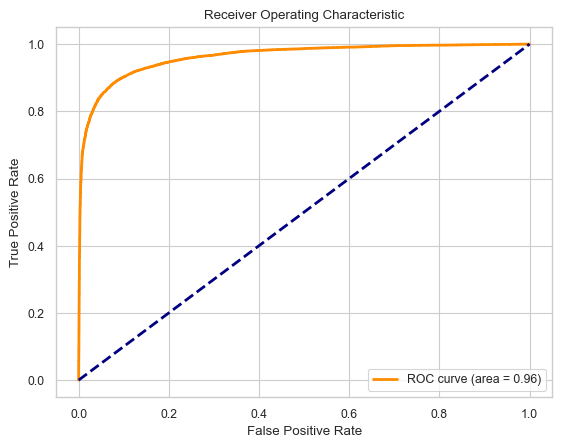

In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming final_model_svm.predict_proba returns probabilities
y_scores = final_model_svm.predict_proba(X_train_resampled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train_resampled, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Evaluation on test data set:

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90      8182
           1       0.29      0.86      0.44       696

    accuracy                           0.82      8878
   macro avg       0.64      0.84      0.67      8878
weighted avg       0.93      0.82      0.86      8878

Accuracy Score   :  0.825
Precision Score  :  0.2919
Recall Score     :  0.8649
F1 Score         :  0.4365
Area under curve :  0.8433 



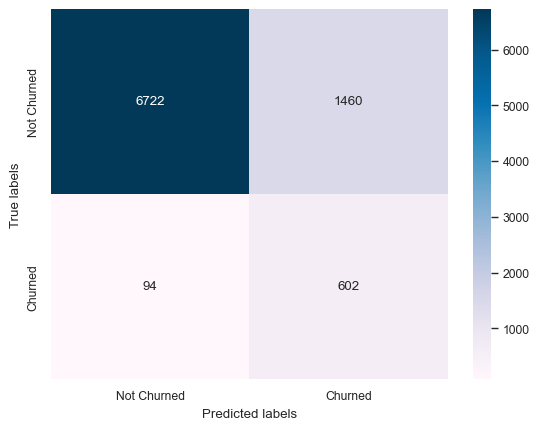

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without PCA   0.7869    0.2504      
0  Logistic Regression without PCA and with SMOTE       0.8429    0.3108      
0  Logistic Regression with PCA & Random over sampling  0.8316    0.2967      
0  SVM with SMOTEENN                                    0.8250    0.2919      

   Recall  F1 score  Area under ROC curve  
0  0.8621  0.3881    0.8213                
0  0.8247  0.4514    0.8346                
0  0.8376  0.4382    0.8344                
0  0.8649  0.4365    0.8433

In [133]:
# Evaluate the metrics on the test data set
y_test_svm = final_model_svm.predict(X_test)

print("Evaluation on test data set:\n")

# Calculate evaluation metrics
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_svm)

# Create a DataFrame to store the results
tempResults = pd.DataFrame({
    'Model': ['SVM with SMOTEENN'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 score': [f1],
    'Area under ROC curve': [model_roc_auc]
})

# Concatenate the results with existing DataFrame
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<h3 style="color:red;">Random Forest:</h3>

<h4 style="background-color:powderblue;">Comments</h4>
<ul>
<li style="color:green;">Random forest, bagging is proven to be very effective model in different prediction of models.
But they are not much effective where classification problems with skewed distributions.</li>
<li style="color:green;">We apply here in Random Forest with class_weight based on imbalance data, and resample data with
SMOTEENN.</li>
</ul>

In [135]:
# Running RandomForestClassifier without hyperparameter tuning with the actual train and test data.

rf_model = RandomForestClassifier(
    random_state=100, 
    n_estimators=100, 
    n_jobs=-1, 
    class_weight={0: 1, 1: 9}
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 1, 1: 9}, n_jobs=-1, random_state=100)

Model evaluation on training data set: 

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19067
           1       1.00      1.00      1.00      1646

    accuracy                           1.00     20713
   macro avg       1.00      1.00      1.00     20713
weighted avg       1.00      1.00      1.00     20713

Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
F1 Score         :  1.0
Area under curve :  1.0 



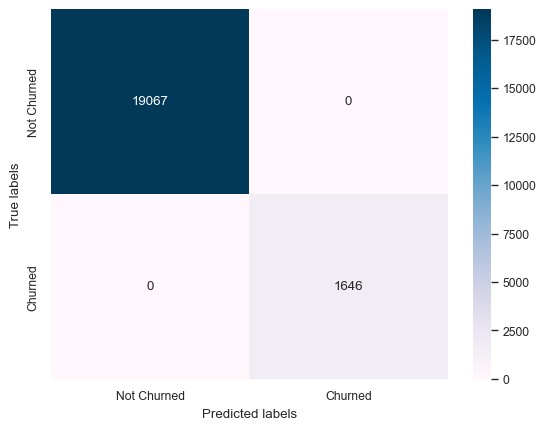

(1.0, 1.0, 1.0, 1.0, 1.0)

In [136]:
# Checking the performance of the train dataset
y_train_rf = rf_model.predict(X_train)
print("Model evaluation on training data set: \n")
classification_algo_metrics(y_train,y_train_rf)

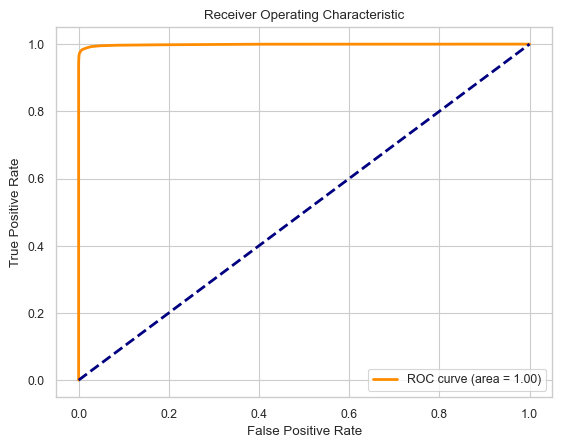

In [138]:
# Assuming rf_model.predict_proba returns probabilities
y_scores = rf_model.predict_proba(X_train_resampled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train_resampled, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Model evaluation on test data set:

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      8182
           1       0.79      0.43      0.56       696

    accuracy                           0.95      8878
   macro avg       0.87      0.71      0.76      8878
weighted avg       0.94      0.95      0.94      8878

Accuracy Score   :  0.9464
Precision Score  :  0.7895
Recall Score     :  0.431
F1 Score         :  0.5576
Area under curve :  0.7106 



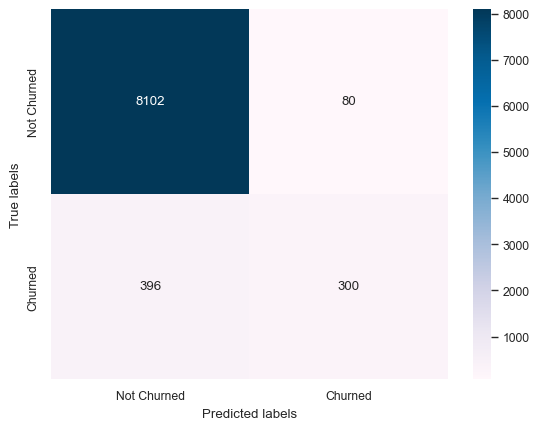

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without PCA   0.7869    0.2504      
0  Logistic Regression without PCA and with SMOTE       0.8429    0.3108      
0  Logistic Regression with PCA & Random over sampling  0.8316    0.2967      
0  SVM with SMOTEENN                                    0.8250    0.2919      
0  Random Forest with class_weight                      0.9464    0.7895      

   Recall  F1 score  Area under ROC curve  
0  0.8621  0.3881    0.8213                
0  0.8247  0.4514    0.8346                
0  0.8376  0.4382    0.8344                
0  0.8649  0.4365    0.8433                
0  0.4310  0.5576    0.7106

In [139]:
# Checking the performance on the test dataset
y_test_rf = rf_model.predict(X_test)

print("Model evaluation on test data set:\n")

# Calculate evaluation metrics
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_rf)

# Create a DataFrame to store the results
tempResults = pd.DataFrame({
    'Model': ['Random Forest with class_weight'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 score': [f1],
    'Area under ROC curve': [model_roc_auc]
})

# Concatenate the results with existing DataFrame
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

In [140]:
# Running RandomForestClassifier without hyperparameter tuning with the resampled data
rf_model = RandomForestClassifier(
    random_state=100, 
    n_estimators=100, 
    n_jobs=-1
)
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(n_jobs=-1, random_state=100)

Model evaluation on training data set:

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     19067
           1       0.55      1.00      0.71      1646

    accuracy                           0.94     20713
   macro avg       0.78      0.96      0.84     20713
weighted avg       0.96      0.94      0.94     20713

Accuracy Score   :  0.9361
Precision Score  :  0.5545
Recall Score     :  0.9982
F1 Score         :  0.713
Area under curve :  0.9645 



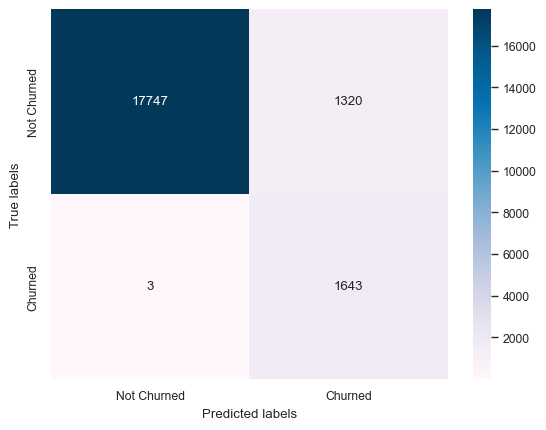

(0.9361, 0.5545, 0.9982, 0.713, 0.9645)

In [142]:
# Checking the performance on the training dataset
y_train_rf = rf_model.predict(X_train)

print("Model evaluation on training data set:\n")

# Calculate evaluation metrics
classification_algo_metrics(y_train, y_train_rf)


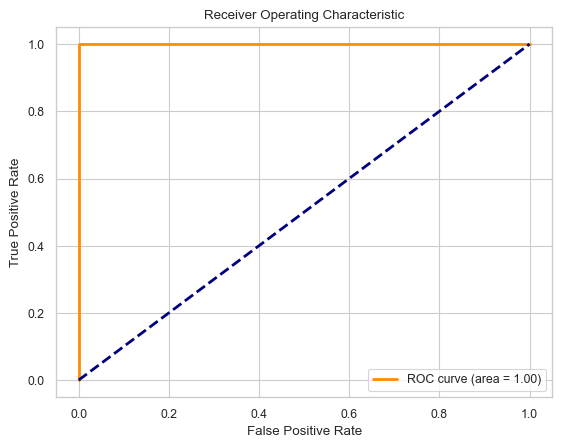

In [143]:
# Assuming model_rf.predict_proba returns probabilities
y_scores = rf_model.predict_proba(X_train_resampled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train_resampled, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Evaluation on test data set:

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      8182
           1       0.46      0.75      0.57       696

    accuracy                           0.91      8878
   macro avg       0.72      0.84      0.76      8878
weighted avg       0.94      0.91      0.92      8878

Accuracy Score   :  0.9102
Precision Score  :  0.4559
Recall Score     :  0.75
F1 Score         :  0.5671
Area under curve :  0.8369 



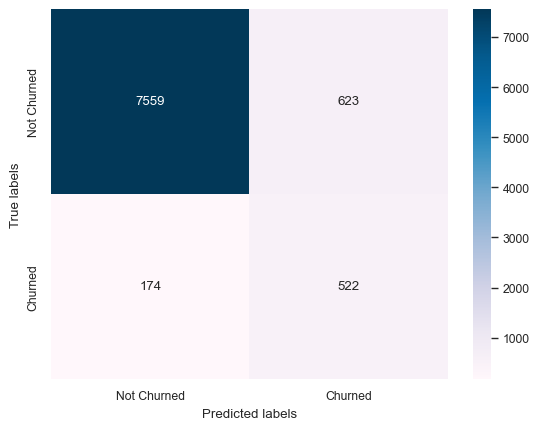

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without PCA   0.7869    0.2504      
0  Logistic Regression without PCA and with SMOTE       0.8429    0.3108      
0  Logistic Regression with PCA & Random over sampling  0.8316    0.2967      
0  SVM with SMOTEENN                                    0.8250    0.2919      
0  Random Forest with class_weight                      0.9464    0.7895      
0  Random Forest with SMOTEENN                          0.9102    0.4559      

   Recall  F1 score  Area under ROC curve  
0  0.8621  0.3881    0.8213                
0  0.8247  0.4514    0.8346                
0  0.8376  0.4382    0.8344                
0  0.8649  0.4365    0.8433                
0  0.4310  0.5576    0.7106                
0  0.7500  0.5671    0.8369

In [144]:
# Checking the performance on the test dataset
y_test_rf = rf_model.predict(X_test)

print("Evaluation on test data set:\n")

# Calculate evaluation metrics
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_rf)

# Create a DataFrame to store the results
tempResults = pd.DataFrame({
    'Model': ['Random Forest with SMOTEENN'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 score': [f1],
    'Area under ROC curve': [model_roc_auc]
})

# Concatenate the results with existing DataFrame
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<h4 style="background-color:powderblue;">Comments</h4>
<ul>
<li style="color:green;">Model performance has been improved with resampling. The test data set recall is 0.75. </li>
<li style="color:green;">To make it more better we will do hyperparameter tuning once again and build the model with gridsearch.</li>
</ul>

In [149]:
# Building the model using hyperparameters from GridSearchCV
rf_model = RandomForestClassifier(
    random_state=100, 
    n_jobs=-1,
    n_estimators=500,
    max_depth=30,
    min_samples_leaf=100,
    min_samples_split=200,
    criterion='gini'
)

# Training the model
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=500, n_jobs=-1,
                       random_state=100)

Evaluation on training data set:

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92     19067
           1       0.34      0.86      0.49      1646

    accuracy                           0.86     20713
   macro avg       0.67      0.86      0.70     20713
weighted avg       0.93      0.86      0.88     20713

Accuracy Score   :  0.859
Precision Score  :  0.3445
Recall Score     :  0.8578
F1 Score         :  0.4916
Area under curve :  0.8585 



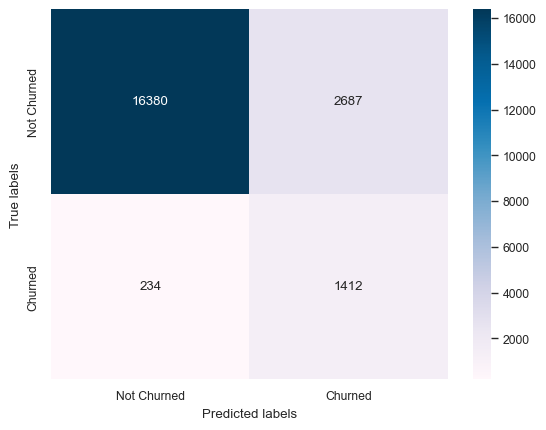

In [150]:
# Checking the performance on the training dataset
y_train_rf = rf_model.predict(X_train)

print("Evaluation on training data set:\n")

# Calculate evaluation metrics
classification_metrics = classification_algo_metrics(y_train, y_train_rf)


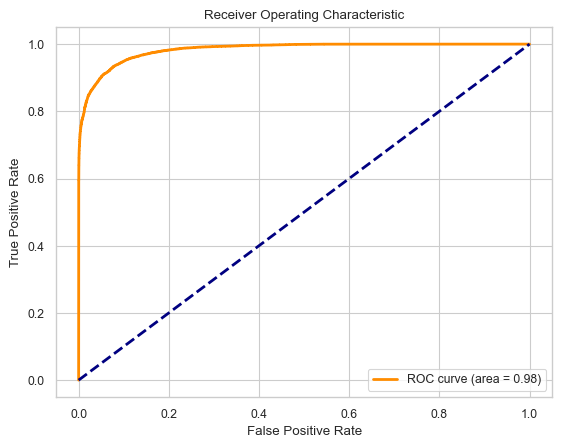

In [151]:
# Assuming model_rf.predict_proba returns probabilities
y_scores = rf_model.predict_proba(X_train_resampled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train_resampled, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Evaluation on test data set:

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      8182
           1       0.34      0.83      0.48       696

    accuracy                           0.86      8878
   macro avg       0.66      0.85      0.70      8878
weighted avg       0.93      0.86      0.89      8878

Accuracy Score   :  0.8612
Precision Score  :  0.3412
Recall Score     :  0.8276
F1 Score         :  0.4832
Area under curve :  0.8458 



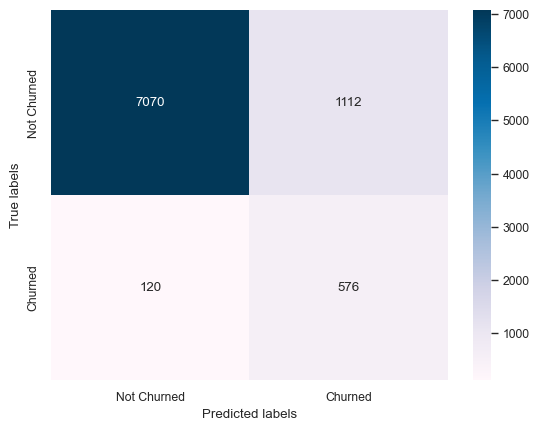

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without PCA   0.7869    0.2504      
0  Logistic Regression without PCA and with SMOTE       0.8429    0.3108      
0  Logistic Regression with PCA & Random over sampling  0.8316    0.2967      
0  SVM with SMOTEENN                                    0.8250    0.2919      
0  Random Forest with class_weight                      0.9464    0.7895      
0  Random Forest with SMOTEENN                          0.9102    0.4559      
0  Random Forest with SMOTEENN & Hyperparameter tuned   0.8612    0.3412      
0  Random Forest with SMOTEENN & Hyperparameter tuned   0.8612    0.3412      

   Recall  F1 score  Area under ROC curve  
0  0.8621  0.3881    0.8213                
0  0.8247  0.4514    0.8346                
0  0.8376  0.4382    0.8344                
0  0.8649  0.4365    0.8433                
0  0.4310  0.5576    0.7106                
0  0.7500  0.5671    0.8369                
0  0.8276  0.4832    0.8458                
0  0.8276  0.4832    0.8458

In [153]:
# Checking the performance on the test dataset
y_test_rf = rf_model.predict(X_test)

print("Evaluation on test data set:\n")

# Calculate evaluation metrics
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_rf)

# Create a DataFrame to store the results
tempResults = pd.DataFrame({
    'Model': ['Random Forest with SMOTEENN & Hyperparameter tuned'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 score': [f1],
    'Area under ROC curve': [model_roc_auc]
})

# Concatenate the results with existing DataFrame
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<h4 style="background-color:powderblue;">Comments:</h4>
<ul>
<li style="color:green;">We made a significant improvement with SVM and Random forest. Lets find out with boosting model. </li>
</ul>

<h3 style="color:red">XGBoost:</h3>

In [155]:
# Create and train the XGBoost Classifier
model_XGBoost = XGBClassifier(
    learning_rate=0.01, 
    n_estimators=300, 
    max_depth=4, 
    min_child_weight=10, 
    gamma=0.6,
    nthread=4, 
    subsample=0.4,
    colsample_bytree=0.6,
    reg_alpha=10,
    reg_lambda=2
)
model_XGBoost.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.6, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

Model evaluation on training data set:

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91     19067
           1       0.33      0.85      0.48      1646

    accuracy                           0.85     20713
   macro avg       0.66      0.85      0.69     20713
weighted avg       0.93      0.85      0.88     20713

Accuracy Score   :  0.8517
Precision Score  :  0.3308
Recall Score     :  0.8463
F1 Score         :  0.4757
Area under curve :  0.8492 



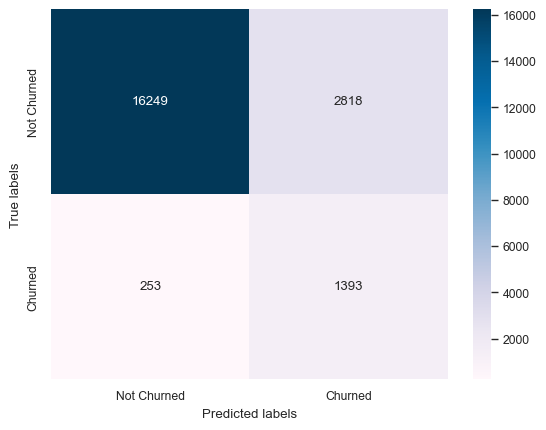

In [156]:
# Checking the performance on the training dataset
y_train_xgb = model_XGBoost.predict(X_train)

print("Model evaluation on training data set:\n")

# Calculate evaluation metrics
classification_metrics = classification_algo_metrics(y_train, y_train_xgb)


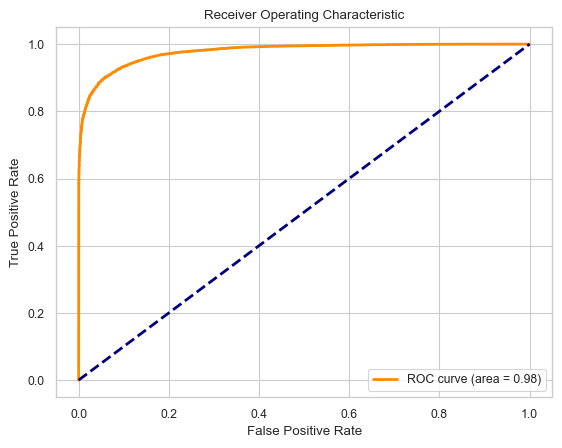

In [157]:
# Assuming model_xgb.predict_proba returns probabilities
y_scores = model_XGBoost.predict_proba(X_train_resampled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train_resampled, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Evaluation on test data set:

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      8182
           1       0.34      0.84      0.48       696

    accuracy                           0.86      8878
   macro avg       0.66      0.85      0.70      8878
weighted avg       0.93      0.86      0.88      8878

Accuracy Score   :  0.859
Precision Score  :  0.3389
Recall Score     :  0.8405
F1 Score         :  0.4831
Area under curve :  0.8505 



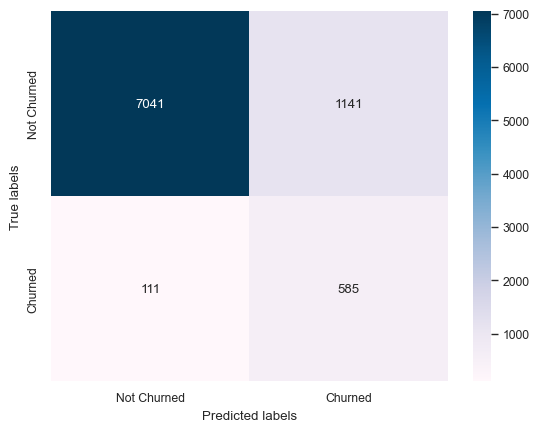

Model  Accuracy  Precision  \
0  Logistic Regression on imbalanced data without PCA   0.7869    0.2504      
0  Logistic Regression without PCA and with SMOTE       0.8429    0.3108      
0  Logistic Regression with PCA & Random over sampling  0.8316    0.2967      
0  SVM with SMOTEENN                                    0.8250    0.2919      
0  Random Forest with class_weight                      0.9464    0.7895      
0  Random Forest with SMOTEENN                          0.9102    0.4559      
0  Random Forest with SMOTEENN & Hyperparameter tuned   0.8612    0.3412      
0  Random Forest with SMOTEENN & Hyperparameter tuned   0.8612    0.3412      
0  XGBoost with SMOTEENN & Hyperparameter tuned         0.8590    0.3389      

   Recall  F1 score  Area under ROC curve  
0  0.8621  0.3881    0.8213                
0  0.8247  0.4514    0.8346                
0  0.8376  0.4382    0.8344                
0  0.8649  0.4365    0.8433                
0  0.4310  0.5576    0.7106                
0  0.7500  0.5671    0.8369                
0  0.8276  0.4832    0.8458                
0  0.8276  0.4832    0.8458                
0  0.8405  0.4831    0.8505

In [158]:
# Checking the performance on the test dataset
y_test_xgb = model_XGBoost.predict(X_test)

print("Evaluation on test data set:\n")

# Calculate evaluation metrics
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_xgb)

# Create a DataFrame to store the results
tempResults = pd.DataFrame({
    'Model': ['XGBoost with SMOTEENN & Hyperparameter tuned'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 score': [f1],
    'Area under ROC curve': [model_roc_auc]
})

# Concatenate the results with existing DataFrame
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<h3 style="color:red;">LightGBM</h3>

In [162]:
from lightgbm import LGBMClassifier

# Creating and training the LightGBM Classifier
model_lightGBM = LGBMClassifier(
    boosting_type='gbdt',
    n_estimators=300,
    learning_rate=0.0008, 
    max_depth=20, 
    min_child_samples=100,
    num_leaves=50, 
    objective='binary', 
    random_state=100,
    subsample=1,
    colsample_bytree=0.3,
    n_jobs=-1,
    silent=True
)

model_lightGBM.fit(X_train_resampled, y_train_resampled)


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 19043, number of negative: 15103
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16243
[LightGBM] [Info] Number of data points in the train set: 34146, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557693 -> initscore=0.231806
[LightGBM] [Info] Start training from score 0.231806


LGBMClassifier(colsample_bytree=0.3, learning_rate=0.0008, max_depth=20,
               min_child_samples=100, n_estimators=300, n_jobs=-1,
               num_leaves=50, objective='binary', random_state=100, silent=True,
               subsample=1)

[LightGBM] [Warning] Unknown parameter: silent
Evaluation on training data set:

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.72      0.83     19067
           1       0.23      0.95      0.36      1646

    accuracy                           0.74     20713
   macro avg       0.61      0.83      0.60     20713
weighted avg       0.93      0.74      0.80     20713

Accuracy Score   :  0.7364
Precision Score  :  0.2255
Recall Score     :  0.9514
F1 Score         :  0.3646
Area under curve :  0.8346 



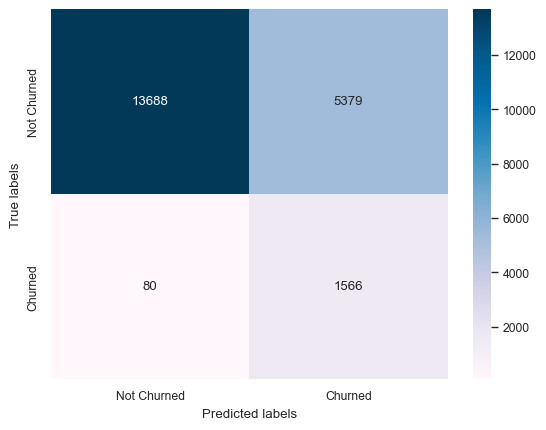

In [163]:
# Checking the performance on the training dataset
y_train_lgbm = model_lightGBM.predict(X_train)

print("Evaluation on training data set:\n")

# Calculate evaluation metrics
classification_metrics = classification_algo_metrics(y_train, y_train_lgbm)


[LightGBM] [Warning] Unknown parameter: silent


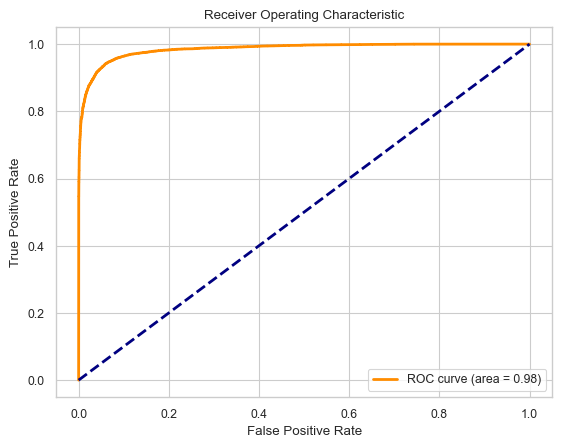

In [164]:
# Assuming model_lgbm.predict_proba returns probabilities
y_scores = model_lightGBM.predict_proba(X_train_resampled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train_resampled, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Warning] Unknown parameter: silent
Evaluation on test data set:

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.71      0.83      8182
           1       0.21      0.92      0.34       696

    accuracy                           0.72      8878
   macro avg       0.60      0.81      0.58      8878
weighted avg       0.93      0.72      0.79      8878

Accuracy Score   :  0.7236
Precision Score  :  0.2103
Recall Score     :  0.9167
F1 Score         :  0.3421
Area under curve :  0.8119 



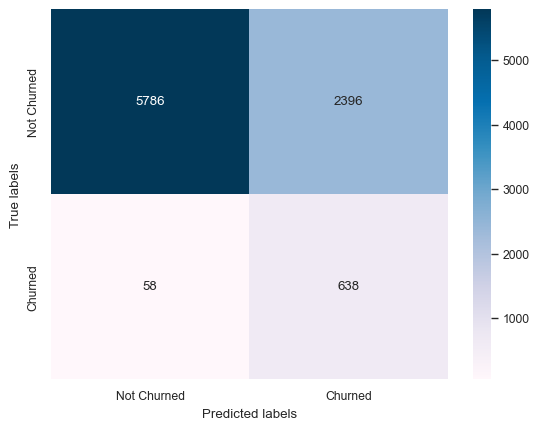

Model  Accuracy  Precision  \
0  SVM with SMOTEENN                                    0.8250    0.2919      
1  Logistic Regression on imbalanced data without PCA   0.7869    0.2504      
2  XGBoost with SMOTEENN & Hyperparameter tuned         0.8590    0.3389      
3  Logistic Regression with PCA & Random over sampling  0.8316    0.2967      
4  Random Forest with SMOTEENN & Hyperparameter tuned   0.8612    0.3412      
5  Random Forest with SMOTEENN & Hyperparameter tuned   0.8612    0.3412      
6  Logistic Regression without PCA and with SMOTE       0.8429    0.3108      
7  Random Forest with SMOTEENN                          0.9102    0.4559      
8  Random Forest with class_weight                      0.9464    0.7895      
0  Light_GBM with SMOTEENN & Hyperparameter tuned       0.7236    0.2103      

   Recall  F1 score  Area under ROC curve  
0  0.8649  0.4365    0.8433                
1  0.8621  0.3881    0.8213                
2  0.8405  0.4831    0.8505                
3  0.8376  0.4382    0.8344                
4  0.8276  0.4832    0.8458                
5  0.8276  0.4832    0.8458                
6  0.8247  0.4514    0.8346                
7  0.7500  0.5671    0.8369                
8  0.4310  0.5576    0.7106                
0  0.9167  0.3421    0.8119

In [165]:
# Checking the performance on the test dataset
y_test_lgbm = model_lightGBM.predict(X_test)

print("Evaluation on test data set:\n")

# Calculate evaluation metrics
accuracy, precision, recall, f1, model_roc_auc = classification_algo_metrics(y_test, y_test_lgbm)

# Create a DataFrame to store the results
tempResults = pd.DataFrame({
    'Model': ['Light_GBM with SMOTEENN & Hyperparameter tuned'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 score': [f1],
    'Area under ROC curve': [model_roc_auc]
})

# Concatenate the results with the existing DataFrame
results = pd.concat([results, tempResults])
results = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Area under ROC curve']]
results

<h3 style="color:red;">Final Model Selection:</h3>

<h4 style="background-color:powderblue;">Comments:</h4>
<ul>
<li style="color:green;">As we are in the process of reducing the customers churn, we need to focus on reducing the false 
negetive, but not the false positive. </li>
<li style="color:green;">To reduce false negetive we select the model which has highest recall value.</li>
<li style="color:green;">As we are not targetting the false positive, those customers identified as churned out but not 
actually not. So we do not focus on precision and f1 score.</li>
</ul>

In [166]:
# Rearranging the DataFrame by Recall in descending order
results = results.sort_values("Recall", ascending=False).reset_index(drop=True)

# Displaying the sorted DataFrame
results

Model  Accuracy  Precision  \
0  Light_GBM with SMOTEENN & Hyperparameter tuned       0.7236    0.2103      
1  SVM with SMOTEENN                                    0.8250    0.2919      
2  Logistic Regression on imbalanced data without PCA   0.7869    0.2504      
3  XGBoost with SMOTEENN & Hyperparameter tuned         0.8590    0.3389      
4  Logistic Regression with PCA & Random over sampling  0.8316    0.2967      
5  Random Forest with SMOTEENN & Hyperparameter tuned   0.8612    0.3412      
6  Random Forest with SMOTEENN & Hyperparameter tuned   0.8612    0.3412      
7  Logistic Regression without PCA and with SMOTE       0.8429    0.3108      
8  Random Forest with SMOTEENN                          0.9102    0.4559      
9  Random Forest with class_weight                      0.9464    0.7895      

   Recall  F1 score  Area under ROC curve  
0  0.9167  0.3421    0.8119                
1  0.8649  0.4365    0.8433                
2  0.8621  0.3881    0.8213                
3  0.8405  0.4831    0.8505                
4  0.8376  0.4382    0.8344                
5  0.8276  0.4832    0.8458                
6  0.8276  0.4832    0.8458                
7  0.8247  0.4514    0.8346                
8  0.7500  0.5671    0.8369                
9  0.4310  0.5576    0.7106

<h4 style="background-color:powderblue;">Comments:</h4>

<p style="color:blue;">From the results of final machine learning models, we have the below best results of recall 
amongst the models.</p>
<ul>
<li style="color:green;"> Light_GBM with SMOTEENN and Hyperparameter tuning</li>
<li style="color:green;"> SVM with SMOTEENN</li>
<li style="color:green;">Logistic Regression on imbalanced data without PCA</li>
</ul>
<p style="color:blue;">Logistic regression with PCA has a disadvantage of interpretability of the features. This may impact
the customers churn decision.</p>
<ul>
<li style="color:green;">So we use Light_GBM with SMOTEENN as final model to find feature importance.</li>
</ul>

<h3 style="color:red;">Feature Importance</h3>

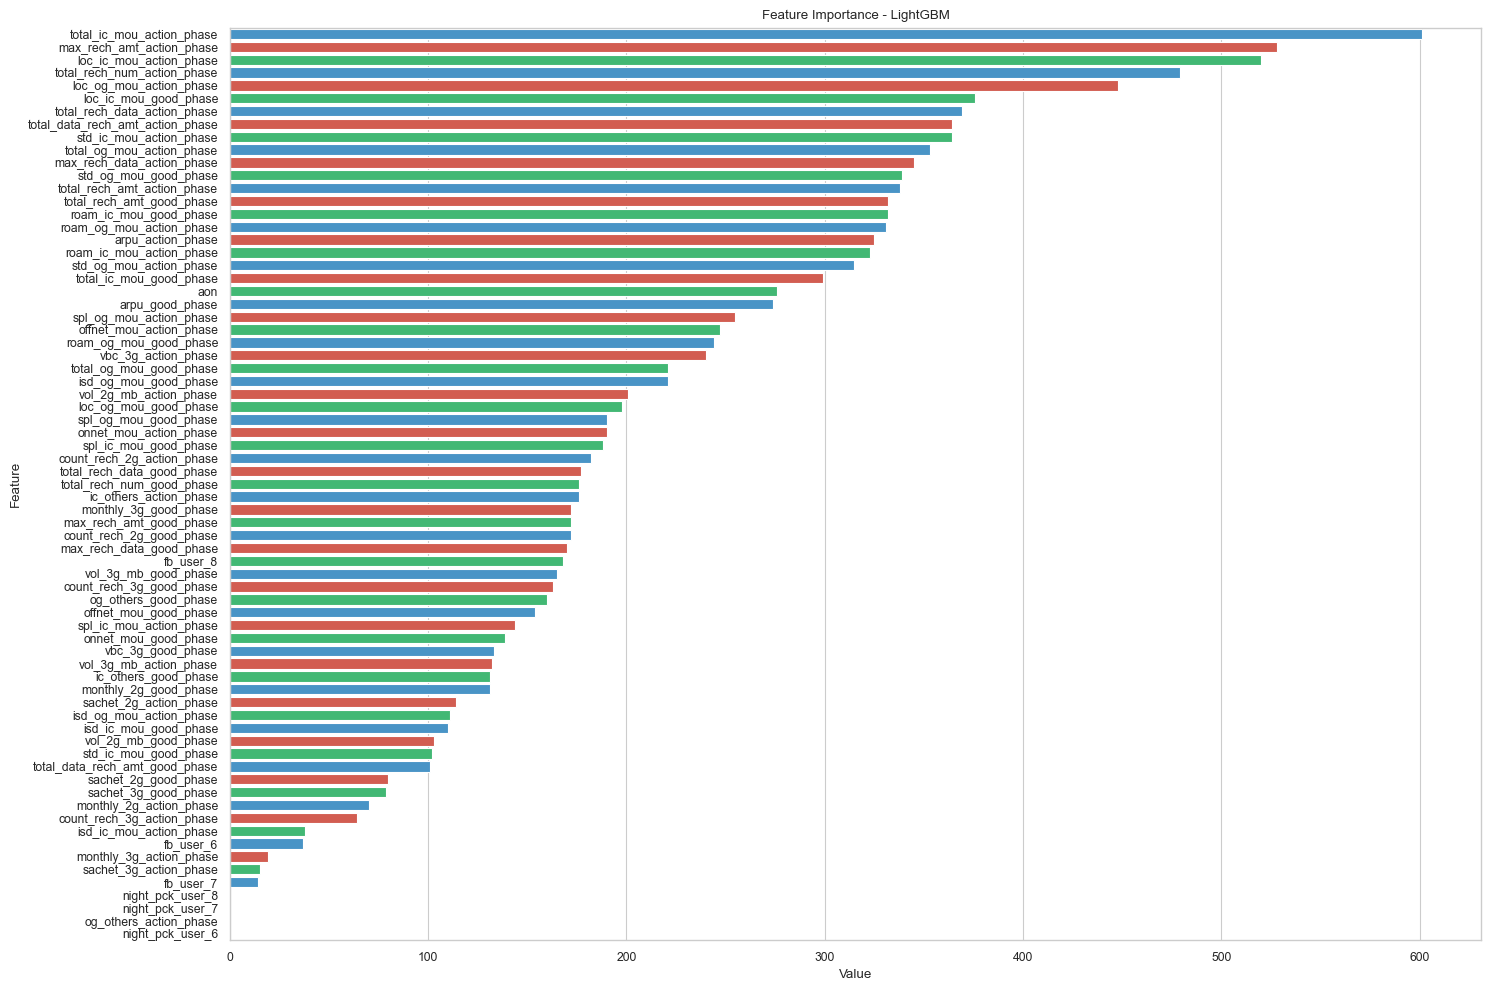

In [169]:
# Creating a DataFrame for feature importance
feature_imp = pd.DataFrame(
    sorted(zip(model_lightGBM.feature_importances_, X.columns)),
    columns=['Value', 'Feature']
)

# Creating a figure for the plot
plt.figure(figsize=(15, 10))

# Creating a barplot
custom_palette = sns.color_palette(["#3498db", "#e74c3c", "#2ecc71"])
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False),palette=custom_palette)

# Adding title and adjusting layout
plt.title('Feature Importance - LightGBM')
plt.tight_layout()

# Displaying the plot
plt.show()


In [180]:
# Sorting features by importance in descending order 
feature_imp=feature_imp.sort_values("Value",ascending = False)

# Displaying the top 25 features

feature_imp.head(20)




Value                           Feature
70  601    total_ic_mou_action_phase       
69  528    max_rech_amt_action_phase       
68  520    loc_ic_mou_action_phase         
67  479    total_rech_num_action_phase     
66  448    loc_og_mou_action_phase         
65  376    loc_ic_mou_good_phase           
64  369    total_rech_data_action_phase    
63  364    total_data_rech_amt_action_phase
62  364    std_ic_mou_action_phase         
61  353    total_og_mou_action_phase       
60  345    max_rech_data_action_phase      
59  339    std_og_mou_good_phase           
58  338    total_rech_amt_action_phase     
57  332    total_rech_amt_good_phase       
56  332    roam_ic_mou_good_phase          
55  331    roam_og_mou_action_phase        
54  325    arpu_action_phase               
53  323    roam_ic_mou_action_phase        
52  315    std_og_mou_action_phase         
51  299    total_ic_mou_good_phase

<h4 style="background-color:powderblue;">Comments:</h4>
<ul>
<li style="color:green;">From the above top features, top 10 features are mostly in Action Phase(9 of 10). </li>
</ul>

<h3 style="background-color:yellow;">Business Recommendations:</h3>

<p style="color:green;">From the above top 25 features, 14 out of 25 from action phase, and from 15 to 20 features
are from good phase. Below recommendations are proposed for retaining the high value customers. </p>
<ul>
<li style="color:green;"> <b>Incoming Calls :</b>Incoming, local, and STD incoming calls are in top 10 features. It is having
    more impact on retaining the customer. So the business management should have some plans to retain them.</li>
<li style="color:green;"><b>Total Recharge Number:</b>total_rech_num is the 4th highest coeff. It shows that high
    frequency of recharge numbers will be steady. Most of the customers may not opt for top up recharges with high value amts.
    total_rech_data is the 6th top feature. For both of them, small top up might help them. Combination of Data and Calling
    would be much more feasible.</li>
<li style="color:green;"><b>Outgoing Calls :</b> Local, STD and Total outgoing call minutes are again top 20 features. 
    Business should have a good tactics on implementing some discounts to hold the customers.
<li style="color:green;"><b>Roaming:</b> During this phase, incoming and outgoing on roaming is the critical factor to
    consider. Usually roaming packages might be high price. Business may consider to launch better data packages with calls
    for roaming to retain them.</li>
<li style="color:green;"><b>Total Amount Recharge:</b> This feature is also having high coeff. Business can launch some longer
    period packages for data and calls. This will make the customer to stay longer in the network to use their plans.</li>
    
<li style="color:green;">Telecom company may consider by giving some free palns or topups for those who are not active but not
churned out. By giving some interesting plans we might retain them to the same network.</li>
<li style="color:green;">Also telecallers can reach out to the customers if they are facing any issues in the case of decline 
    from good phase to action phase. Getting connected with the customers and sorting out the issues may hold the customers
    , and these people who are about to churn are generating the average monthly revenue Rs 240.75 also can be saved.</li>
<li style="color:green;">We can also analyze from our data that the features/facilities linked to Mobile Data is also not utilised very much by the consumers.One reason could be customer ignorance regarding the full range of services and features avaliable to them.Many customers may not be aware of all the offerings and providing information can enhance their overall experience and will increase their loyalty to the service they are using. The information regarding the offerings can be shared through text/voice messages to the customers on regular basis. Customers actively using the network facilities are less prone to churn    

</ul>